In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Schematics 

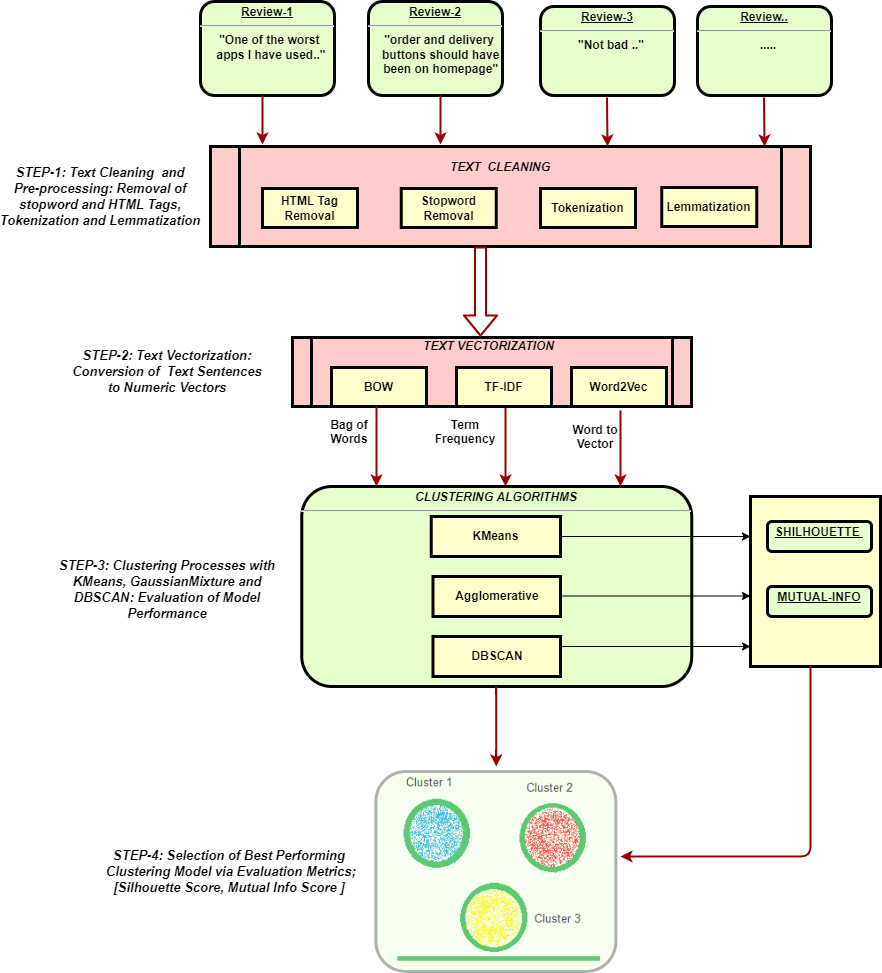

## Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy 
import re

from time import time  
from collections import defaultdict  
from wordcloud import WordCloud
import gensim

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
#from sklearn.cluster import KMeans, Birch, AffinityrPopagation, AgglomerativeClustering
#from sklearn.cluster import GaussianMixture
from sklearn.metrics import silhouette_score as si
from sklearn.decomposition import PCA
from sklearn.metrics import mutual_info_score as mi

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
! pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Data Import and Descriptive Analysis:

In [ ]:
review_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Project/mcdonalds.csv')
review_df.head(3)

reviewId             userName  \
0  gp:AOqpTOGm-u9eUxZ3YTDWQayistlTWhg68yf_UYgm4s9...       Levente Zilahy   
1  gp:AOqpTOGwO2Vom3qAagtxWm9tIXwwjS-qpH8ZSF8rlhg...  Mohammed AlShowaier   
2  gp:AOqpTOHklTF7sUjEIe2wpbYki-rjEqCHRDBj94FTxBI...        Mārcis Zariņš   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AOh14...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a-/AOh14...   

                                             content  score  thumbsUpCount  \
0  Constant problems. One time it says I have to ...      1            470   
1  One of the worst apps I have used. The interfa...      1            669   
2  Haven't seen a worst system stability in an ap...      1             12   

  reviewCreatedVersion                   at replyContent repliedAt  \
0                2.7.0  2020-07-27 12:59:31          NaN       NaN   
1               2.19.0  2021-05-05 17:20:51          NaN       NaN   
2                2.8.3  2020-09-28 14:29:55          NaN       NaN   

       sortOrder                    appId  
0  most_relevant  com.mcdonalds.mobileapp  
1  most_relevant  com.mcdonalds.mobileapp  
2  most_relevant  com.mcdonalds.mobileapp

In [ ]:
## column information:
print(review_df.shape)
review_df.dtypes

(1200, 12)


reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
sortOrder               object
appId                   object
dtype: object

In [ ]:
                                                           # dataset Information Table for each colum
Data_Dict=pd.DataFrame(review_df.dtypes)                   # datatype of each column
Data_Dict['Missing Val'] = review_df.isnull().sum()        # num of missing values, add to table
Data_Dict['% Missing val'] = round((Data_Dict['Missing Val'].astype(int)/review_df.shape[0] * 100),2)
Data_Dict['Num of Zeros'] = (review_df == 0).sum(0)
Data_Dict['% Num of Zeros'] = round((Data_Dict['Num of Zeros'].astype(int)/review_df.shape[0] * 100),2)
Data_Dict['nUnique Values']= review_df.nunique()            #num of unique entries, add to table
Data_Dict=Data_Dict.rename(columns={0:'Datatype'})
print('The Table below shows the Data Information of each column ')
print('Data Shape: ',review_df.shape)

Data_Dict

The Table below shows the Data Information of each column 
Data Shape:  (1200, 12)


Datatype  Missing Val  % Missing val  Num of Zeros  \
reviewId               object            0           0.00             0   
userName               object            0           0.00             0   
userImage              object            0           0.00             0   
content                object            0           0.00             0   
score                   int64            0           0.00             0   
thumbsUpCount           int64            0           0.00           659   
reviewCreatedVersion   object          194          16.17             0   
at                     object            0           0.00             0   
replyContent           object         1196          99.67             0   
repliedAt              object         1196          99.67             0   
sortOrder              object            0           0.00             0   
appId                  object            0           0.00             0   

                      % Num of Zeros  nUnique Values  
reviewId                        0.00            1077  
userName                        0.00            1056  
userImage                       0.00            1056  
content                         0.00            1027  
score                           0.00               5  
thumbsUpCount                  54.92             141  
reviewCreatedVersion            0.00              82  
at                              0.00            1077  
replyContent                    0.00               4  
repliedAt                       0.00               4  
sortOrder                       0.00               2  
appId                           0.00               1

Identifying Non-Infromative features; 

- ***appid*** : Single Unique Value

- ***replyContent*** : Predominantly Empty Entries

- ***repliedAt*** : Predominantly Empty Entries

- ***reviewId***  : Identifiers are Non-informative for this task

- ***usersName*** : UsersName are Non-informative for this task

- ***usersImage*** : UsersImage are Non-informative for this task

In [ ]:
review_df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId'],
      dtype='object')

In [ ]:
## Feature Pre-Selection  
review_df['ReviewDate'] = pd.to_datetime(review_df['at']).dt.date
Review_DF = review_df[['content','score','thumbsUpCount','reviewCreatedVersion','at','ReviewDate','sortOrder']].drop_duplicates()
print(Review_DF.shape)
Review_DF.head()

(1200, 7)


content  score  thumbsUpCount  \
0  Constant problems. One time it says I have to ...      1            470   
1  One of the worst apps I have used. The interfa...      1            669   
2  Haven't seen a worst system stability in an ap...      1             12   
3  Worthless junk. Won't take a card to save in m...      1             15   
4  Not working in a looong time, it's been months...      1            126   

  reviewCreatedVersion                   at  ReviewDate      sortOrder  
0                2.7.0  2020-07-27 12:59:31  2020-07-27  most_relevant  
1               2.19.0  2021-05-05 17:20:51  2021-05-05  most_relevant  
2                2.8.3  2020-09-28 14:29:55  2020-09-28  most_relevant  
3                  NaN  2020-10-11 17:38:59  2020-10-11  most_relevant  
4               2.13.2  2020-12-21 08:30:52  2020-12-21  most_relevant

In [ ]:
print(Review_DF['ReviewDate'].min())
print(Review_DF['ReviewDate'].max())

2018-10-02
2022-06-04


## Expository Data Analysis [EDA]

In [ ]:
#EDA - 

## Number of reviews per score;  
## distribution of thumps up per contect score; [thumpsup is the level of agreement:]
## rolling sum number of reviews per score

## version with top worst review based on score 
## version with top best review based on score  

##word cloud for best review and worst review / for each score

In [ ]:
  ## Sample Review for each score ::
Review_DF[Review_DF['score']==1]['content'][1]

'One of the worst apps I have used. The interface is really bad. You cannot find what you want. All buttons are banners with ads. There are no specific menu items for Delivery, Menu, Points Barcode, etc.. Also, most of the pages in the app are web pages and not native app pages. Just go back to the old app and add the points and barcode to that.'

In [ ]:
   ## Score:2
Review_DF[Review_DF['score']==2]['content'][399]

'Awful User interface. The order and delivery buttons should have been on the homepage itself. I should not have to search the app intensively to order food.'

In [ ]:
   ## Score:3
Review_DF[Review_DF['score']==3]['content'][798]

'Not bad ..'

In [ ]:
   ## Score:4
Review_DF[Review_DF['score']==4]['content'][802]

'The app works great. I believe there is always place for improvements. You should add feature to make our order in the app and with oneQR code pass it to the employee.'

In [ ]:
   ## Score:5
Review_DF[Review_DF['score']==5]['content'][1000]

'First time to use this app and it works well. I was able order the foods at a lower price. I was so amazed by the deals they gave to the customers. I paid my bill lesser than i expected and i was really overwhelmed. This app is a big help for the customers to get good deals with a cheaper price. I highly recommend this app for i was able to experience it. Hassle free.. just give your code for the claimed deal and thats it, you will pay lesser than the regular price. Good job Mc Donalds..love it!'

Generally: 

 - Reviews with ***Score 1 and 2*** reflects ***Negative Comments***

 - Reviews with ***Score 3*** reflects ***Neural Comments***

 - Reviews with ***Score 4 and Score 5*** reflects ***Positive Comments***

### 1. Distributions of Content per Review Score

In [ ]:
Review_DF['score'].value_counts(normalize=True)*100

3    33.333333
1    16.666667
2    16.666667
4    16.666667
5    16.666667
Name: score, dtype: float64

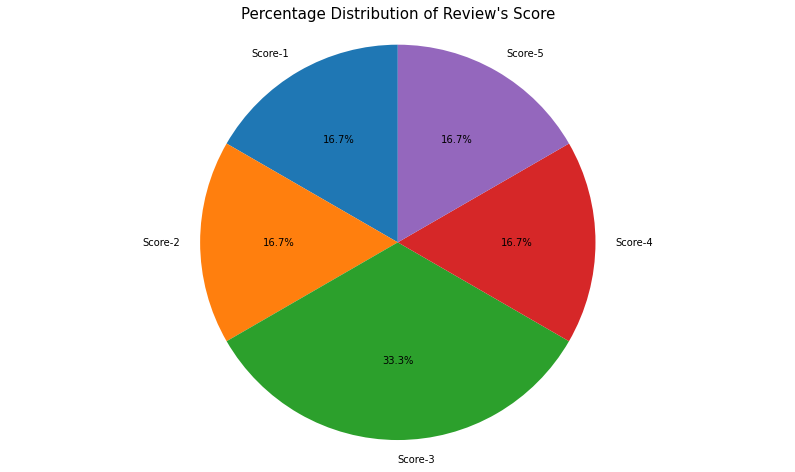

In [ ]:
plt.figure(figsize=(14,8))
sizes_=[16.67,16.67,33.33,16.67,16.67]
plt.pie(sizes_,
        labels=['Score-1','Score-2','Score-3','Score-4','Score-5'],
        startangle=90,
        shadow=False,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title("Percentage Distribution of Review's Score",fontsize=15)
plt.show()

### Number of Thumbsup (Aggrement) per Review Score

In [ ]:
Review_DF.columns

Index(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at',
       'ReviewDate', 'sortOrder'],
      dtype='object')

In [ ]:
# LoanDF.groupby(["loanDefault"]).agg({'clientMaritalStatus':'value_counts'}) 

In [ ]:
#Review_DF.groupby(['score']).agg({'thumbsUpCount':'sum'}) 

In [ ]:
score_list = []
thumbsup_list = []
for i in range(1,6):
    thumbsup_sum = Review_DF[Review_DF['score']==i][['content','thumbsUpCount']].drop_duplicates()['thumbsUpCount'].sum()

    score_list.append(i)
    thumbsup_list.append(thumbsup_sum)

print(thumbsup_list)
print(score_list)   

[8752, 9057, 5667, 3374, 3915]
[1, 2, 3, 4, 5]


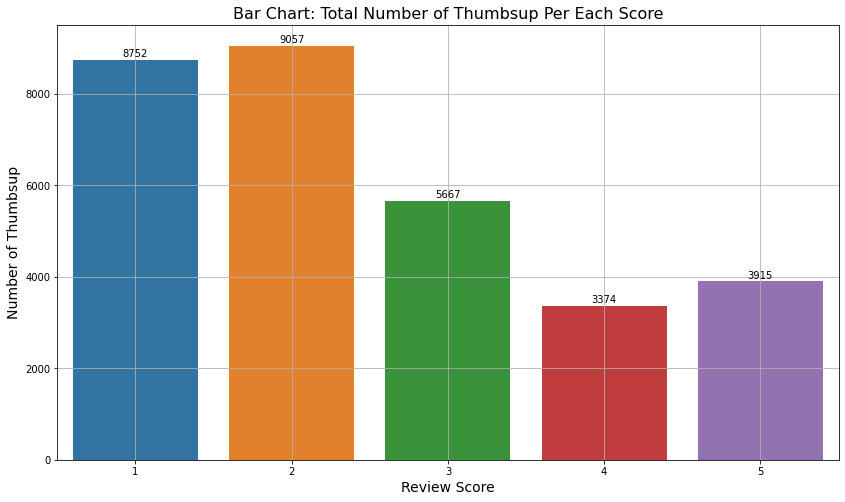

In [ ]:
plt.figure(figsize=(14,8))
ax =sns.barplot(score_list,thumbsup_list)
x_locs,x_lables = plt.xticks()
#plt.setp(x_lables, rotation=60)  
plt.title("Bar Chart: Total Number of Thumbsup Per Each Score", fontsize=16)
plt.ylabel("Number of Thumbsup", fontsize=14)
plt.xlabel("Review Score",fontsize=14)
plt.grid()

                  #adding text lables...
r = ax.patches
labels = thumbsup_list
for rec,label in zip(r,labels):
  height = rec.get_height()
  ax.text(rec.get_x() + rec.get_width()/2,
          height+10,
          label,
          ha='center',
          va='bottom')

In [ ]:
Review_DF.groupby(['score']).count()['content']

score
1    200
2    200
3    400
4    200
5    200
Name: content, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


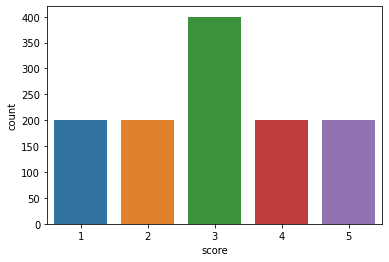

In [ ]:
sns.countplot(Review_DF.score)

## Text Cleaning & Pre-Processing:

In [ ]:
Review_DF.columns

Index(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at',
       'ReviewDate', 'sortOrder'],
      dtype='object')

In [ ]:
### Text Cleaning Functions 
def remove_html_tags(text_input):
    regex_sign = re.compile('<.*?>')
    cleaned_text = re.sub(regex_sign,' ',text_input)
    return cleaned_text

def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

def cleaning(doc):
    txt = [token.lemma_ for token in doc if not token.is_stop]   # Lemmatizing and removing stopwords
    if len(txt) > 2:
        return ' '.join(txt)

i =0;
for reviews in Review_DF['content'].values:
    if (len(re.findall('<.*?>', reviews))):
        print(i)
        print(reviews)
        break;
    i+=1;

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # 

In [ ]:
alpha_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in Review_DF['content'])      
t = time()
txt = [cleaning(doc) for doc in nlp.pipe(alpha_cleaning, batch_size=5000)]
print('Clean up Time: {} mins'.format(round((time() - t) / 60, 2)))  

Clean up Time: 0.05 mins


In [ ]:
  ## Original Review Content;
Review_DF['content'][1]

'One of the worst apps I have used. The interface is really bad. You cannot find what you want. All buttons are banners with ads. There are no specific menu items for Delivery, Menu, Points Barcode, etc.. Also, most of the pages in the app are web pages and not native app pages. Just go back to the old app and add the points and barcode to that.'

In [ ]:
  ## Cleaned Review Content;
txt[1]

'bad app interface bad find want button banner ad specific menu item delivery menu point barcode etc page app web page native app page old app add point barcode'

In [ ]:
print(len(txt))

1200


In [ ]:
Clean_Reviews = pd.DataFrame({'CleanContent': txt})
#Clean_Reviews = Clean_Reviews.dropna().drop_duplicates()
print("Shape of Clean Description Data: ",Clean_Reviews.shape)
Clean_Reviews

Shape of Clean Description Data:  (1200, 1)


CleanContent
0     constant problem time say install google play ...
1     bad app interface bad find want button banner ...
2     see bad system stability app able past loading...
3     worthless junk will card save profile will mes...
4     work looong time month keep send guy message k...
...                                                 ...
1195                                               None
1196                            good expirience liovi'n
1197                                               None
1198                                               None
1199                                               None

[1200 rows x 1 columns]

In [ ]:
Review_DF.columns

Index(['content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at',
       'ReviewDate', 'sortOrder'],
      dtype='object')

In [ ]:
final_DF = pd.merge(Clean_Reviews,Review_DF, left_index=True, right_index=True)
final_DF = final_DF[['content','CleanContent','score', 'thumbsUpCount', 'reviewCreatedVersion', 'at','ReviewDate', 'sortOrder']]
final_DF

content  \
0     Constant problems. One time it says I have to ...   
1     One of the worst apps I have used. The interfa...   
2     Haven't seen a worst system stability in an ap...   
3     Worthless junk. Won't take a card to save in m...   
4     Not working in a looong time, it's been months...   
...                                                 ...   
1195                                               Good   
1196                  My best expirience i'm liovi'n it   
1197                            zdrowe jedzeniebpolecam   
1198                                               Good   
1199                                            2 years   

                                           CleanContent  score  thumbsUpCount  \
0     constant problem time say install google play ...      1            470   
1     bad app interface bad find want button banner ...      1            669   
2     see bad system stability app able past loading...      1             12   
3     worthless junk will card save profile will mes...      1             15   
4     work looong time month keep send guy message k...      1            126   
...                                                 ...    ...            ...   
1195                                               None      5              0   
1196                            good expirience liovi'n      5              0   
1197                                               None      5              0   
1198                                               None      5              0   
1199                                               None      5              0   

     reviewCreatedVersion                   at  ReviewDate      sortOrder  
0                   2.7.0  2020-07-27 12:59:31  2020-07-27  most_relevant  
1                  2.19.0  2021-05-05 17:20:51  2021-05-05  most_relevant  
2                   2.8.3  2020-09-28 14:29:55  2020-09-28  most_relevant  
3                     NaN  2020-10-11 17:38:59  2020-10-11  most_relevant  
4                  2.13.2  2020-12-21 08:30:52  2020-12-21  most_relevant  
...                   ...                  ...         ...            ...  
1195                  NaN  2022-05-27 18:36:29  2022-05-27         newest  
1196               2.41.0  2022-05-27 17:07:28  2022-05-27         newest  
1197               2.38.1  2022-05-27 13:03:18  2022-05-27         newest  
1198                  NaN  2022-05-27 12:03:10  2022-05-27         newest  
1199               2.41.0  2022-05-27 02:10:14  2022-05-27         newest  

[1200 rows x 8 columns]

In [ ]:
final_DF[final_DF['CleanContent'].isnull()]

content CleanContent  score  thumbsUpCount  \
106                      very² bad app         None      1              0   
107                       Server error         None      1              0   
110               The app doesn't work         None      1              0   
128      Rewards are too expensive now         None      1              0   
134                        99999⁹99⁹99         None      1              0   
...                                ...          ...    ...            ...   
1194  برنامج ممتاز و اكل ماك دائما حلو         None      5              0   
1195                              Good         None      5              0   
1197           zdrowe jedzeniebpolecam         None      5              0   
1198                              Good         None      5              0   
1199                           2 years         None      5              0   

     reviewCreatedVersion                   at  ReviewDate sortOrder  
106                   NaN  2022-06-04 12:31:57  2022-06-04    newest  
107                2.41.0  2022-06-04 12:20:56  2022-06-04    newest  
110                2.41.0  2022-06-04 10:15:41  2022-06-04    newest  
128                2.41.0  2022-06-03 10:08:38  2022-06-03    newest  
134                   NaN  2022-06-03 04:49:26  2022-06-03    newest  
...                   ...                  ...         ...       ...  
1194               2.41.0  2022-05-27 19:35:05  2022-05-27    newest  
1195                  NaN  2022-05-27 18:36:29  2022-05-27    newest  
1197               2.38.1  2022-05-27 13:03:18  2022-05-27    newest  
1198                  NaN  2022-05-27 12:03:10  2022-05-27    newest  
1199               2.41.0  2022-05-27 02:10:14  2022-05-27    newest  

[250 rows x 8 columns]

In [ ]:
DFcleaned_content =  final_DF[final_DF['CleanContent'].notnull()][['CleanContent','score']]
cleaned_content = DFcleaned_content['CleanContent']
cleaned_content

0       constant problem time say install google play ...
1       bad app interface bad find want button banner ...
2       see bad system stability app able past loading...
3       worthless junk will card save profile will mes...
4       work looong time month keep send guy message k...
                              ...                        
1171                                 easy use tine saving
1174                         good service good work thank
1176                      mind like appp bcz deliver area
1193                                   worth download ngl
1196                              good expirience liovi'n
Name: CleanContent, Length: 950, dtype: object

In [ ]:
content_score = DFcleaned_content['score']
content_score

0       1
1       1
2       1
3       1
4       1
       ..
1171    5
1174    5
1176    5
1193    5
1196    5
Name: score, Length: 950, dtype: int64

## Clustering on Text Data :

## KMeans 

### BOW [Bag of Word]:



**- Text Vectorization**

In [ ]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(cleaned_content.values)
bow

<950x2628 sparse matrix of type '<class 'numpy.int64'>'
	with 12630 stored elements in Compressed Sparse Row format>

In [ ]:
  ### 
terms = count_vect.get_feature_names()
print(terms[1:10])
print(terms[100:110])

['aap', 'abbreviation', 'abia', 'ability', 'abit', 'able', 'absolute', 'absolutely', 'abt']
['annoyance', 'annoying', 'answer', 'anymore', 'anyplace', 'anytime', 'aop', 'apa', 'apart', 'ape']


**- Hyperparameter Tuning:**

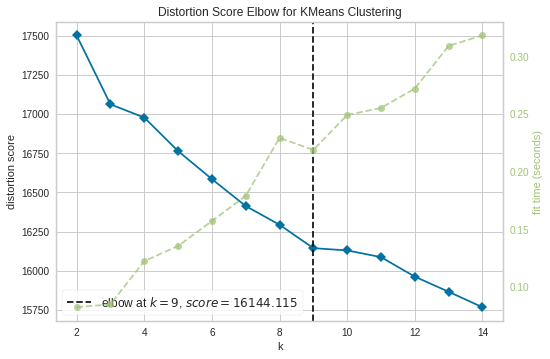

In [ ]:
# 
visualizer = kelbow_visualizer(KMeans(),bow, k = (2,15)) #metric = 'silhouette',
visualizer.show()

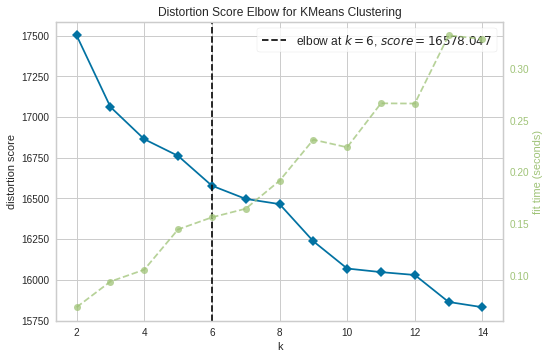

In [ ]:
KMeans_Model = KMeans()
visualizer_2 = kelbow_visualizer(KMeans_Model, bow,k = (2,15)) #,metric = 'silhouette'
#3visualizer_2

In [ ]:
 #np.max(KMeans_labels)

- To get the best parameters; Lets make the associated Scores the true number of clusters ; 

- Then we use the get resulting best parameters to get the sufficicnet n_clusters

In [ ]:
def get_best_params_KMeans(points, labels,k):
    i_ = ['k-means++', 'random']
    n_init_ = [5,10,15]
    alg_methods = ['auto', 'full' ,'elkan']
    best_param = []
    s_ = 0       # silhouette_score 
    mi_ = 0      # Mutual info score
    for a in alg_methods:
      for b in i_:   
          for c in n_init_:
              KM = KMeans(n_clusters= k,random_state=42,init = b, n_init = c,algorithm = a)
              KM_pred = KM.fit_predict(points)
              score_sil = si(points, KM_pred)
              score_mi = mi(labels,KM_pred)
              if (s_< score_sil) & (mi_ < score_mi):
                  s_ = score_sil
                  mi_ = score_mi
                  best_param = [b,c,a]
    
    return best_param,s_ ,mi_

In [ ]:
get_best_params_KMeans(points=bow,labels=content_score, k=6)

(['k-means++', 5, 'auto'], 0.017928114435448436, 0.03729508386938446)

In [ ]:
 ## Modelling with optimal Parameters:
model_1_KMeans = KMeans(n_clusters = 6, 
                        init ='k-means++',
                        algorithm = 'auto',
                        random_state=42,
                        n_init = 5)
    
model_1_KMeans.fit(bow)

KMeans(n_clusters=6, n_init=5, random_state=42)

In [ ]:
ModelKMeans = KMeans(n_clusters = 6, 
                        init ='k-means++',
                        algorithm = 'auto',
                        random_state=42,
                        n_init = 5)

KMPred = ModelKMeans.fit_predict(bow)
score_sil_1 = si(bow, KMPred)
score_mi_1 = mi(content_score,KMPred)

print(score_sil_1)
print(score_mi_1)

0.017928114435448436
0.03729508386938446


In [ ]:
KMeans_labels = model_1_KMeans.labels_
KMeans_cluster_center = model_1_KMeans.cluster_centers_ 
KMeans_cluster_center

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01086957, 0.        ,
        0.        ],
       [0.0038835 , 0.00776699, 0.00194175, ..., 0.        , 0.00194175,
        0.00194175]])

In [ ]:
## Assign Cluster label to clusters:
cluster_DF  = final_DF[final_DF['CleanContent'].notnull()]
cluster_DF['KMeansBOWClusters'] = KMeans_labels
cluster_DF.sample(5)

content  \
599  I don't know which app is real McDonald's? Too...   
877              Love this app and it has great offers   
5    The app was great before, but now that they to...   
274           Restaurant filter does not seem to work.   
971               Rider je yg ok..md masih kedekut sos   

                                          CleanContent  score  thumbsUpCount  \
599  know app real mcdonald different one red backg...      3              0   
877                               love app great offer      4              0   
5    app great take deal use lot point small cola m...      1            621   
274                             restaurant filter work      2              0   
971                rider je yg ok md masih kedekut sos      4              0   

    reviewCreatedVersion                   at  ReviewDate      sortOrder  \
599                  NaN  2020-08-04 04:04:05  2020-08-04  most_relevant   
877               2.38.1  2022-04-17 04:43:57  2022-04-17  most_relevant   
5                 2.41.0  2022-05-17 07:21:33  2022-05-17  most_relevant   
274               2.38.1  2022-04-14 20:20:04  2022-04-14  most_relevant   
971                  NaN  2022-04-27 17:20:50  2022-04-27         newest   

     KMeansBOWClusters  
599                  5  
877                  5  
5                    1  
274                  2  
971                  5

In [ ]:
order_centroids = model_1_KMeans.cluster_centers_.argsort()[:,::-1]
terms = count_vect.get_feature_names()
for i in range(6):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind], end='')
        print()

Cluster 0: reset
 password
 email
 activation
 account
 try
 domain
 different
 break
 ask
Cluster 1: deal
 app
 use
 like
 good
 mcdonald
 point
 offer
 redeem
 time
Cluster 2: work
 app
 offer
 time
 update
 try
 great
 order
 redeem
 version
Cluster 3: app
 time
 try
 work
 update
 use
 order
 problem
 open
 offer
Cluster 4: order
 app
 time
 delivery
 want
 try
 need
 place
 use
 like
Cluster 5: app
 good
 order
 time
 offer
 use
 food
 mcdonald
 delivery
 like


In [ ]:
## get top words in each cluster:
clusters_list = []
top_words = []
centroids_list = []
order_centroids = model_1_KMeans.cluster_centers_.argsort()[:,::-1]
terms = count_vect.get_feature_names()
for i in range(6):
    clusters_list.append(i)
    centroids_value = order_centroids[i,:10]
    term_values = [terms[ind] for ind in centroids_value]

    centroids_list.append(centroids_value)
    top_words.append(term_values)


print(len(top_words))

6


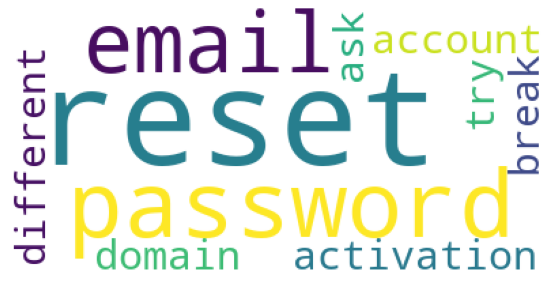

In [ ]:
top_words[0]
unique_string = (" ").join(top_words[0])

wordcloud = WordCloud(collocations=False,background_color='white').generate(unique_string)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
Word_cloud_list = []
for i in range(6): 
    unique_string = (" ").join(top_words[i])
    wordcloud = WordCloud(collocations=False,background_color='white').generate(unique_string)
    Word_cloud_list.append(wordcloud)


print(len(Word_cloud_list))

6


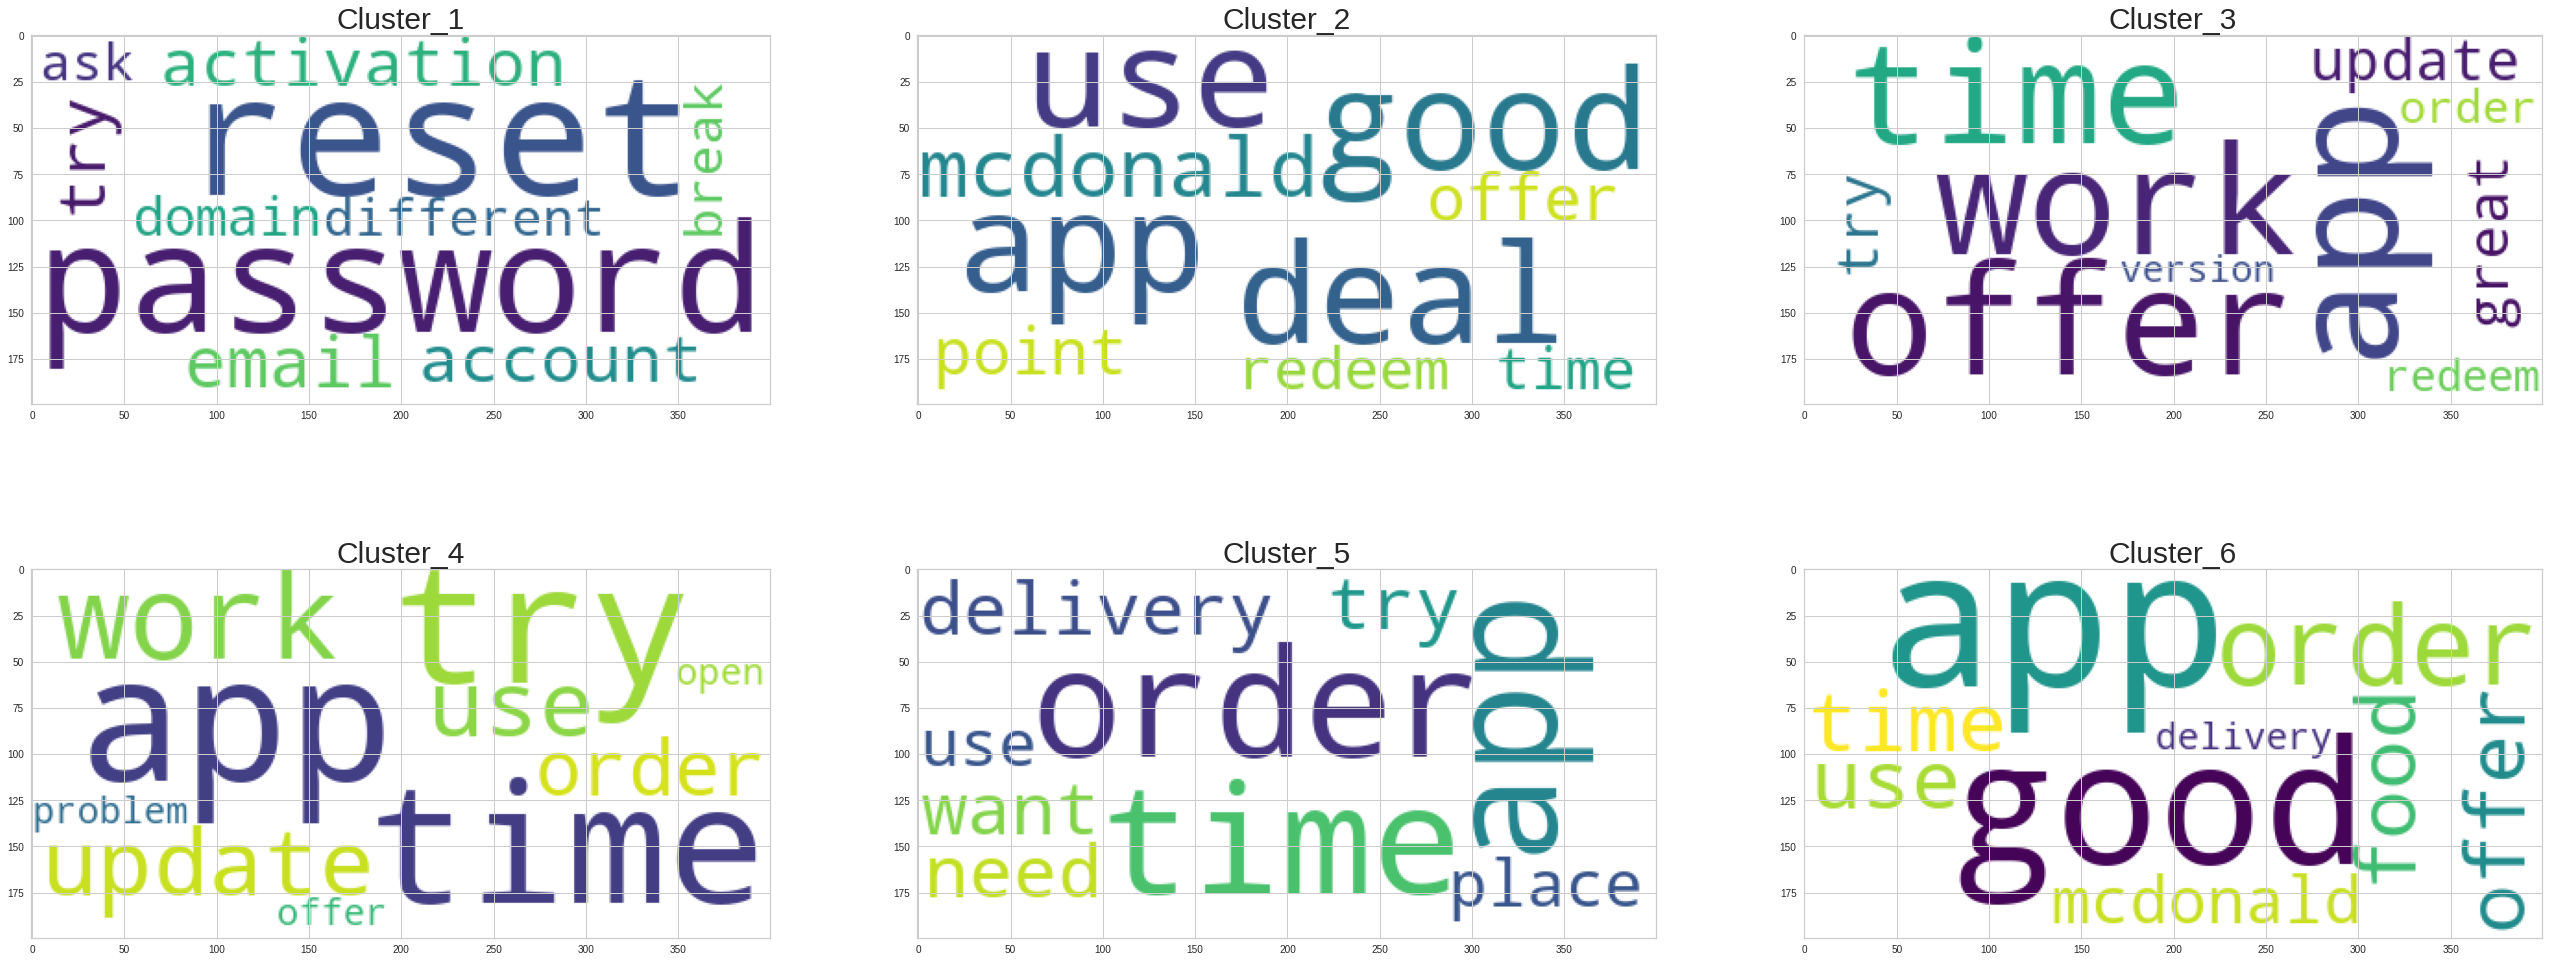

In [ ]:

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(45,18))
# cluster-1
ax[0,0].imshow(Word_cloud_list[0])
ax[0,0].set_title('Cluster_1',fontsize=30)
# cluster-2
ax[0,1].imshow(Word_cloud_list[1])
ax[0,1].set_title('Cluster_2',fontsize=30)
# cluster-3
ax[0,2].imshow(Word_cloud_list[2])
ax[0,2].set_title('Cluster_3',fontsize=30)
#
ax[1,0].imshow(Word_cloud_list[3])
ax[1,0].set_title('Cluster_4',fontsize=30)
#
ax[1,1].imshow(Word_cloud_list[4])
ax[1,1].set_title('Cluster_5',fontsize=30)
#
ax[1,2].imshow(Word_cloud_list[5])
ax[1,2].set_title('Cluster_6',fontsize=30)

plt.subplots_adjust(hspace=0.2)

In [ ]:
## Visualization of clusters:

In [ ]:
sklearn_pca = PCA(n_components=2 )
bow_array = sklearn_pca.fit_transform(bow.toarray())
print(bow_array.shape)
bow_array

(950, 2)


array([[ 6.97452672e-01, -6.33263409e-01],
       [ 2.89045714e+00, -1.15195741e+00],
       [ 1.75847754e+00, -1.16660195e+00],
       ...,
       [-1.13585936e+00,  1.46012997e-03],
       [-1.14462735e+00, -5.69061541e-02],
       [-1.19603955e+00, -8.77870908e-02]])

In [ ]:
model_1_KMeans = KMeans(n_clusters = 6, 
                        init ='k-means++',
                        algorithm = 'auto',
                        random_state=42,
                        n_init = 5)

KM_BOW_fit = model_1_KMeans.fit(bow_array)
KM_BOW_Pred = model_1_KMeans.predict(bow_array)
KM_BOW_Pred.shape

(950,)

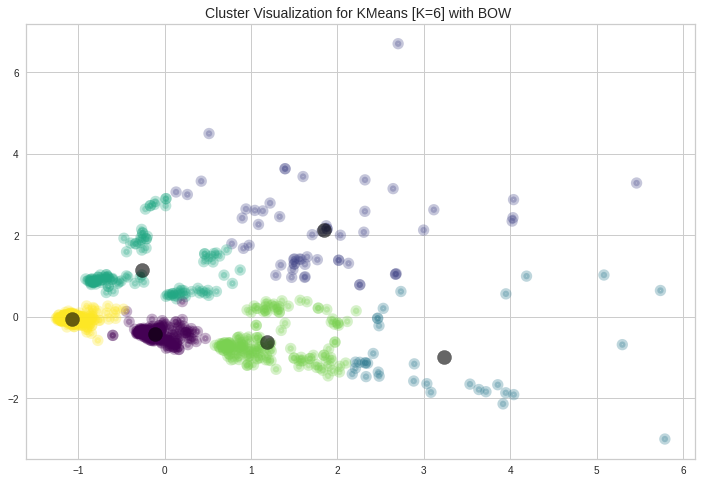

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for KMeans [K=6] with BOW ", fontsize=14)
plt.scatter(bow_array[:, 0], bow_array[:, 1], c=KM_BOW_Pred, s= 40,alpha=0.3, cmap='viridis',linewidths=5)
centers_ = KM_BOW_fit.cluster_centers_
plt.scatter(centers_[:,0],centers_[:,1],c='black',s=200,alpha=0.6)

In [ ]:
## Print Reviews in each Cluster:

In [ ]:
for i in range(6):
    print("Review Content from Cluster ", i, end='\n')
    print('-'*70)
    print(cluster_DF.iloc[cluster_DF.groupby(['KMeansBOWClusters']).groups[i][1]]['content'])
    print()
    print('-'*70)

Review Content from Cluster  0
----------------------------------------------------------------------
Developer email broken. The app won't remember passwords, when you reset, the reset email resets for a different domain, so after reset, you STILL can't sign in, as the app has a different domain to what the 'reset password' goes to. And I can't reset the 'free wifi' as it wants to email me the reset, which I can't access to read the email Then my Android Google passwords has TWO passwords (1 prefixed with www). Then it sends a 6 digit reset code which I copy n paste but it's not accepted.

----------------------------------------------------------------------
Review Content from Cluster  1
----------------------------------------------------------------------
Latest version very buggy. Try to redeem a deal and it takes forever to load and stop working. When try to load the deal, it mentioned already redeemed. Got a free nuggets deal but not reflected in my deals. My friend on iPhone a

In [ ]:
# i=0
# print("Review Content from Cluster ", 0, end='\n')
# print('-'*70)
# print(cluster_DF.iloc[cluster_DF.groupby(['KMeansBOWClusters']).groups[i][0]]['content'])
# print()
# print('-'*70)
# print(cluster_DF.iloc[cluster_DF.groupby(['KMeansBOWClusters']).groups[i][1]]['content'].sample())
# print()
# print('-'*70)

In [ ]:
cluster_DF.columns

Index(['content', 'CleanContent', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'ReviewDate', 'sortOrder',
       'KMeansBOWClusters'],
      dtype='object')

In [ ]:
# # def get_topwords_per_cluster(word_array,pred,n_tops=5):
#     lables = np.unique(pred)
#     dfs = []
#     for l in lables:
#         id_ = np.where(pred==l)
#         avg_score = np.mean(word_array[id_],axis=0) 
#         avg_sort = np.argsort(avg_score)[::-1][:n_tops]
#         features = count_vect.get_feature_names()
#         top_words = [(features[i],avg_score[i]) for i in avg_sort]
#         df = pd.DataFrame(top_words, columns = ['topwords','score'])
#         dfs.append(df)

#     return dfs

# #def top_words_plot(dfs,)

In [ ]:
# bow_top_words = get_topwords_per_cluster(bow_array,KM_BOW_Pred,n_tops=5)
# bow_top_words

In [ ]:
#  ## Modelling with optimal Parameters:
# model_1_KMeans = KMeans(n_clusters = 6, 
#                         init ='k-means++',
#                         algorithm = 'auto',
#                         random_state=42,
#                         n_init = 5)
    
# model_1_KMeans.fit(bow)

In [ ]:
# order_centroids = model_1_KMeans.cluster_centers_.argsort()[:,::-1]
# terms = count_vect.get_feature_names()
# for i in range(6):
#     print("Cluster %d:" % i, end='')
#     for ind in order_centroids[i,:10]:
#         print(' %s' % terms[ind], end='')
#         print()

In [ ]:
#   ### 
# terms = count_vect.get_feature_names()
# print(terms[1:10])
# print(terms[100:110])

# # 
# visualizer = kelbow_visualizer(KMeans(),bow, k = (2,15)) #metric = 'silhouette',
# visualizer.show()

# get_best_params_KMeans(points=bow, k=6)

#  ## Modelling with optimal Parameters:
# model_1_KMeans = KMeans(n_clusters = 6, 
#                         init ='k-means++',
#                         algorithm = 'auto',
#                         random_state=42,
#                         n_init = 5)
    
# model_1_KMeans.fit(bow)

# KMeans_labels = model_1_KMeans.labels_
# KMeans_cluster_center = model_1_KMeans.cluster_centers_ 
# KMeans_cluster_center

# ## Assign Cluster label to clusters:
# cluster_DF  = final_DF[final_DF['CleanContent'].notnull()]
# cluster_DF['KMeansBOWClusters'] = KMeans_labels
# cluster_DF.sample(5)

# ## get top words in each cluster:
# clusters_list = []
# top_words = []
# centroids_list = []
# order_centroids = model_1_KMeans.cluster_centers_.argsort()[:,::-1]
# terms = count_vect.get_feature_names()
# for i in range(6):
#     clusters_list.append(i)
#     centroids_value = order_centroids[i,:10]
#     term_values = [terms[ind] for ind in centroids_value]

#     centroids_list.append(centroids_value)
#     top_words.append(term_values)


# print(len(top_words))

# Word_cloud_list = []
# for i in range(6): 
#     unique_string = (" ").join(top_words[i])
#     wordcloud = WordCloud(collocations=False,background_color='white').generate(unique_string)
#     Word_cloud_list.append(wordcloud)


# print(len(Word_cloud_list))


# fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(45,18))
# # cluster-1
# ax[0,0].imshow(Word_cloud_list[0])
# ax[0,0].set_title('Cluster_1',fontsize=30)
# # cluster-2
# ax[0,1].imshow(Word_cloud_list[1])
# ax[0,1].set_title('Cluster_2',fontsize=30)
# # cluster-3
# ax[0,2].imshow(Word_cloud_list[2])
# ax[0,2].set_title('Cluster_3',fontsize=30)
# #
# ax[1,0].imshow(Word_cloud_list[3])
# ax[1,0].set_title('Cluster_4',fontsize=30)
# #
# ax[1,1].imshow(Word_cloud_list[4])
# ax[1,1].set_title('Cluster_5',fontsize=30)
# #
# ax[1,2].imshow(Word_cloud_list[5])
# ax[1,2].set_title('Cluster_6',fontsize=30)

# plt.subplots_adjust(hspace=0.2)

# sklearn_pca = PCA(n_components=2 )
# bow_array = sklearn_pca.fit_transform(bow.toarray())
# print(bow_array.shape)
# bow_array

# model_1_KMeans = KMeans(n_clusters = 6, 
#                         init ='k-means++',
#                         algorithm = 'auto',
#                         random_state=42,
#                         n_init = 5)

# KM_BOW_fit = model_1_KMeans.fit(bow_array)
# KM_BOW_Pred = model_1_KMeans.predict(bow_array)
# KM_BOW_Pred.shape

# plt.figure(figsize=(12,8))
# plt.title("Cluster Visualization for KMeans [K=6] with BOW ", fontsize=14)
# plt.scatter(bow_array[:, 0], bow_array[:, 1], c=KM_BOW_Pred, s= 40,alpha=0.3, cmap='viridis',linewidths=5)
# centers_ = KM_BOW_fit.cluster_centers_
# plt.scatter(centers_[:,0],centers_[:,1],c='black',s=200,alpha=0.6)

# for i in range(6):
#     print("Review Content from Cluster ", i, end='\n')
#     print('-'*70)
#     print(cluster_DF.iloc[cluster_DF.groupby(['KMeansBOWClusters']).groups[i][1]]['content'])
#     print()
#     print('-'*70)

### TFIDF [Term Frequency Inverse Document Frequency] :

In [ ]:
## Vectorization with TFIDF:
tfidf_vectors = TfidfVectorizer()
tfidf = tfidf_vectors.fit_transform(cleaned_content.values)
tfidf

<950x2628 sparse matrix of type '<class 'numpy.float64'>'
	with 12630 stored elements in Compressed Sparse Row format>

In [ ]:
### 
TFIDF_terms = tfidf_vectors.get_feature_names()
print(TFIDF_terms[1:10])
print(TFIDF_terms[100:110])

['aap', 'abbreviation', 'abia', 'ability', 'abit', 'able', 'absolute', 'absolutely', 'abt']
['annoyance', 'annoying', 'answer', 'anymore', 'anyplace', 'anytime', 'aop', 'apa', 'apart', 'ape']


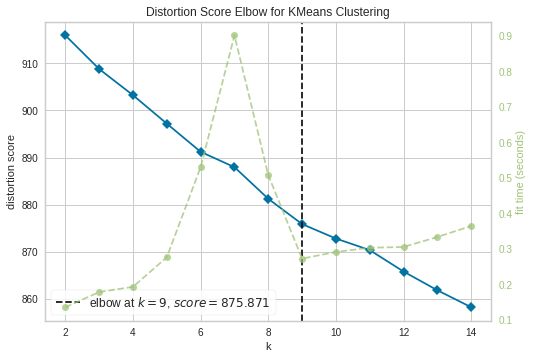

In [ ]:
# 
TFIDF_visualizer = kelbow_visualizer(KMeans(),tfidf, k = (2,15)) 
TFIDF_visualizer.show()

In [ ]:
get_best_params_KMeans(points=tfidf, labels = content_score ,k=9)

(['k-means++', 5, 'auto'], 0.01357048811346842, 0.0931272718101377)

In [ ]:
  ## Modelling with optimal Parameters:
model_2_KMeans = KMeans(n_clusters = 9, 
                        init ='k-means++',
                        algorithm = 'auto',
                        random_state=42,
                        n_init = 5)
    
model_2_KMeans.fit(tfidf)

KMeans(n_clusters=9, n_init=5, random_state=42)

In [ ]:
KMeans_TFIDF_labels = model_2_KMeans.labels_
KMeans_TFIDF_cluster_center = model_2_KMeans.cluster_centers_ 
KMeans_TFIDF_cluster_center

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00191276, 0.00472272, 0.00099416, ..., 0.        , 0.00070371,
        0.00070371],
       [0.        , 0.00897063, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:

## Assign Cluster label to clusters:
cluster_DF['KMeansTFIDFClusters'] = KMeans_TFIDF_labels
cluster_DF.sample(5)

content  \
42    Very bad application, so many information and ...   
693   Works as if the developers are paid in Mc cupo...   
795   Har noen ganger veldig brae kuponger. Men appe...   
274            Restaurant filter does not seem to work.   
1193                  it's very worth downloading ngl .   

                                           CleanContent  score  thumbsUpCount  \
42    bad application information confusing finally ...      1            127   
693   work developer pay mc cupon take forever load ...      3             10   
795   har noen ganger veldig brae kuponger man appen...      3              6   
274                              restaurant filter work      2              0   
1193                                 worth download ngl      5              0   

     reviewCreatedVersion                   at  ReviewDate      sortOrder  \
42                 2.40.2  2022-05-04 07:54:37  2022-05-04  most_relevant   
693                2.33.0  2022-03-24 13:39:50  2022-03-24         newest   
795                2.33.0  2021-12-24 13:58:21  2021-12-24         newest   
274                2.38.1  2022-04-14 20:20:04  2022-04-14  most_relevant   
1193                  NaN  2022-05-28 06:28:12  2022-05-28         newest   

      KMeansBOWClusters  KMeansTFIDFClusters  
42                    3                    0  
693                   2                    1  
795                   5                    1  
274                   2                    3  
1193                  5                    1

In [ ]:
## get top words in each cluster:
TF_top_words = []
TF_order_centroids = model_2_KMeans.cluster_centers_.argsort()[:,::-1]
TF_terms = tfidf_vectors.get_feature_names()
for i in range(9):
    tf_centroids = TF_order_centroids[i,:9]
    tf_term = [TF_terms[ind] for ind in tf_centroids]
    TF_top_words.append(tf_term)


print(len(TF_top_words))

9


In [ ]:
TFIDF_Word_cloud_list = []
for i in range(9): 
    tf_unique_string = (" ").join(TF_top_words[i])
    tf_wordcloud = WordCloud(collocations=False,background_color='white').generate(tf_unique_string)
    TFIDF_Word_cloud_list.append(tf_wordcloud)


print(len(TFIDF_Word_cloud_list))

9


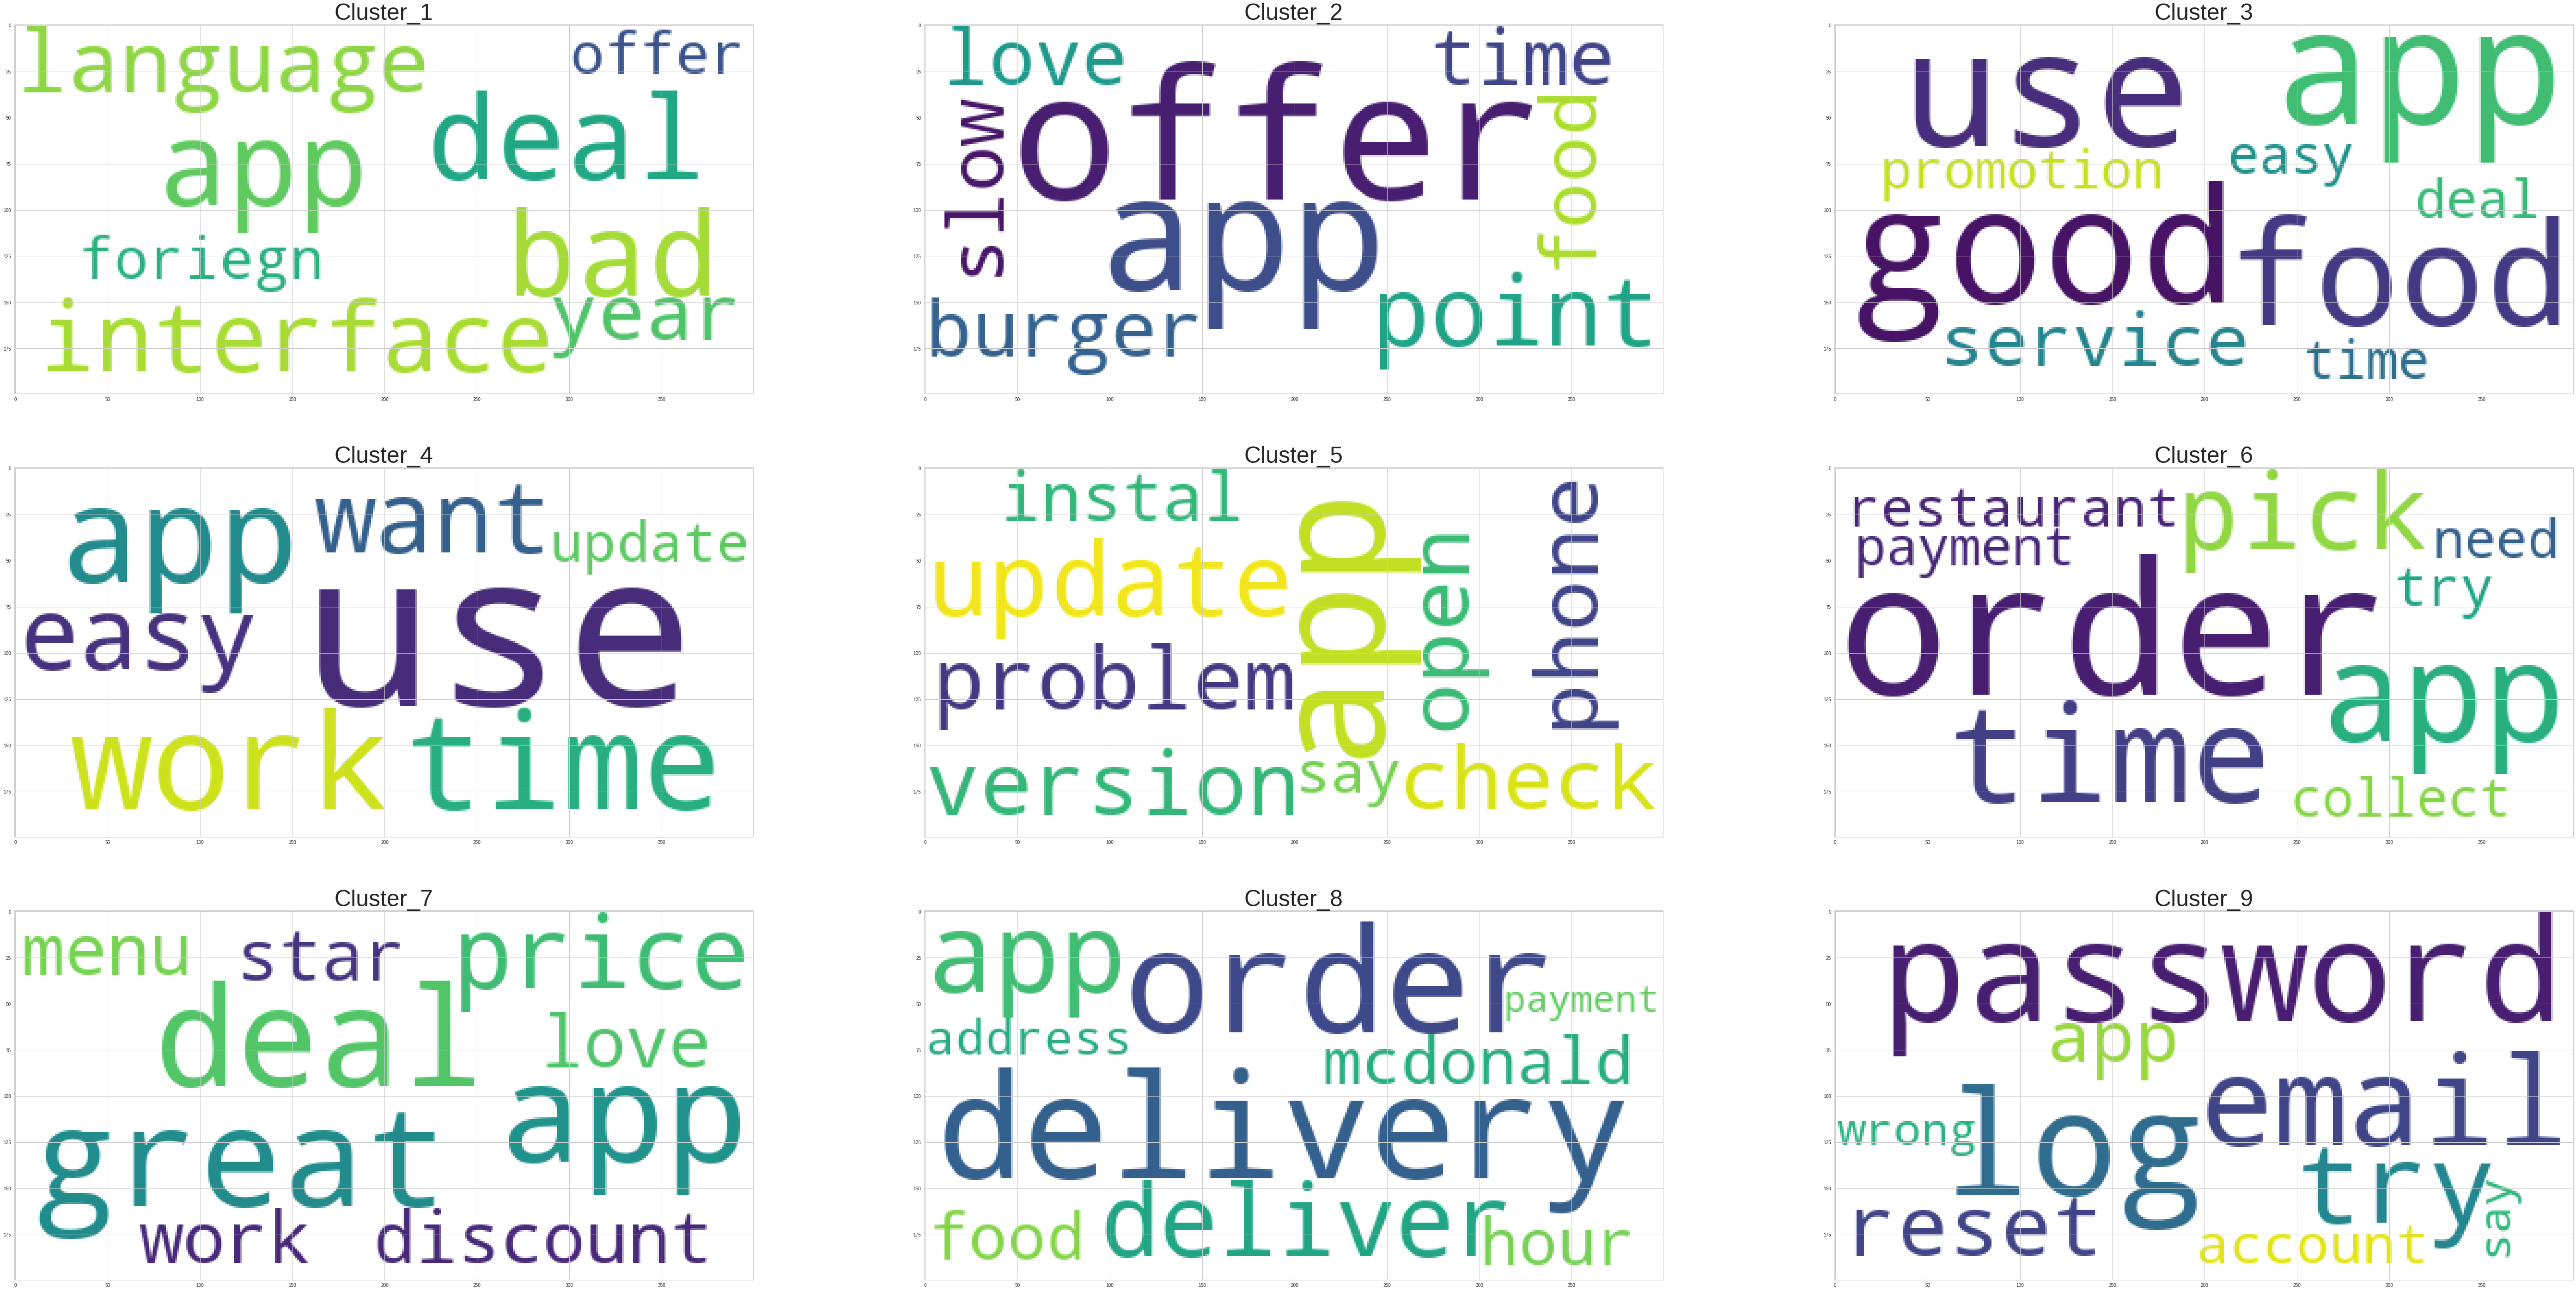

In [ ]:

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(100,50))
# cluster-1
ax[0,0].imshow(TFIDF_Word_cloud_list[0])
ax[0,0].set_title('Cluster_1',fontsize=50)
# cluster-2
ax[0,1].imshow(TFIDF_Word_cloud_list[1])
ax[0,1].set_title('Cluster_2',fontsize=50)
# cluster-3
ax[0,2].imshow(TFIDF_Word_cloud_list[2])
ax[0,2].set_title('Cluster_3',fontsize=50)
#
ax[1,0].imshow(TFIDF_Word_cloud_list[3])
ax[1,0].set_title('Cluster_4',fontsize=50)
#
ax[1,1].imshow(TFIDF_Word_cloud_list[4])
ax[1,1].set_title('Cluster_5',fontsize=50)
#
ax[1,2].imshow(TFIDF_Word_cloud_list[5])
ax[1,2].set_title('Cluster_6',fontsize=50)
#
ax[2,0].imshow(TFIDF_Word_cloud_list[6])
ax[2,0].set_title('Cluster_7',fontsize=50)
#
ax[2,1].imshow(TFIDF_Word_cloud_list[7])
ax[2,1].set_title('Cluster_8',fontsize=50)
#
ax[2,2].imshow(TFIDF_Word_cloud_list[8])
ax[2,2].set_title('Cluster_9',fontsize=50)
plt.subplots_adjust(hspace=0.2)


In [ ]:
sklearn_pca = PCA(n_components=2 )
tfidf_array = sklearn_pca.fit_transform(tfidf.toarray())
print(tfidf_array.shape)
tfidf_array

(950, 2)


array([[ 0.23556419, -0.04831755],
       [ 0.01242608, -0.03167227],
       [ 0.08519379, -0.00845288],
       ...,
       [-0.08117242, -0.02488583],
       [-0.01834814, -0.01620658],
       [-0.13065945,  0.1231453 ]])

In [ ]:
model_2b_KMeans = KMeans(n_clusters = 9, 
                        init ='k-means++',
                        algorithm = 'auto',
                        random_state=42,
                        n_init = 5)

KM_TFIDF_fit = model_2b_KMeans.fit(tfidf_array)
KM_TFIDF_Pred = model_2b_KMeans.predict(tfidf_array)
KM_TFIDF_Pred.shape

(950,)

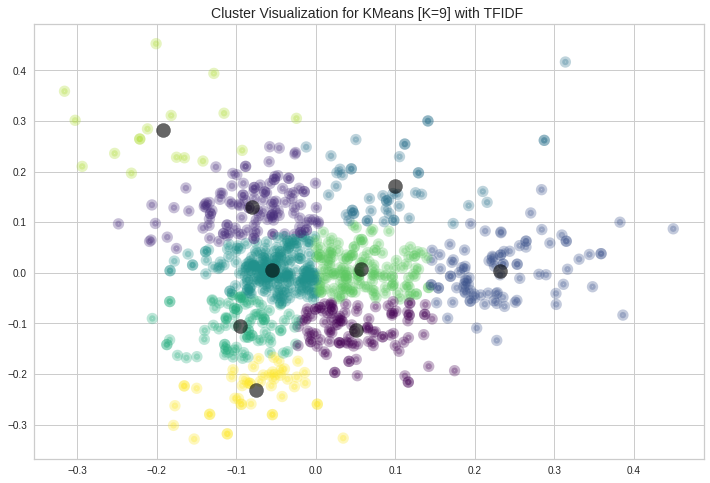

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for KMeans [K=9] with TFIDF ", fontsize=14)
plt.scatter(tfidf_array[:, 0], tfidf_array[:, 1], c=KM_TFIDF_Pred, s= 40,alpha=0.3, cmap='viridis',linewidths=5)
centers_TF = KM_TFIDF_fit.cluster_centers_
plt.scatter(centers_TF[:,0],centers_TF[:,1],c='black',s=200,alpha=0.6)

In [ ]:
print(cluster_DF.head(33)['score'][0])

1


In [ ]:

for i in range(9):
    print("Review Content from Cluster ", i, end='\n')
    print('-'*70)
    REVIEW_content = cluster_DF.iloc[cluster_DF.groupby(['KMeansTFIDFClusters']).groups[i][1]]['content']
    print(REVIEW_content)
    print()
    print('-'*70)

Review Content from Cluster  0
----------------------------------------------------------------------
Haven't seen a worst system stability in an app before. Haven't been able to get past the loading screen for the past 2 months, always showing the same error which I'm certain isn't even an actual error but just something they decided to put there to hide the abysmal stability. First app I've seen that updates to make the app worse.

----------------------------------------------------------------------
Review Content from Cluster  1
----------------------------------------------------------------------
So I recently moved to Finland. I don't yet speak the language. This app gives me no option to use English whilst being in Finland. So it's completely useless to me and anyone else who's new to the country or just visiting. A silly mistake that was easy avoidable

----------------------------------------------------------------------
Review Content from Cluster  2
----------------------

### Word2Vec [Word to Vector]

In [ ]:
i = 0
list_of_sent=[]
for sent in cleaned_content.values:
    list_of_sent.append(sent.split())

print(len(cleaned_content))    

950


In [ ]:
i=0
list_of_sent_train=[]
for sent in cleaned_content.values:
    filtered_sentence=[]
    sent=remove_html_tags(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

print(len(list_of_sent_train))

950


In [ ]:

     # Training the wor2vec model using content dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)
w2v_model

In [ ]:
w2vec = []; 
for sent in list_of_sent_train: 
    sent_vec = np.zeros(100)
    cnt_words =0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    w2vec.append(sent_vec)
w2vec = np.array(w2vec)
w2vec = np.nan_to_num(w2vec)
w2vec.shape

(950, 100)

In [ ]:
w2vec

array([[0.0569899 , 0.06839618, 0.12262988, ..., 0.14197195, 0.30939162,
        0.10058605],
       [0.0583335 , 0.07120646, 0.12852892, ..., 0.14526659, 0.31894616,
        0.10461999],
       [0.05175624, 0.06341718, 0.11204916, ..., 0.12751102, 0.28191403,
        0.09253654],
       ...,
       [0.04092443, 0.04778159, 0.08825437, ..., 0.10090869, 0.22171845,
        0.07481721],
       [0.03871053, 0.04378481, 0.08243802, ..., 0.0983842 , 0.21323455,
        0.06912053],
       [0.04608369, 0.06004591, 0.11084802, ..., 0.12389852, 0.27220604,
        0.08940588]])

In [ ]:
#w2v_model.get_feature_names()

**- Hyper-Parameter Tuning**

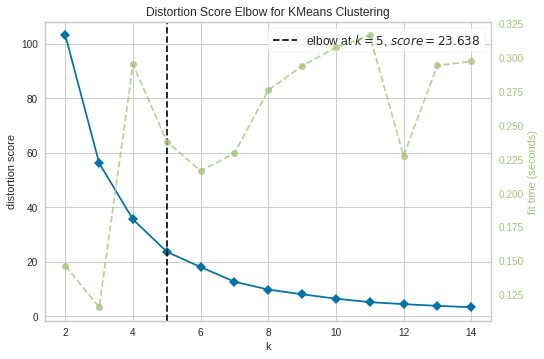

In [ ]:
# 
visualizer_w2vec = kelbow_visualizer(KMeans(),w2vec, k = (2,15)) #metric = 'silhouette',
visualizer_w2vec.show()

In [ ]:
get_best_params_KMeans(points= w2vec,labels =content_score,k=5)

(['k-means++', 5, 'auto'], 0.5324656936777252, 0.009144853601513958)

**- Get Clusters and Topwords**

In [ ]:
 ## Modelling with optimal Parameters:
model_1_W2V_KMeans = KMeans(n_clusters = 5, 
                        init ='k-means++',
                        algorithm = 'auto',
                        random_state=42,
                        n_init = 5)
    
model_1_W2V_KMeans.fit(w2vec)

KMeans(n_clusters=5, n_init=5, random_state=42)

In [ ]:
KMeans_labels_W2Vec = model_1_W2V_KMeans.labels_
KMeans_cluster_center_W2Vec = model_1_W2V_KMeans.cluster_centers_ 
KMeans_cluster_center_W2Vec[0][:10]

array([ 6.11192089e-02,  7.38587899e-02,  1.32545428e-01, -4.20049538e-01,
       -1.21506815e-01, -1.19943706e-01,  3.95935057e-02,  3.12160924e-04,
        2.25768250e-01,  9.36873213e-02])

In [ ]:
## Assign Cluster label to clusters:
cluster_DF['KMeansW2VecClusters'] = KMeans_labels_W2Vec
cluster_DF.sample(5)

content  \
616  Coupons work, but sometimes are hard to scan. ...   
535  There was a mini game that you got free coupon...   
862  Installed the latest updated apps. So far no p...   
613  No complain on food, but the drinks quality is...   
898  Like the promotions that is run on this app. B...   

                                          CleanContent  score  thumbsUpCount  \
616  coupon work hard scan jr game unpayable furthe...      3              2   
535  mini game get free coupon get mcflurry strawbe...      3              0   
862  instal late update app far problem run smoothl...      4              0   
613  complain food drink quality bad taste water fr...      3              0   
898  like promotion run app lengthen redemption tim...      4              1   

    reviewCreatedVersion                   at  ReviewDate      sortOrder  \
616               2.41.0  2022-05-21 19:56:09  2022-05-21         newest   
535                2.4.3  2020-01-31 14:18:47  2020-01-31  most_relevant   
862                  NaN  2022-05-24 11:10:17  2022-05-24  most_relevant   
613                  NaN  2022-05-27 07:15:42  2022-05-27         newest   
898                2.4.6  2020-03-18 01:25:24  2020-03-18  most_relevant   

     KMeansBOWClusters  KMeansTFIDFClusters  KMeansW2VecClusters  
616                  2                    6                    2  
535                  5                    6                    2  
862                  5                    4                    2  
613                  5                    0                    1  
898                  4                    5                    2

In [ ]:
## get top words in each cluster:
W2V_top_words  = []
for i in range(5):
  sample_topW = w2v_model.wv.most_similar(positive=[model_1_W2V_KMeans.cluster_centers_[i]],topn=10)
  TopWords = [i[0] for i in sample_topW ]
  W2V_top_words.append(TopWords)
    

print(len(W2V_top_words))      

5


In [ ]:
W2V_top_words[2]

['app',
 'order',
 'time',
 'work',
 'deal',
 'try',
 'offer',
 'code',
 'delivery',
 'page']

In [ ]:
W2V_Word_cloud_list = []
for i in range(5): 
    W2V_unique_string = (" ").join(W2V_top_words[i])
    W2V_wordcloud = WordCloud(collocations=False,background_color='white').generate(W2V_unique_string)
    W2V_Word_cloud_list.append(W2V_wordcloud)


print(len(W2V_Word_cloud_list))

5


KMeans 'Word-2-Vectors' Cluster Top Words


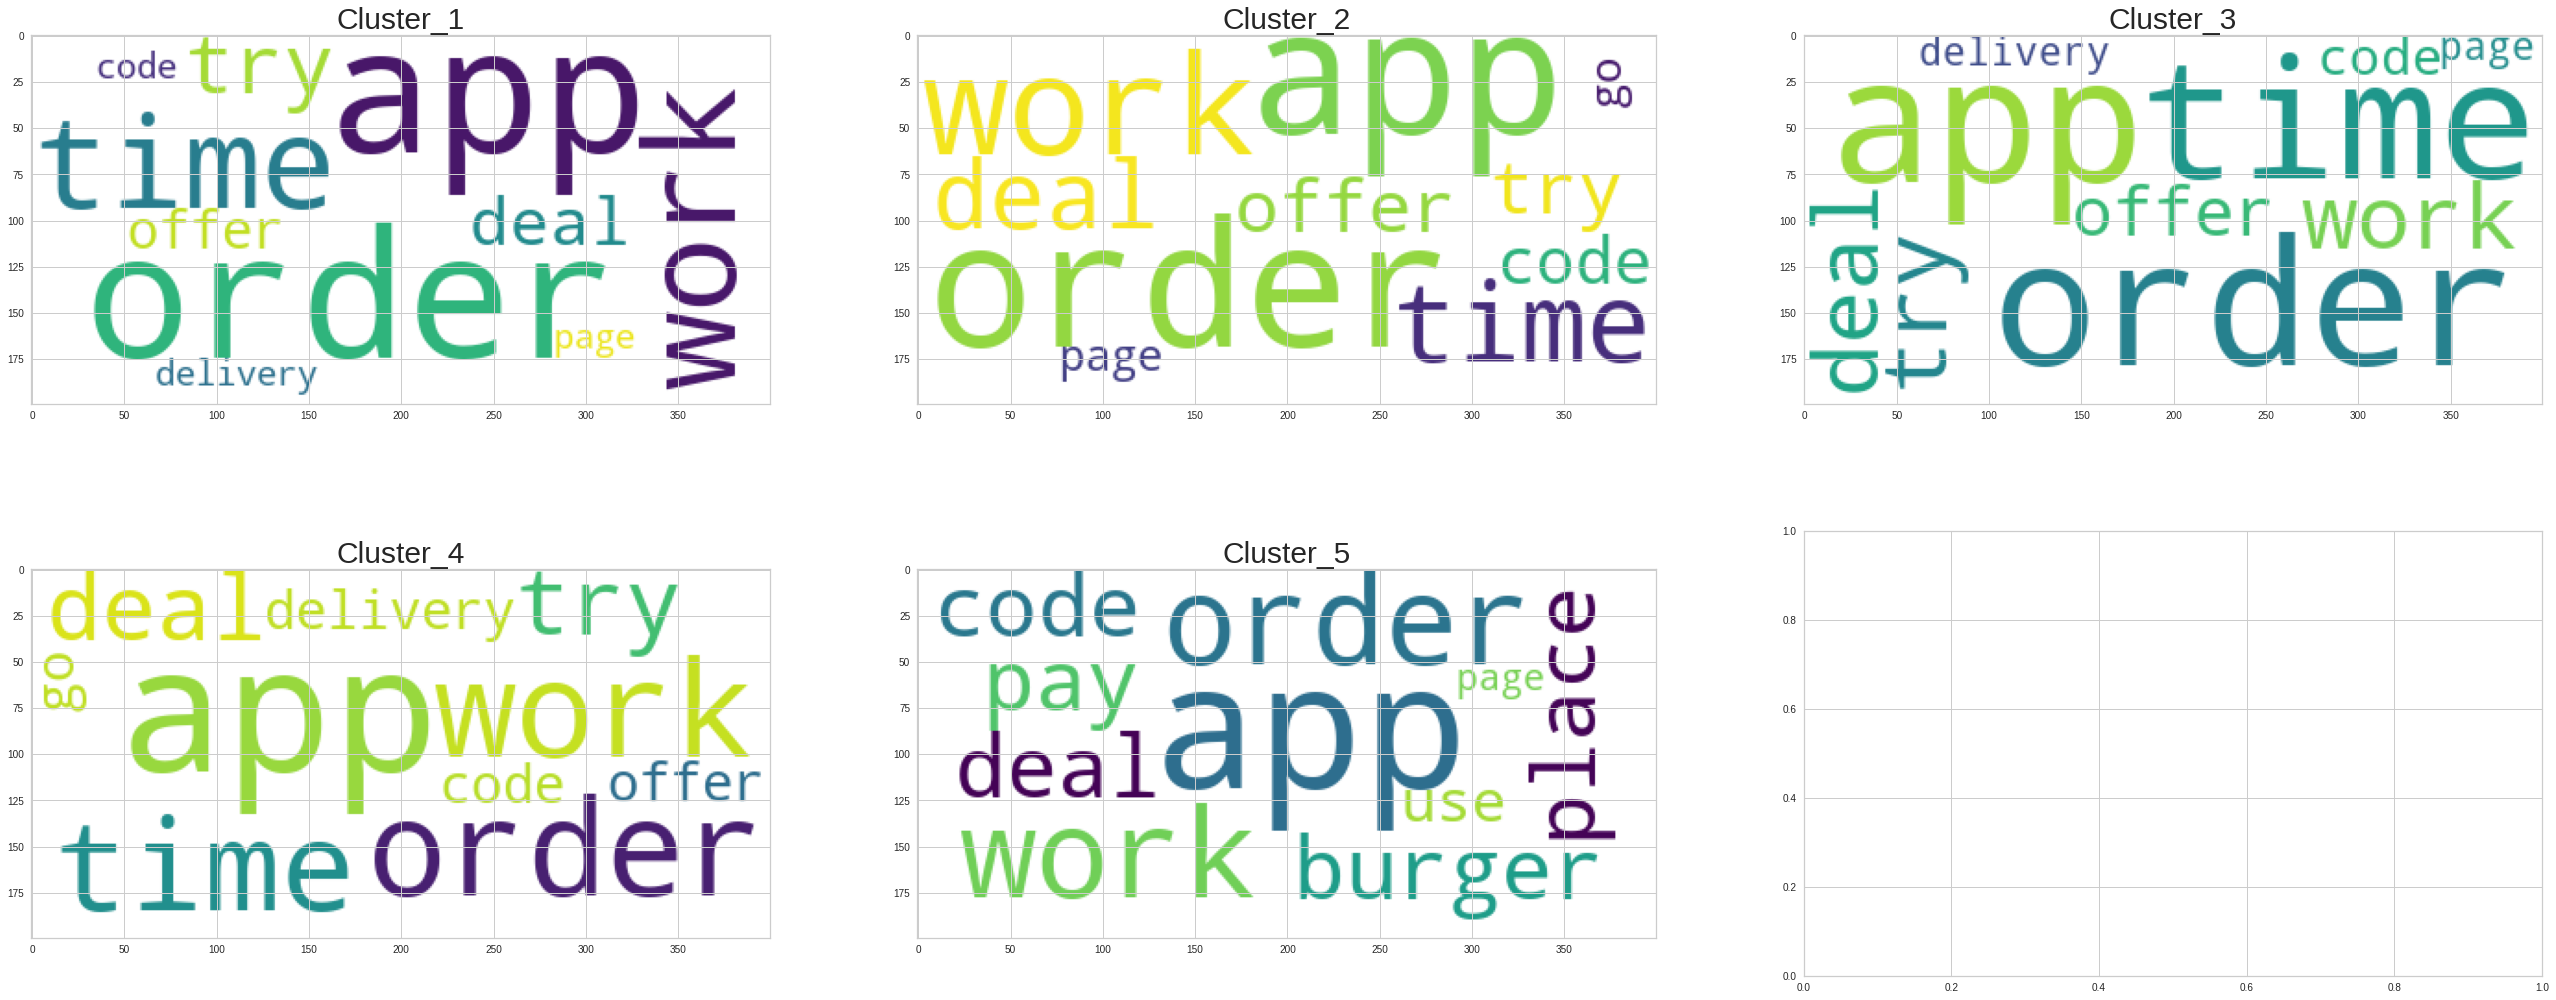

In [ ]:
print("KMeans 'Word-2-Vectors' Cluster Top Words")
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(45,18))
# cluster-1
ax[0,0].imshow(W2V_Word_cloud_list[0])
ax[0,0].set_title('Cluster_1',fontsize=30)
# cluster-2
ax[0,1].imshow(W2V_Word_cloud_list[1])
ax[0,1].set_title('Cluster_2',fontsize=30)
# cluster-3
ax[0,2].imshow(W2V_Word_cloud_list[2])
ax[0,2].set_title('Cluster_3',fontsize=30)
#
ax[1,0].imshow(W2V_Word_cloud_list[3])
ax[1,0].set_title('Cluster_4',fontsize=30)
#
ax[1,1].imshow(W2V_Word_cloud_list[4])
ax[1,1].set_title('Cluster_5',fontsize=30)


plt.subplots_adjust(hspace=0.2)

**- Cluster Visualization**

In [ ]:
sklearn_pca = PCA(n_components=2 )
W2V_array = sklearn_pca.fit_transform(w2vec)
print(W2V_array.shape)
W2V_array

(950, 2)


array([[ 0.15431997, -0.00200559],
       [ 0.23322836,  0.00159874],
       [-0.01836458,  0.00182079],
       ...,
       [-0.39833657, -0.00073866],
       [-0.46093966, -0.00490835],
       [-0.06911385,  0.0179233 ]])

In [ ]:

W2V_model_1_KMeans = KMeans(n_clusters = 5, 
                        init ='k-means++',
                        algorithm = 'auto',
                        random_state=42,
                        n_init = 5)

KM_W2V_fit = W2V_model_1_KMeans.fit(W2V_array)
KM_W2V_Pred = W2V_model_1_KMeans.predict(W2V_array)
KM_W2V_Pred.shape

(950,)

In [ ]:
# plt.figure(figsize=(12,8))
# plt.title("Cluster Visualization for KMeans [K=5] with Word2Vec ", fontsize=14)
# plt.scatter(W2V_array[:, 0], W2V_array[:, 1], c=KM_W2V_Pred, s= 40,alpha=0.3, cmap='rainbow',linewidths=5)
# centers_w2v = KM_W2V_fit.cluster_centers_
# plt.scatter(centers_w2v[:,0],centers_w2v[:,1],c='black',s=200,alpha=0.6)

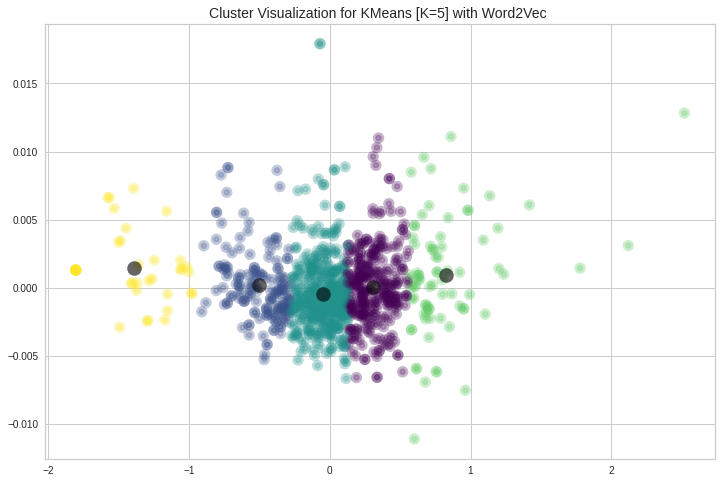

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for KMeans [K=5] with Word2Vec ", fontsize=14)
plt.scatter(W2V_array[:, 0], W2V_array[:, 1], c=KM_W2V_Pred, s= 40,alpha=0.3, cmap='viridis',linewidths=5)
centers_w2v = KM_W2V_fit.cluster_centers_
plt.scatter(centers_w2v[:,0],centers_w2v[:,1],c='black',s=200,alpha=0.6)

In [ ]:
for i in range(5):
    print("Review Content from Cluster ", i, end='\n')
    print('-'*70)
    print(cluster_DF.iloc[cluster_DF.groupby(['KMeansW2VecClusters']).groups[i][1]]['content'])
    print()
    print('-'*70)

Review Content from Cluster  0
----------------------------------------------------------------------
One of the worst apps I have used. The interface is really bad. You cannot find what you want. All buttons are banners with ads. There are no specific menu items for Delivery, Menu, Points Barcode, etc.. Also, most of the pages in the app are web pages and not native app pages. Just go back to the old app and add the points and barcode to that.

----------------------------------------------------------------------
Review Content from Cluster  1
----------------------------------------------------------------------
So I recently moved to Finland. I don't yet speak the language. This app gives me no option to use English whilst being in Finland. So it's completely useless to me and anyone else who's new to the country or just visiting. A silly mistake that was easy avoidable

----------------------------------------------------------------------
Review Content from Cluster  2
----------

In [ ]:
## count number of scores to each clusters fro corrrectiness

In [ ]:
cluster_DF.columns

Index(['content', 'CleanContent', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'ReviewDate', 'sortOrder',
       'KMeansBOWClusters', 'KMeansTFIDFClusters', 'KMeansW2VecClusters'],
      dtype='object')

## Agglomerative Clustering

In [ ]:
### Tentative Import
cluster_DF =  pd.read_csv('/content/Cluster_Result.csv')
cluster_DF.head(2)

content  \
0  Constant problems. One time it says I have to ...   
1  One of the worst apps I have used. The interfa...   

                                        CleanContent  score  thumbsUpCount  \
0  constant problem time say install google play ...      1            470   
1  bad app interface bad find want button banner ...      1            669   

  reviewCreatedVersion                   at  ReviewDate      sortOrder  \
0                2.7.0  2020-07-27 12:59:31  2020-07-27  most_relevant   
1               2.19.0  2021-05-05 17:20:51  2021-05-05  most_relevant   

   KMeansBOWClusters  KMeansTFIDFClusters  KMeansW2VecClusters  
0                  3                    4                    0  
1                  3                    0                    0

In [ ]:
#DFcleaned_content =  final_DF[final_DF['CleanContent'].notnull()][['CleanContent','score']]
cleaned_content = cluster_DF['CleanContent']
print(len(cleaned_content))
cleaned_content

950


0      constant problem time say install google play ...
1      bad app interface bad find want button banner ...
2      see bad system stability app able past loading...
3      worthless junk will card save profile will mes...
4      work looong time month keep send guy message k...
                             ...                        
945                                 easy use tine saving
946                         good service good work thank
947                      mind like appp bcz deliver area
948                                   worth download ngl
949                              good expirience liovi'n
Name: CleanContent, Length: 950, dtype: object

In [ ]:
content_score = cluster_DF['score']
print(len(content_score))
content_score

950


0      1
1      1
2      1
3      1
4      1
      ..
945    5
946    5
947    5
948    5
949    5
Name: score, Length: 950, dtype: int64

### BOW [Bag of Word]:

**- Text Vectorization**

In [ ]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(cleaned_content.values)
bow

<950x2628 sparse matrix of type '<class 'numpy.int64'>'
	with 12630 stored elements in Compressed Sparse Row format>

In [ ]:
### 
terms = count_vect.get_feature_names()
print(terms[1:10])
print(terms[100:110])

['aap', 'abbreviation', 'abia', 'ability', 'abit', 'able', 'absolute', 'absolutely', 'abt']
['annoyance', 'annoying', 'answer', 'anymore', 'anyplace', 'anytime', 'aop', 'apa', 'apart', 'ape']


In [ ]:
len(terms)

2628

**- Hyperparameter Tuning & Training:**

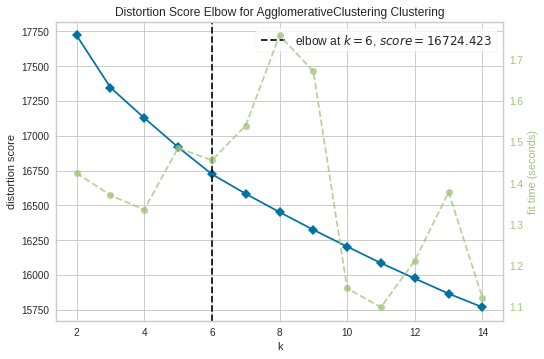

In [ ]:
# 
visualizer_AC = kelbow_visualizer(AgglomerativeClustering(),bow.toarray(), k = (2,15)) #metric = 'silhouette',
visualizer_AC.show()

In [ ]:

def get_best_params_aGC(points, labels,k):
    aff =  ['euclidean', 'l1', 'l2', 'manhattan', ]
    link = ['complete', 'average','single']
    best_ac = []
    s_ = 0       
    mi_ = 0  
    for a in aff:
      for b in link: 
              AC = AgglomerativeClustering(n_clusters=k, affinity=a, linkage= b)
              AC_pred = AC.fit_predict(points)
              score_sil = si(points, AC_pred)
              score_mi = mi(labels,AC_pred)
              if (s_< score_sil)&(mi_ < score_mi):
                  s_ = score_sil
                  mi_ = score_mi
                  best_ac = [a,b]
    return best_ac,s_,mi_

In [ ]:
get_best_params_aGC(points=bow.toarray(),labels=content_score, k=6)

(['euclidean', 'complete'], 0.3257920322089517, 0.015119814809741446)

In [ ]:
 ## Modelling with optimal Parameters:
model_AggC_BOW =  AgglomerativeClustering(n_clusters=6, 
                                          affinity='euclidean', 
                                          linkage= 'complete')
    
model_AggC_BOW.fit(bow.toarray())

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [ ]:
AggC_BOW_labels = model_AggC_BOW.labels_
len(AggC_BOW_labels)

950

In [ ]:

## Assign Cluster label to clusters:
cluster_DF['AgcBOWClusters'] = AggC_BOW_labels
cluster_DF.sample(5)

content  \
726  Very nice and clean. Excellent customer servic...   
915                Great food. Great customer service.   
806  Customers area to small. Technology at orderin...   
904  Download the other app if your in America. Don...   
805  Mohon ditingkatkan kebersihannya, karena ada l...   

                                          CleanContent  score  thumbsUpCount  \
726  nice clean excellent customer service deal mcd...      4             13   
915                  great food great customer service      5              0   
806  customer area small technology order station f...      4              1   
904  download app america listen greedy moron compl...      5              4   
805  mohon ditingkatkan kebersihannya karena ada la...      4              0   

    reviewCreatedVersion                   at  ReviewDate      sortOrder  \
726               2.34.1  2022-01-07 23:08:02  2022-01-07  most_relevant   
915               2.38.1  2022-04-20 10:23:33  2022-04-20  most_relevant   
806               2.40.2  2022-05-04 08:32:01  2022-05-04         newest   
904               2.24.0  2021-07-26 20:45:29  2021-07-26  most_relevant   
805               2.40.2  2022-05-04 09:24:18  2022-05-04         newest   

     KMeansBOWClusters  KMeansTFIDFClusters  KMeansW2VecClusters  \
726                  5                    5                    2   
915                  5                    6                    2   
806                  5                    1                    1   
904                  4                    3                    2   
805                  5                    1                    4   

     AgcBOWClusters  
726               1  
915               1  
806               1  
904               4  
805               1

**- Get Top Words:**

In [ ]:
AggC_WordList_DF = pd.DataFrame(bow.toarray(), columns = terms)
AggC_WordList_DF['AgcBOWClusters'] = AggC_BOW_labels
word_freq = AggC_WordList_DF.groupby('AgcBOWClusters').sum()
word_freq  

aa  aap  abbreviation  abia  ability  abit  able  absolute  \
AgcBOWClusters                                                               
0                0    0             0     0        0     0     0         0   
1                2    4             1     1        1     1    25         1   
2                0    0             0     0        0     0     1         0   
3                0    0             0     0        0     0     0         0   
4                0    0             0     0        0     0     2         0   
5                0    0             0     0        0     0     0         0   

                absolutely  abt  ...  za  zam  zero  zi  ziemlich  zmieniaj  \
AgcBOWClusters                   ...                                          
0                        1    0  ...   0    0     0   0         0         0   
1                        5    1  ...   2    1     1   1         1         1   
2                        0    0  ...   0    0     0   0         0         0   
3                        0    0  ...   4    0     0   0         0         0   
4                        0    0  ...   0    0     0   0         0         0   
5                        0    0  ...   0    0     0   0         0         0   

                znmvp  zomato  zosta  zu  
AgcBOWClusters                            
0                   0       0      0   0  
1                   1       1      1   1  
2                   0       0      0   0  
3                   0       0      0   0  
4                   0       0      0   0  
5                   0       0      0   0  

[6 rows x 2628 columns]

In [ ]:
word_freq.loc[0,:].sort_values(ascending=False).head(10) #.index

app         97
order       22
update      14
mcdonald    13
page        11
bad         11
work        10
time        10
tell        10
try          9
Name: 0, dtype: int64

In [ ]:
## get top words in each cluster:
K_clusters = 6
AGC_topwords_bow = []
for i in range(K_clusters):
    agc_terms =list(word_freq.loc[i,:].sort_values(ascending=False).head(10).index)
    AGC_topwords_bow.append(agc_terms)


print(len(AGC_topwords_bow))

6


In [ ]:
print(AGC_topwords_bow[0])

['app', 'order', 'update', 'mcdonald', 'page', 'bad', 'work', 'time', 'tell', 'try']


In [ ]:
AGC_Wordcloud_list_1 = []
for i in range(K_clusters): 
    AGC_unique_string_1 = (" ").join(AGC_topwords_bow[i])
    AGC_wordcloud_1 = WordCloud(collocations=False,background_color='white').generate(AGC_unique_string_1)
    AGC_Wordcloud_list_1.append(AGC_wordcloud_1)


print(len(AGC_Wordcloud_list_1))

6


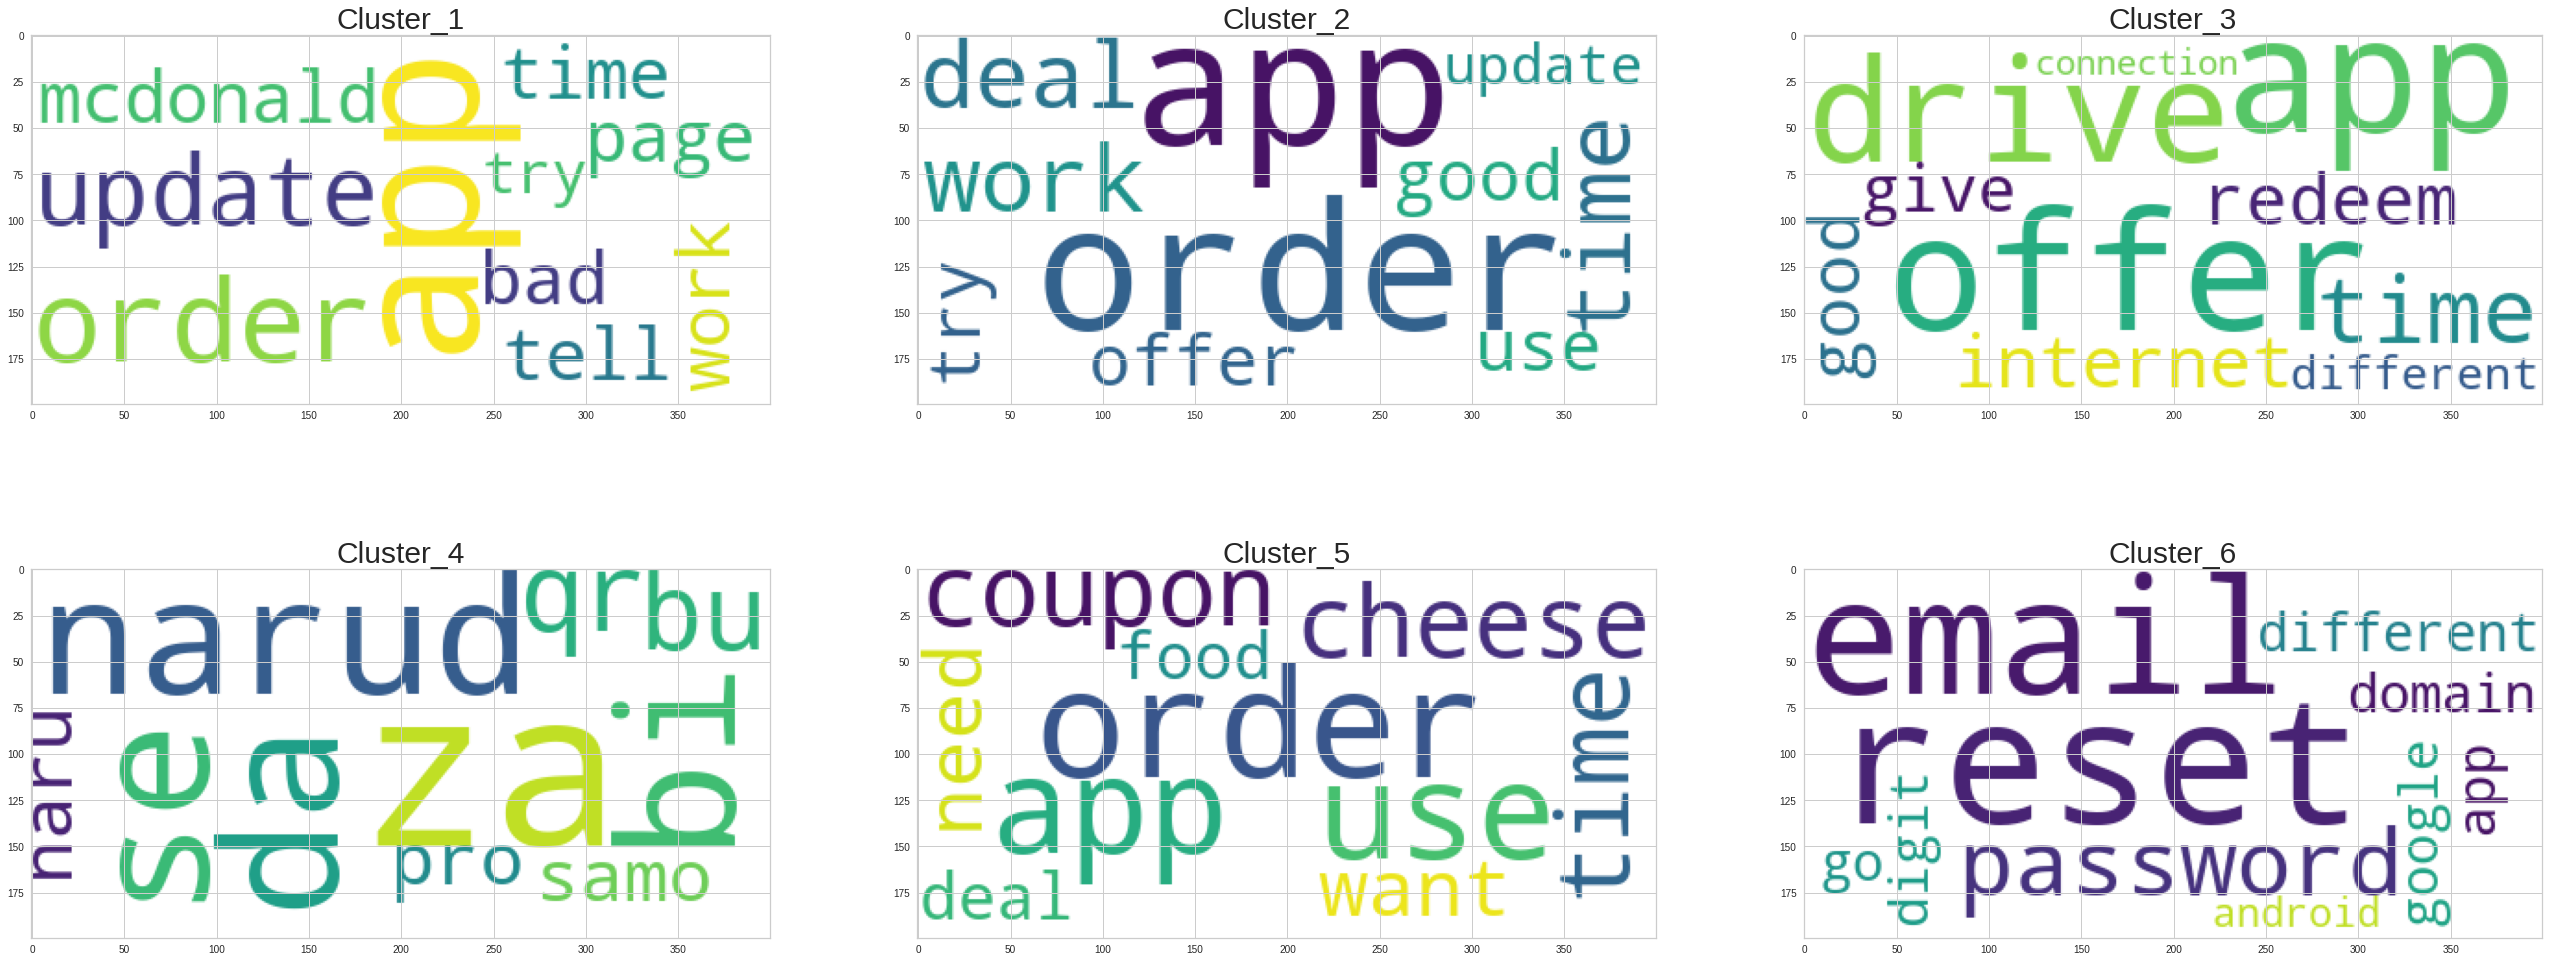

In [ ]:

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(45,18))
# cluster-1
ax[0,0].imshow(AGC_Wordcloud_list_1[0])
ax[0,0].set_title('Cluster_1',fontsize=30)
# cluster-2
ax[0,1].imshow(AGC_Wordcloud_list_1[1])
ax[0,1].set_title('Cluster_2',fontsize=30)
# cluster-3
ax[0,2].imshow(AGC_Wordcloud_list_1[2])
ax[0,2].set_title('Cluster_3',fontsize=30)
#
ax[1,0].imshow(AGC_Wordcloud_list_1[3])
ax[1,0].set_title('Cluster_4',fontsize=30)
#
ax[1,1].imshow(AGC_Wordcloud_list_1[4])
ax[1,1].set_title('Cluster_5',fontsize=30)
#
ax[1,2].imshow(AGC_Wordcloud_list_1[5])
ax[1,2].set_title('Cluster_6',fontsize=30)

plt.subplots_adjust(hspace=0.2)

**- Visualization of Clusters**

In [ ]:
## Visualization of clusters:

In [ ]:
sklearn_pca = PCA(n_components=2 )
bow_array = sklearn_pca.fit_transform(bow.toarray())
print(bow_array.shape)
bow_array

(950, 2)


array([[ 6.97452593e-01, -6.33308814e-01],
       [ 2.89045716e+00, -1.15200089e+00],
       [ 1.75847778e+00, -1.16661229e+00],
       ...,
       [-1.13585944e+00,  1.45049940e-03],
       [-1.14462737e+00, -5.69036121e-02],
       [-1.19603953e+00, -8.77856141e-02]])

In [ ]:
 ## Modelling with optimal Parameters:
model_AggC_BOW2 =  AgglomerativeClustering(n_clusters=6, 
                                          affinity='euclidean', 
                                          linkage= 'complete')
    

AGC_BOW_fit = model_AggC_BOW2.fit(bow_array)
AGC_BOW_Pred = model_AggC_BOW2.fit_predict(bow_array)
AGC_BOW_Pred.shape

(950,)

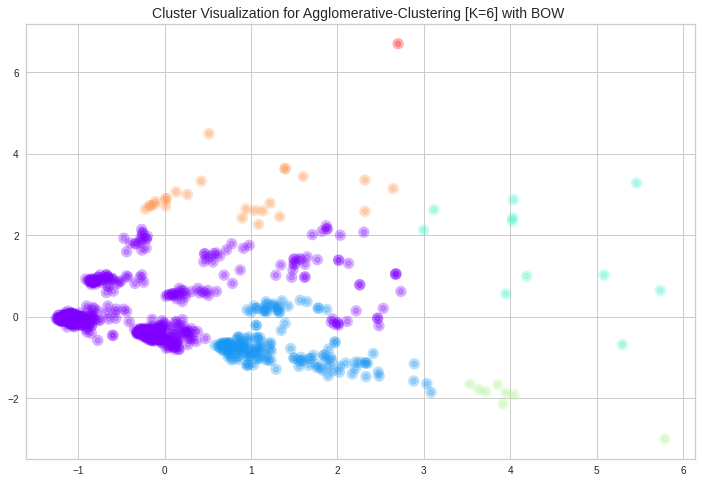

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for Agglomerative-Clustering [K=6] with BOW ", fontsize=14)
plt.scatter(bow_array[:, 0], bow_array[:, 1], c=AGC_BOW_Pred, s= 40,alpha=0.3, cmap='rainbow',linewidths=5)
#centers_ = AGC_BOW_fit.cluster_centers_
#plt.scatter(centers_[:,0],centers_[:,1],c='black',s=200,alpha=0.6)

**Print Reviews in each Cluster:**




In [ ]:
## Print Reviews in each Cluster:

In [ ]:
for i in range(6):
    print("Review Content from Cluster ", i, end='\n')
    print('-'*70)
    print(cluster_DF.iloc[cluster_DF.groupby(['AgcBOWClusters']).groups[i][0]]['content'])
    print()
    print('-'*70)

Review Content from Cluster  0
----------------------------------------------------------------------
One of the worst apps I have used. The interface is really bad. You cannot find what you want. All buttons are banners with ads. There are no specific menu items for Delivery, Menu, Points Barcode, etc.. Also, most of the pages in the app are web pages and not native app pages. Just go back to the old app and add the points and barcode to that.

----------------------------------------------------------------------
Review Content from Cluster  1
----------------------------------------------------------------------
Constant problems. One time it says I have to install it from Google Play, but it was installed from here only... Other time it doesn't even open, or says I have to use the latest version, even though there is no update for it. It gives me a notification of a new coupon, but it won't even open the app itself. Tried it on several phones, across years, it was always problemati

In [ ]:
cluster_DF.columns

Index(['content', 'CleanContent', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'ReviewDate', 'sortOrder',
       'KMeansBOWClusters', 'KMeansTFIDFClusters', 'KMeansW2VecClusters',
       'AgcBOWClusters'],
      dtype='object')

### TFIDF [Term Frequency Inverse Document Frequency] :


**- Text Vectorization**




In [ ]:
## Vectorization with TFIDF:
tfidf_vectors = TfidfVectorizer()
tfidf = tfidf_vectors.fit_transform(cleaned_content.values)
tfidf

<950x2628 sparse matrix of type '<class 'numpy.float64'>'
	with 12630 stored elements in Compressed Sparse Row format>

In [ ]:
### 
TFIDF_terms = tfidf_vectors.get_feature_names()
print(TFIDF_terms[1:10])
print(TFIDF_terms[100:110])

['aap', 'abbreviation', 'abia', 'ability', 'abit', 'able', 'absolute', 'absolutely', 'abt']
['annoyance', 'annoying', 'answer', 'anymore', 'anyplace', 'anytime', 'aop', 'apa', 'apart', 'ape']


**- Hyperparameter Tuning & Training:**

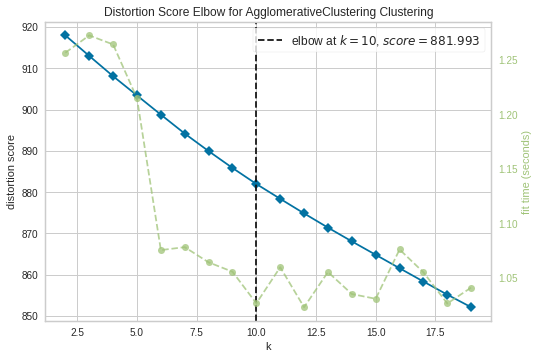

In [ ]:
# 
TFIDF_visualizer_agc = kelbow_visualizer(AgglomerativeClustering(),tfidf.toarray(), k = (2,20)) 
TFIDF_visualizer_agc.show()

In [ ]:
get_best_params_aGC(points=tfidf.toarray(),labels=content_score, k=10)

(['euclidean', 'average'], 0.014104996010992705, 0.017347583345360938)

In [ ]:
 ## Modelling with optimal Parameters:
model_AggC_tfidf =  AgglomerativeClustering(n_clusters=10, 
                                          affinity='euclidean', 
                                          linkage= 'complete')
    
model_AggC_tfidf.fit(tfidf.toarray())

AgglomerativeClustering(linkage='complete', n_clusters=10)

In [ ]:
AggC_tfidf_labels = model_AggC_tfidf.labels_
len(AggC_tfidf_labels)

950

In [ ]:
## Assign Cluster label to clusters:
cluster_DF['AgcTFIDFClusters'] = AggC_tfidf_labels
cluster_DF.sample(5)

content  \
539  After a long time, i decided to grab a McDonal...   
646                Store locator doesn't seem to work.   
203  The security check is more paranoid than what ...   
490  The main issue for me while using MCD App (MY)...   
37   In the last two weeks, I sent messages explain...   

                                          CleanContent  score  thumbsUpCount  \
539  long time decide grab mcdonald deal update app...      3              0   
646                                 store locator work      3              0   
203  security check paranoid bank set update know c...      2              4   
490  main issue mcd app promotion actually availabl...      3             72   
37   week send message explain point withdraw accou...      1              4   

    reviewCreatedVersion                   at  ReviewDate      sortOrder  \
539                  NaN  2019-11-30 11:12:58  2019-11-30  most_relevant   
646               2.35.0  2022-01-28 16:39:42  2022-01-28         newest   
203               2.34.1  2022-01-26 17:02:36  2022-01-26  most_relevant   
490               2.23.1  2021-07-03 07:03:37  2021-07-03  most_relevant   
37                2.41.0  2022-05-25 09:40:00  2022-05-25  most_relevant   

     KMeansBOWClusters  KMeansTFIDFClusters  KMeansW2VecClusters  \
539                  3                    4                    0   
646                  2                    3                    3   
203                  2                    4                    2   
490                  4                    5                    2   
37                   4                    5                    2   

     AgcBOWClusters  AgcTFIDFClusters  
539               1                 6  
646               1                 2  
203               1                 2  
490               1                 6  
37                1                 2

**- Get Top Words:**

In [ ]:
AggCWordList_DF2 = pd.DataFrame(tfidf.toarray(), columns = TFIDF_terms)
AggCWordList_DF2['AgcTFIDFClusters'] = AggC_tfidf_labels
wordfreq = AggCWordList_DF2.groupby('AgcTFIDFClusters').sum()
wordfreq  

aa       aap  abbreviation      abia   ability  \
AgcTFIDFClusters                                                       
0                 0.0000  0.000000      0.288307  0.181866  0.000000   
1                 0.0000  0.000000      0.000000  0.000000  0.239184   
2                 0.5547  2.024444      0.000000  0.000000  0.000000   
3                 0.0000  0.000000      0.000000  0.000000  0.000000   
4                 0.0000  0.000000      0.000000  0.000000  0.000000   
5                 0.0000  0.000000      0.000000  0.000000  0.000000   
6                 0.0000  0.000000      0.000000  0.000000  0.000000   
7                 0.0000  0.000000      0.000000  0.000000  0.000000   
8                 0.0000  0.000000      0.000000  0.000000  0.000000   
9                 0.0000  0.000000      0.000000  0.000000  0.000000   

                      abit      able  absolute  absolutely       abt  ...  \
AgcTFIDFClusters                                                      ...   
0                 0.000000  2.268646  0.000000    0.513800  0.200432  ...   
1                 0.000000  0.000000  0.000000    0.000000  0.000000  ...   
2                 0.276933  2.939154  0.415244    0.413819  0.000000  ...   
3                 0.000000  0.000000  0.000000    0.000000  0.000000  ...   
4                 0.000000  0.245610  0.000000    0.000000  0.000000  ...   
5                 0.000000  0.000000  0.000000    0.000000  0.000000  ...   
6                 0.000000  0.445789  0.000000    0.000000  0.000000  ...   
7                 0.000000  0.000000  0.000000    0.000000  0.000000  ...   
8                 0.000000  0.246878  0.000000    0.164100  0.000000  ...   
9                 0.000000  0.204520  0.000000    0.414640  0.000000  ...   

                        za       zam      zero        zi  ziemlich  zmieniaj  \
AgcTFIDFClusters                                                               
0                 0.000000  0.000000  0.000000  0.136467  0.000000  0.000000   
1                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2                 0.615227  0.000000  0.407597  0.000000  0.000000  0.000000   
3                 0.280674  0.204075  0.000000  0.000000  0.000000  0.420682   
4                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9                 0.000000  0.000000  0.000000  0.000000  0.131515  0.000000   

                    znmvp    zomato     zosta        zu  
AgcTFIDFClusters                                         
0                 0.00000  0.000000  0.000000  0.000000  
1                 0.00000  0.000000  0.000000  0.000000  
2                 0.00000  0.000000  0.000000  0.000000  
3                 0.00000  0.000000  0.204075  0.204075  
4                 0.00000  0.000000  0.000000  0.000000  
5                 0.00000  0.000000  0.000000  0.000000  
6                 0.00000  0.368247  0.000000  0.000000  
7                 0.00000  0.000000  0.000000  0.000000  
8                 0.00000  0.000000  0.000000  0.000000  
9                 0.31111  0.000000  0.000000  0.000000  

[10 rows x 2628 columns]

In [ ]:
## get top words in each cluster:
K_clusters = 10
AGC_topwords_tfidf = []
for i in range(K_clusters):
    agc_terms_tf =list(wordfreq.loc[i,:].sort_values(ascending=False).head(10).index)
    AGC_topwords_tfidf.append(agc_terms_tf)


print(len(AGC_topwords_tfidf))

10


In [ ]:
AGC_topwords_tfidf[3]

['password',
 'sign',
 'reset',
 'email',
 'one',
 'send',
 'app',
 'order',
 'hy',
 'gmail']

In [ ]:
K_clusters = 10
AGC_Wordcloud_list_tf = []
for i in range(K_clusters): 
    AGC_unique_string_tf = (" ").join(AGC_topwords_tfidf[i])
    AGC_wordcloud_tf = WordCloud(collocations=False,background_color='white').generate(AGC_unique_string_tf)
    AGC_Wordcloud_list_tf.append(AGC_wordcloud_tf)


print(len(AGC_Wordcloud_list_tf))

10


Agglomerative Clustering - TFIDF- Topwords


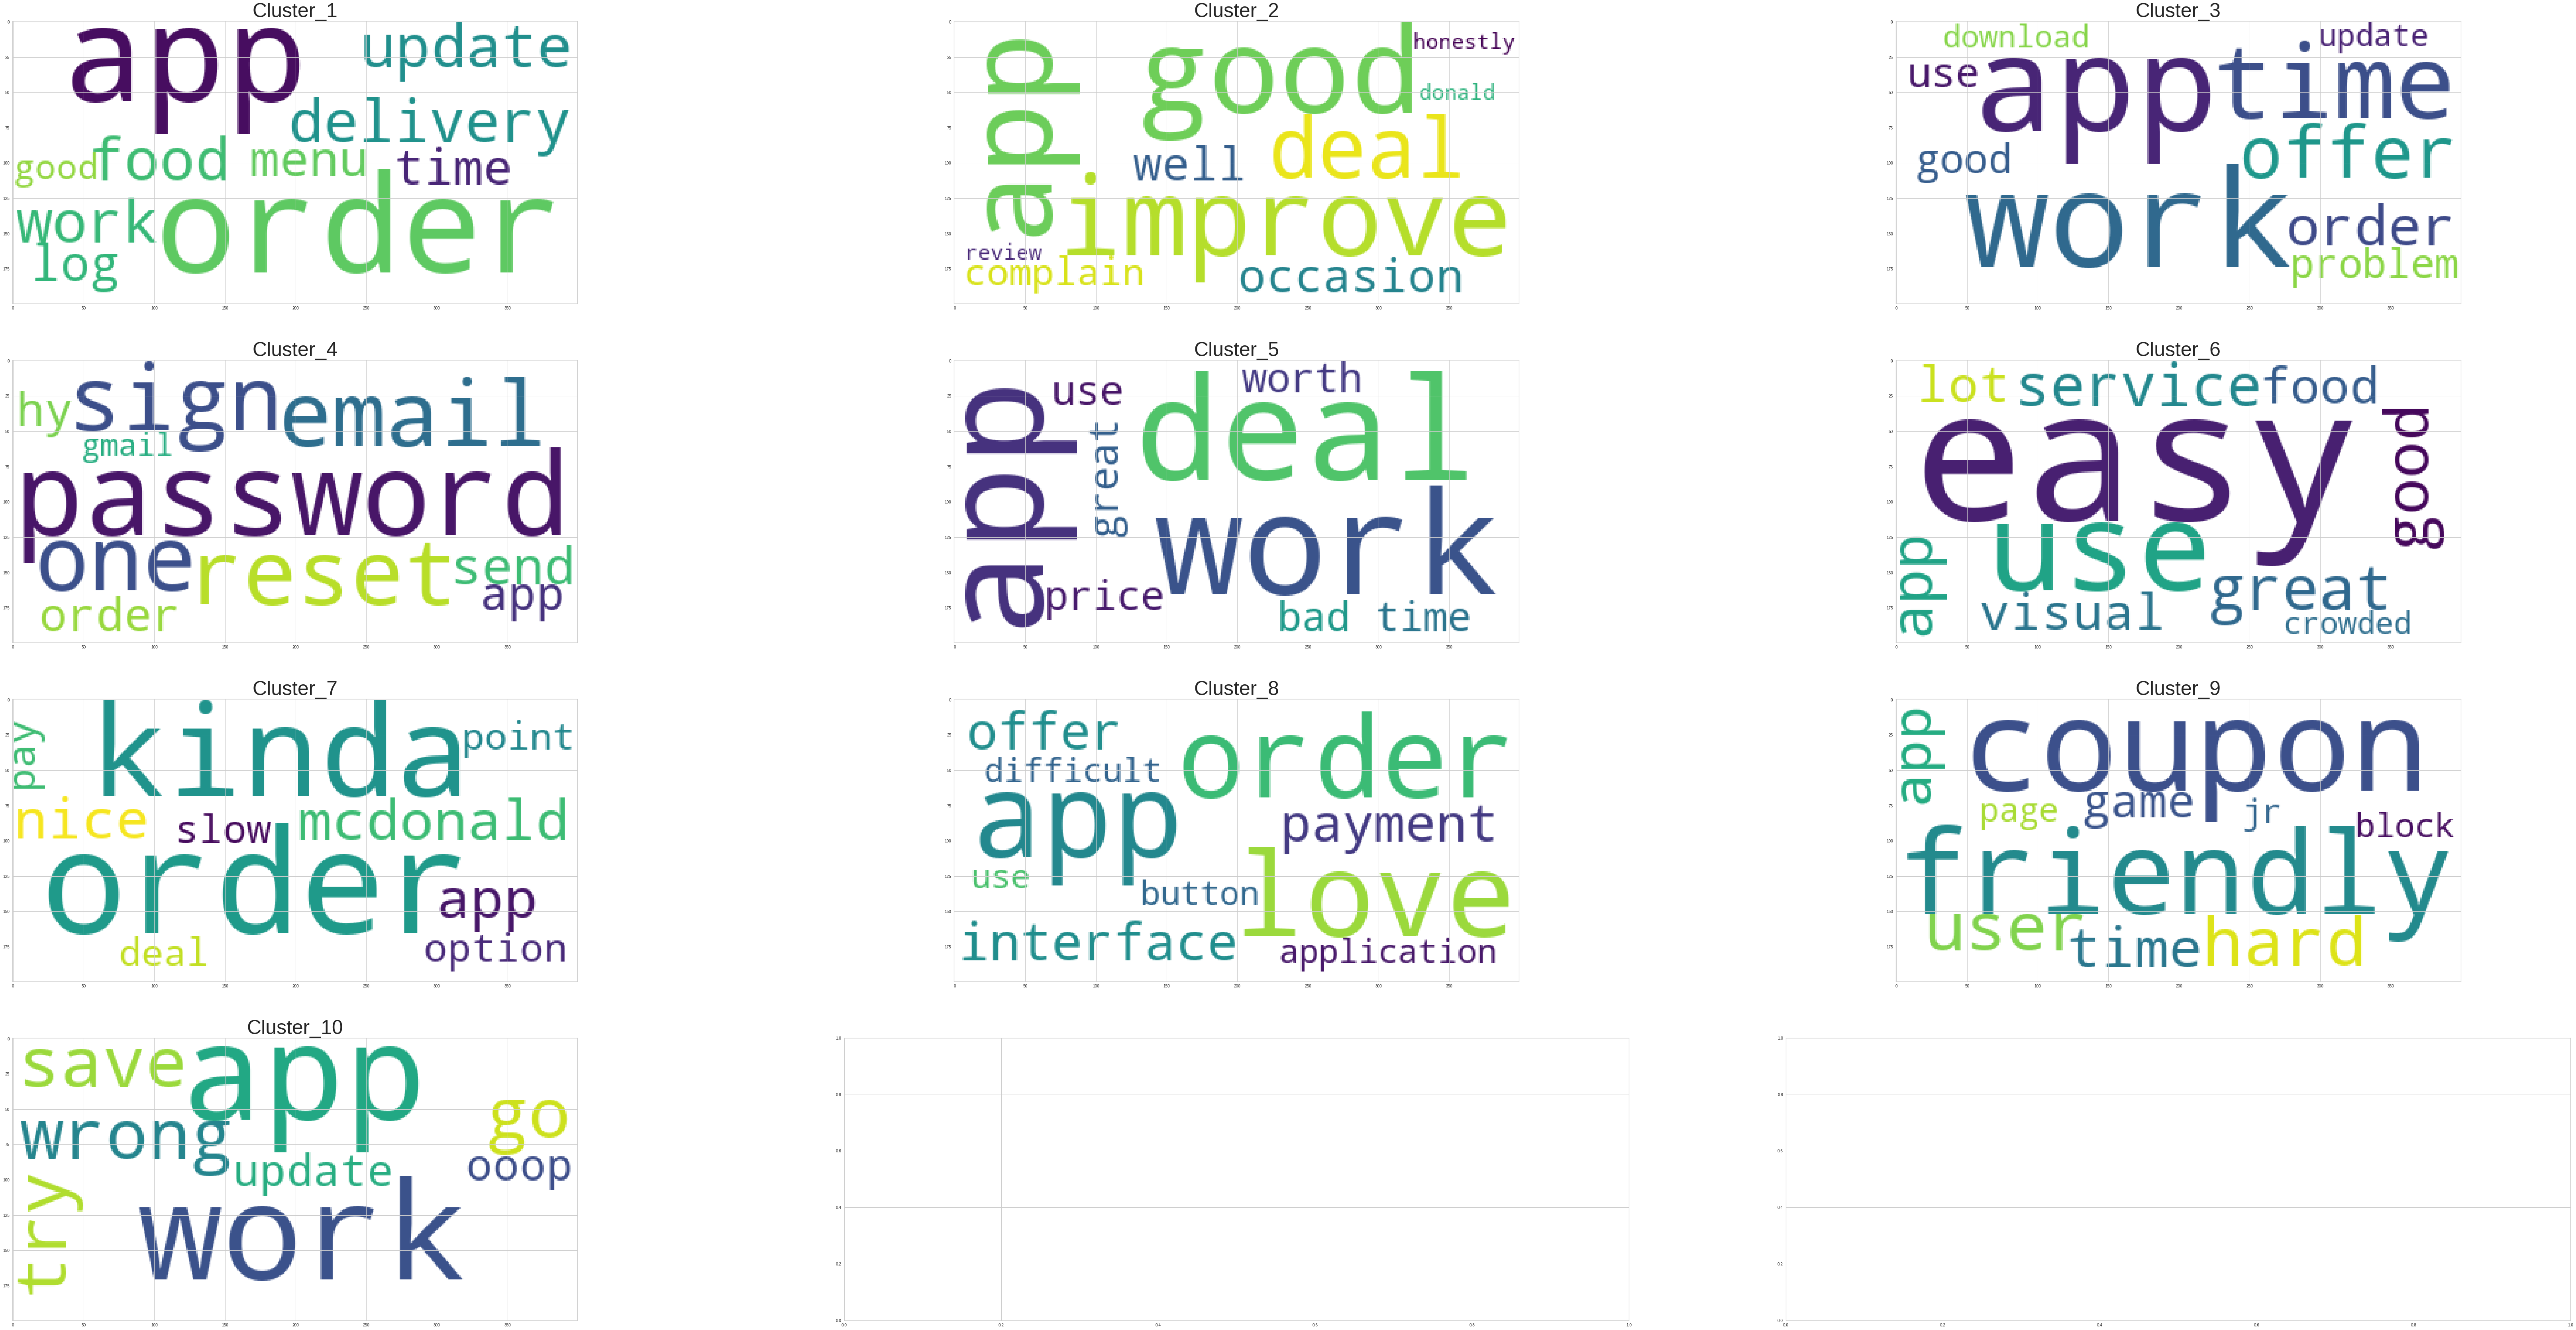

In [ ]:
print("Agglomerative Clustering - TFIDF- Topwords")
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(120,60))
# cluster-1
ax[0,0].imshow(AGC_Wordcloud_list_tf[0])
ax[0,0].set_title('Cluster_1',fontsize=50)
# cluster-2
ax[0,1].imshow(AGC_Wordcloud_list_tf[1])
ax[0,1].set_title('Cluster_2',fontsize=50)
# cluster-3
ax[0,2].imshow(AGC_Wordcloud_list_tf[2])
ax[0,2].set_title('Cluster_3',fontsize=50)
#
ax[1,0].imshow(AGC_Wordcloud_list_tf[3])
ax[1,0].set_title('Cluster_4',fontsize=50)
#
ax[1,1].imshow(AGC_Wordcloud_list_tf[4])
ax[1,1].set_title('Cluster_5',fontsize=50)
#
ax[1,2].imshow(AGC_Wordcloud_list_tf[5])
ax[1,2].set_title('Cluster_6',fontsize=50)
#
ax[2,0].imshow(AGC_Wordcloud_list_tf[6])
ax[2,0].set_title('Cluster_7',fontsize=50)
#
ax[2,1].imshow(AGC_Wordcloud_list_tf[7])
ax[2,1].set_title('Cluster_8',fontsize=50)
#
ax[2,2].imshow(AGC_Wordcloud_list_tf[8])
ax[2,2].set_title('Cluster_9',fontsize=50)
#
ax[3,0].imshow(AGC_Wordcloud_list_tf[9])
ax[3,0].set_title('Cluster_10',fontsize=50)
plt.subplots_adjust(hspace=0.2)


**- Visualization of Clusters**

In [ ]:
sklearn_pca = PCA(n_components=2 )
tfidf_array = sklearn_pca.fit_transform(tfidf.toarray())
print(tfidf_array.shape)
tfidf_array

(950, 2)


array([[ 0.23539221, -0.05288499],
       [ 0.01139953, -0.02871287],
       [ 0.08495368, -0.00855762],
       ...,
       [-0.08169018, -0.02292812],
       [-0.01954647, -0.01516569],
       [-0.13031494,  0.12828387]])

In [ ]:
model_AggC_tfidf =  AgglomerativeClustering(n_clusters=10, 
                                          affinity='euclidean', 
                                          linkage= 'complete')

AGC_TFIDF_fit = model_AggC_tfidf.fit(tfidf_array)
AGC_TFIDF_pred = model_AggC_tfidf.fit_predict(tfidf_array)
AGC_TFIDF_pred.shape

(950,)

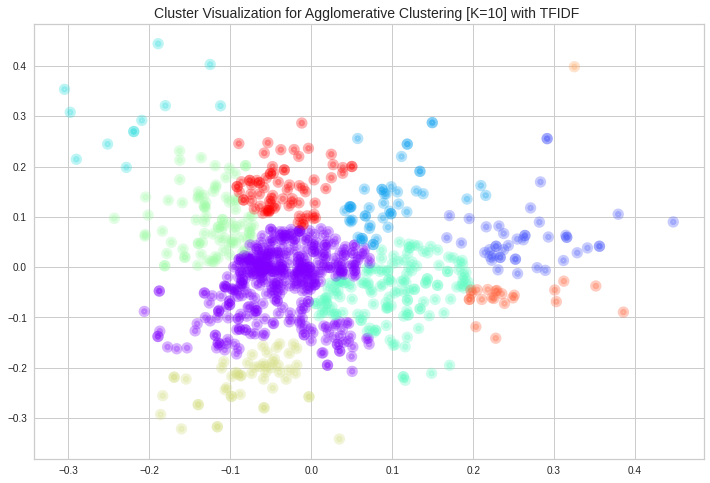

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for Agglomerative Clustering [K=10] with TFIDF ", fontsize=14)
plt.scatter(tfidf_array[:, 0], tfidf_array[:, 1], c=AGC_TFIDF_pred, s= 40,alpha=0.3, cmap='rainbow',linewidths=5)
#centers_TF = KM_TFIDF_fit.cluster_centers_
#plt.scatter(centers_TF[:,0],centers_TF[:,1],c='black',s=200,alpha=0.6)

**Print Reviews in each Cluster:**

In [ ]:

for i in range(10):
    print("Review Content from Cluster ", i, end='\n')
    print('-'*70)
    REVIEW_content = cluster_DF.iloc[cluster_DF.groupby(['AgcTFIDFClusters']).groups[i][1]]['content']
    print(REVIEW_content)
    print()
    print('-'*70)

Review Content from Cluster  0
----------------------------------------------------------------------
Update after a year or two: App is still not only bad, it has gotten worse. The discounts are pointless since you have to eat a ton to get enough points. But not only that, the process is a huge hassle at the self service so most often you will forget to even collect the points. Of course the root+safetynet is there too. Super disappointed.

----------------------------------------------------------------------
Review Content from Cluster  1
----------------------------------------------------------------------
Instead spent more hiring staff, better upgrading you stupid app and lousy 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😁😁😁😁😁😁😁😁😁😁😁😁😁

----------------------------------------------------------------------
Review Content from Cluster  2
----------------------------------------------------------------------
Haven't seen a worst system stability in an app before. Haven't been able to get past the loading scr

In [ ]:
cluster_DF.columns

Index(['content', 'CleanContent', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'ReviewDate', 'sortOrder',
       'KMeansBOWClusters', 'KMeansTFIDFClusters', 'KMeansW2VecClusters',
       'AgcBOWClusters', 'AgcTFIDFClusters'],
      dtype='object')

### Word2Vec [Word to Vector]

**Text Vectorization**

In [ ]:
i = 0
list_of_sent=[]
for sent in cleaned_content.values:
    list_of_sent.append(sent.split())

print(len(cleaned_content))    

950


In [ ]:
i=0
list_of_sent_train=[]
for sent in cleaned_content.values:
    filtered_sentence=[]
    sent=remove_html_tags(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

print(len(list_of_sent_train))

950


In [ ]:

     # Training the wor2vec model using content dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=2628, workers=4)
w2v_model

In [ ]:
w2vec = []; 
for sent in list_of_sent_train: 
    sent_vec = np.zeros(2628)
    cnt_words =0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    w2vec.append(sent_vec)
w2vec = np.array(w2vec)
w2vec = np.nan_to_num(w2vec)
w2vec.shape

(950, 2628)

In [ ]:
w2vec

array([[-0.02506724,  0.02604739, -0.00506734, ...,  0.03300729,
         0.022316  ,  0.00353536],
       [-0.02627723,  0.02737681, -0.00529143, ...,  0.03466693,
         0.02336898,  0.00370763],
       [-0.0234944 ,  0.02436443, -0.0047232 , ...,  0.03087421,
         0.02087394,  0.00330666],
       ...,
       [-0.01697172,  0.0176369 , -0.00341464, ...,  0.0223844 ,
         0.01514016,  0.00237791],
       [-0.01652487,  0.01728395, -0.00339927, ...,  0.02177956,
         0.0146614 ,  0.00232204],
       [-0.01933034,  0.02005463, -0.00396795, ...,  0.02512993,
         0.01693425,  0.00263915]])

In [ ]:
#w2v_model.get_feature_names()

**- Hyper-Parameter Tuning & Training**

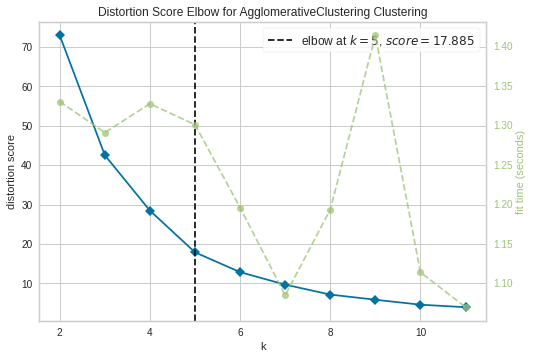

In [ ]:
# 
visualizer_w2vec_agc = kelbow_visualizer(AgglomerativeClustering(),w2vec, k = (2,12)) 
visualizer_w2vec_agc.show()

In [ ]:
get_best_params_aGC(points= w2vec,labels =content_score,k=5)

(['euclidean', 'complete'], 0.4740433635691797, 0.011849122091789167)

In [ ]:
## Modelling with optimal Parameters:
model_AggC_W2V =  AgglomerativeClustering(n_clusters=5, 
                                          affinity='euclidean', 
                                          linkage= 'complete')
    
model_AggC_W2V.fit(w2vec)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [ ]:
AggC_w2v_labels = model_AggC_W2V.labels_
print(max(AggC_w2v_labels))
len(AggC_w2v_labels)

4


950

In [ ]:
## Assign Cluster label to clusters:
cluster_DF['AgcW2VClusters'] = AggC_w2v_labels
cluster_DF.sample(5)

content  \
115  Scam users with promotion yet counter says sys...   
252           Restaurant filter does not seem to work.   
39   I hope you indicate the total cost of the paym...   
152                        Cannot use on Huawei phone!   
902  App usability: The app was a bit sluggish in d...   

                                          CleanContent  score  thumbsUpCount  \
115  scam user promotion counter say system get pro...      1              0   
252                             restaurant filter work      2              0   
39   hope indicate total cost payment app instead d...      1             19   
152                                   use huawei phone      1              0   
902  app usability app bit sluggish download datum ...      5            340   

    reviewCreatedVersion                   at  ReviewDate      sortOrder  \
115               2.42.0  2022-06-03 16:51:43  2022-06-03         newest   
252               2.38.1  2022-04-14 20:20:04  2022-04-14  most_relevant   
39                2.38.1  2022-04-25 03:24:53  2022-04-25  most_relevant   
152                2.4.4  2022-06-01 04:49:25  2022-06-01         newest   
902                2.5.4  2020-05-19 22:52:09  2020-05-19  most_relevant   

     KMeansBOWClusters  KMeansTFIDFClusters  KMeansW2VecClusters  \
115                  5                    1                    1   
252                  2                    3                    2   
39                   3                    7                    2   
152                  5                    3                    2   
902                  4                    7                    2   

     AgcBOWClusters  AgcTFIDFClusters  AgcW2VClusters  
115               1                 2               1  
252               1                 7               1  
39                1                 2               1  
152               1                 2               1  
902               1                 2               1

In [ ]:
cluster_DF['AgcW2VClusters'].max()

4

**- Get Clusters and Topwords**

In [ ]:
## Modelling with optimal Parameters:
model_AggC_W2V2 =  AgglomerativeClustering(n_clusters=5, 
                                          affinity='euclidean', 
                                          linkage= 'complete')
    
model_AggC_W2V2.fit(w2vec)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [ ]:
w2vec.shape

(950, 2628)

In [ ]:
AggCWordList_DF3 = pd.DataFrame(w2vec,columns = terms)
AggCWordList_DF3['AgcW2VClusters'] = AggC_w2v_labels
wordfreq_3 = AggCWordList_DF3.groupby('AgcW2VClusters').sum()
wordfreq_3  

aa        aap  abbreviation      abia    ability  \
AgcW2VClusters                                                            
0               -0.174308   0.181105     -0.035245  0.009793   0.414953   
1               -9.164002   9.532794     -1.849746  0.502177  21.788806   
2               -2.164150   2.247698     -0.436643  0.119597   5.146487   
3               -0.156176   0.162037     -0.031972  0.008948   0.371082   
4              -10.048718  10.447506     -2.027808  0.554200  23.899170   

                    abit       able  absolute  absolutely       abt  ...  \
AgcW2VClusters                                                       ...   
0               0.096628  -0.228037  0.015581   -0.238423 -0.006454  ...   
1               5.084514 -11.961702  0.799667  -12.542577 -0.347341  ...   
2               1.201273  -2.827337  0.190348   -2.959071 -0.080141  ...   
3               0.087292  -0.205043  0.013947   -0.213857 -0.006335  ...   
4               5.574255 -13.124660  0.881713  -13.748883 -0.376630  ...   

                      za       zam       zero         zi   ziemlich  \
AgcW2VClusters                                                        
0               0.044714 -0.172310   0.266752   0.182106   0.281634   
1               2.359876 -9.046622  14.002202   9.571478  14.792022   
2               0.555458 -2.137744   3.307983   2.258781   3.494019   
3               0.040865 -0.153843   0.238472   0.162958   0.251760   
4               2.583049 -9.924575  15.360140  10.494277  16.225588   

                 zmieniaj      znmvp     zomato     zosta        zu  
AgcW2VClusters                                                       
0                0.195212   0.245571   0.230000  0.154968  0.024803  
1               10.255707  12.898688  12.073974  8.165218  1.290810  
2                2.421768   3.047552   2.851547  1.925125  0.307111  
3                0.174966   0.219100   0.204720  0.139635  0.022218  
4               11.245261  14.152019  13.241115  8.945558  1.418237  

[5 rows x 2628 columns]

In [ ]:
wordfreq_3.loc[0,:].sort_values(ascending=False).head(10) #.index

till       0.706604
seg        0.677547
ng         0.674140
synergy    0.648950
broken     0.632471
balance    0.583985
rush       0.576106
will       0.560399
story      0.559149
sunt       0.558604
Name: 0, dtype: float64

In [ ]:
wordfreq_3.loc[4,:].sort_values(ascending=False).head(10) #.index

till       40.715035
seg        39.038013
ng         38.840559
synergy    37.398579
broken     36.457197
balance    33.655908
rush       33.209058
will       32.289409
story      32.218024
sunt       32.181223
Name: 4, dtype: float64

In [ ]:
## get top words in each cluster:
K_clusters = 5
AGC_topword_w2v = []
for i in range(K_clusters):
    agc_terms_w2v =list(wordfreq_3.loc[i,:].sort_values(ascending=False).head(10).index)
    AGC_topword_w2v.append(agc_terms_w2v)


print(len(AGC_topword_w2v))

5


In [ ]:
K_clusters = 5
AGC_Wordcloud_list_w2v = []
for i in range(K_clusters): 
    AGC_unique_string_w2v = (" ").join(AGC_topword_w2v[i])
    AGC_wordcloud_w2v = WordCloud(collocations=False,background_color='white').generate(AGC_unique_string_w2v)
    AGC_Wordcloud_list_w2v.append(AGC_wordcloud_w2v)


print(len(AGC_Wordcloud_list_w2v))

5


Agglomerative Clustering 'Word-2-Vectors' Top Words


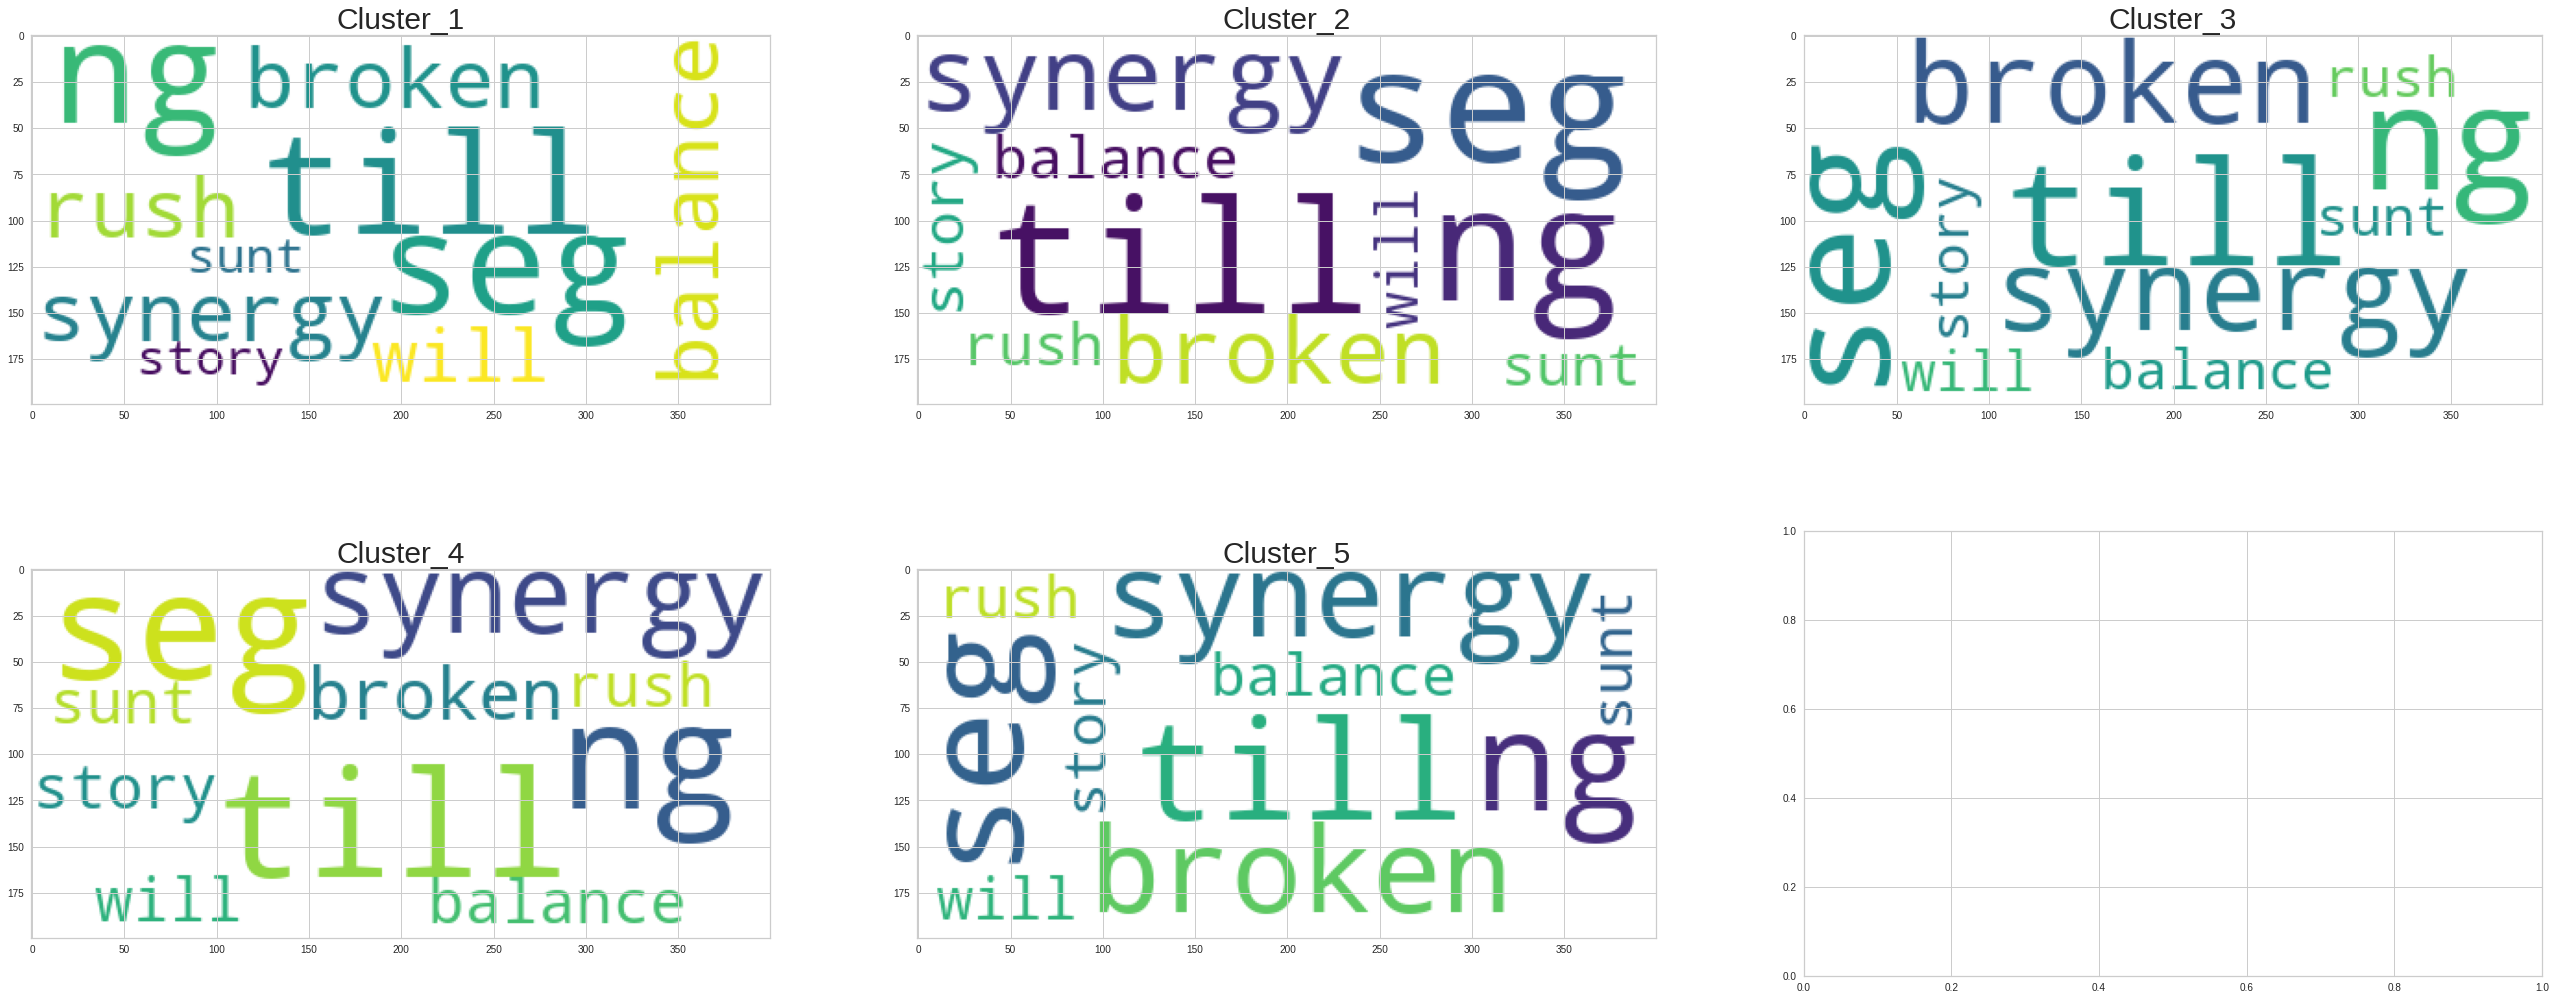

In [ ]:
print("Agglomerative Clustering 'Word-2-Vectors' Top Words")
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(45,18))
# cluster-1
ax[0,0].imshow(AGC_Wordcloud_list_w2v[0])
ax[0,0].set_title('Cluster_1',fontsize=30)
# cluster-2
ax[0,1].imshow(AGC_Wordcloud_list_w2v[1])
ax[0,1].set_title('Cluster_2',fontsize=30)
# cluster-3
ax[0,2].imshow(AGC_Wordcloud_list_w2v[2])
ax[0,2].set_title('Cluster_3',fontsize=30)
#
ax[1,0].imshow(AGC_Wordcloud_list_w2v[3])
ax[1,0].set_title('Cluster_4',fontsize=30)
#
ax[1,1].imshow(AGC_Wordcloud_list_w2v[4])
ax[1,1].set_title('Cluster_5',fontsize=30)


plt.subplots_adjust(hspace=0.2)

**- Cluster Visualization**

In [ ]:
sklearn_pca = PCA(n_components=2 )
W2V_array = sklearn_pca.fit_transform(w2vec)
print(W2V_array.shape)
W2V_array

(950, 2)


array([[ 1.25667871e-01, -2.02102210e-04],
       [ 1.94155738e-01,  2.91521293e-05],
       [ 3.38645824e-02,  8.60468554e-05],
       ...,
       [-3.32879627e-01, -2.90018069e-04],
       [-3.57223093e-01, -2.38699500e-04],
       [-2.08367680e-01,  4.85467608e-03]])

In [ ]:

W2V_model_AGC3 = AgglomerativeClustering(n_clusters=5, 
                                          affinity='euclidean', 
                                          linkage= 'complete')

AGC_W2V_fit = W2V_model_AGC3.fit(W2V_array)
AGC_W2V_Pred = W2V_model_AGC3.fit_predict(W2V_array)
AGC_W2V_Pred.shape

(950,)

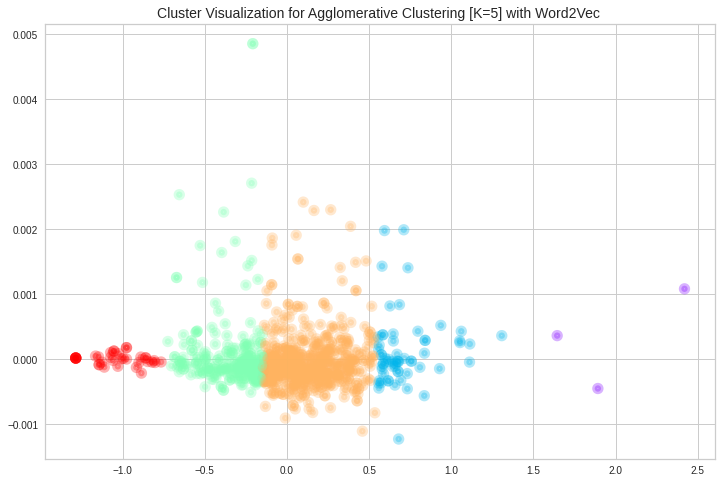

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for Agglomerative Clustering [K=5] with Word2Vec ", fontsize=14)
plt.scatter(W2V_array[:, 0], W2V_array[:, 1], c=AGC_W2V_Pred, s= 40,alpha=0.3, cmap='rainbow',linewidths=5)
# centers_w2v = KM_W2V_fit.cluster_centers_
# plt.scatter(centers_w2v[:,0],centers_w2v[:,1],c='black',s=200,alpha=0.6)

In [ ]:
for i in range(5):
    print("Review Content from Cluster ", i, end='\n')
    print('-'*70)
    print(cluster_DF.iloc[cluster_DF.groupby(['AgcW2VClusters']).groups[i][1]]['content'])
    print()
    print('-'*70)

Review Content from Cluster  0
----------------------------------------------------------------------
App multination at times

----------------------------------------------------------------------
Review Content from Cluster  1
----------------------------------------------------------------------
Worthless junk. Won't take a card to save in my profile. Won't even give me a message telling me what's wrong. Just loops back to the add new card screen over and over again each and every time I click on submit to save the card. I've been trying periodically for the past 2 or 3 YEARS! It still won't work. Save your precious storage and don't even bother with this useless app.

----------------------------------------------------------------------
Review Content from Cluster  2
----------------------------------------------------------------------
Horrendous app. For a few days, it's not been accepting any of the payment modes I've tried, saying there is something wrong each time without sp

In [ ]:
cluster_DF.columns

Index(['content', 'CleanContent', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'ReviewDate', 'sortOrder',
       'KMeansBOWClusters', 'KMeansTFIDFClusters', 'KMeansW2VecClusters',
       'AgcBOWClusters', 'AgcTFIDFClusters', 'AgcW2VClusters'],
      dtype='object')

## DSCAN 
- [Density Based Spatial Clustering with Application to Noise]

- No need for tuning K

### BOW [Bag of Word]:

**- Text Vectorization**

In [ ]:
###
count_vect = CountVectorizer()
bow = count_vect.fit_transform(cleaned_content.values)
bow

<950x2628 sparse matrix of type '<class 'numpy.int64'>'
	with 12630 stored elements in Compressed Sparse Row format>

In [ ]:
### 
terms = count_vect.get_feature_names()
print(terms[1:10])
print(terms[100:110])

['aap', 'abbreviation', 'abia', 'ability', 'abit', 'able', 'absolute', 'absolutely', 'abt']
['annoyance', 'annoying', 'answer', 'anymore', 'anyplace', 'anytime', 'aop', 'apa', 'apart', 'ape']


In [ ]:
len(terms)

2628

**- Hyperparameter Tuning & Training:**

In [ ]:
def get_best_params_DBSCAN(points, labels):
    eps_LIST = [0.1,0.3,0.5,1,3,5]
    sample_LIST = [3,5,7,10]
    best_ac = []
    s_ = 0       
    mi_ = 0  
    for a in eps_LIST:
        for b in sample_LIST: 
              db_scan = DBSCAN(eps = a, min_samples = b).fit(points) 
              db_pred = db_scan.fit_predict(points)
              if  len(set(db_scan.labels_)) > 1: 
                  score_sil = si(points, db_pred)
                  score_mi = mi(labels,db_pred)
                  if (s_< score_sil)&(mi_ < score_mi):
                     s_ = score_sil
                     mi_ = score_mi
                     best_ac = [a,b]
    return best_ac,s_,mi_

In [ ]:
get_best_params_DBSCAN(points=bow, labels=content_score)   

([3, 3], 0.025263993069306774, 0.02780346160875316)

In [ ]:
dbscan  = DBSCAN(eps =3, min_samples = 3).fit(bow) 
dbscan

DBSCAN(eps=3, min_samples=3)

In [ ]:
db_n_clusters = len(set(dbscan.labels_))
db_n_clusters

2

In [ ]:
db_BOW_labels = dbscan.labels_
len(db_BOW_labels)

950

In [ ]:

## Assign Cluster label to clusters:
cluster_DF['dscanBOWClusters'] = db_BOW_labels
cluster_DF.sample(5)

content  \
103            Food order take very long time to serve   
259  Already throws error app doesn't pass security...   
741  Installed the latest updated apps. So far no p...   
585  It's great and all but the reason why I gave i...   
637     Morate dodati da moze i iz Mostara u Stolac!!!   

                                          CleanContent  score  thumbsUpCount  \
103                         food order long time serve      1              0   
259                throw error app pass security check      2              0   
741  instal late update app far problem run smoothl...      4              0   
585       great reason give star want update take long      3              0   
637          morate dodati da moze iz mostara u stolac      3              0   

    reviewCreatedVersion                   at  ReviewDate      sortOrder  \
103               2.41.0  2022-06-04 14:59:17  2022-06-04         newest   
259               2.41.0  2022-05-15 17:09:26  2022-05-15  most_relevant   
741                  NaN  2022-05-24 11:10:17  2022-05-24  most_relevant   
585               2.37.0  2022-04-27 12:42:45  2022-04-27         newest   
637                  NaN  2022-02-15 22:32:20  2022-02-15         newest   

     KMeansBOWClusters  KMeansTFIDFClusters  KMeansW2VecClusters  \
103                  5                    5                    0   
259                  5                    4                    2   
741                  5                    4                    2   
585                  5                    6                    2   
637                  5                    1                    2   

     AgcBOWClusters  AgcTFIDFClusters  AgcW2VClusters  dscanBOWClusters  
103               1                 0               4                 0  
259               1                 2               4                 0  
741               1                 2               4                -1  
585               1                 0               1                 0  
637               1                 3               4                 0

**- Get Top Words:**

In [ ]:
ds_WordList_DF = pd.DataFrame(bow.toarray(), columns = terms)
ds_WordList_DF['dscanBOWClusters'] = db_BOW_labels
db_word_freq = ds_WordList_DF.groupby('dscanBOWClusters').sum()
db_word_freq  

aa  aap  abbreviation  abia  ability  abit  able  absolute  \
dscanBOWClusters                                                               
-1                 2    0             1     1        1     1    23         1   
 0                 0    4             0     0        0     0     5         0   

                  absolutely  abt  ...  za  zam  zero  zi  ziemlich  zmieniaj  \
dscanBOWClusters                   ...                                          
-1                         6    1  ...   6    1     0   1         1         0   
 0                         0    0  ...   0    0     1   0         0         1   

                  znmvp  zomato  zosta  zu  
dscanBOWClusters                            
-1                    1       1      1   1  
 0                    0       0      0   0  

[2 rows x 2628 columns]

In [ ]:
print(db_word_freq.loc[-1,:].sort_values(ascending=False).head(10) )#.index

app       724
order     348
time      176
work      158
deal      140
try       127
use       114
offer     113
update     95
good       92
Name: -1, dtype: int64


In [ ]:
print(db_word_freq.loc[0,:].sort_values(ascending=False).head(10) )#.index

app       167
good       65
work       56
use        47
offer      39
time       37
great      35
deal       31
order      29
update     24
Name: 0, dtype: int64


In [ ]:
dsc_terms_1 = ['app', 'order', 'time', 'work', 'deal','try', 'use', 'offer','update','good']
dsc_terms_2 = ['app','good','work','use', 'offer','time','great','deal','order','update']
dsc_topwords_bow = [dsc_terms_1,dsc_terms_2]
dsc_topwords_bow

[['app',
  'order',
  'time',
  'work',
  'deal',
  'try',
  'use',
  'offer',
  'update',
  'good'],
 ['app',
  'good',
  'work',
  'use',
  'offer',
  'time',
  'great',
  'deal',
  'order',
  'update']]

In [ ]:
dsc_Wordcloud_list_1 = []
for i in range(2): 
    dsc_unique_string_1 = (" ").join(dsc_topwords_bow[i])
    dsc_wordcloud_1 = WordCloud(collocations=False,background_color='white').generate(dsc_unique_string_1)
    dsc_Wordcloud_list_1.append(dsc_wordcloud_1)


print(len(dsc_Wordcloud_list_1))

2


In [ ]:
dsc_Wordcloud_list_1[1]

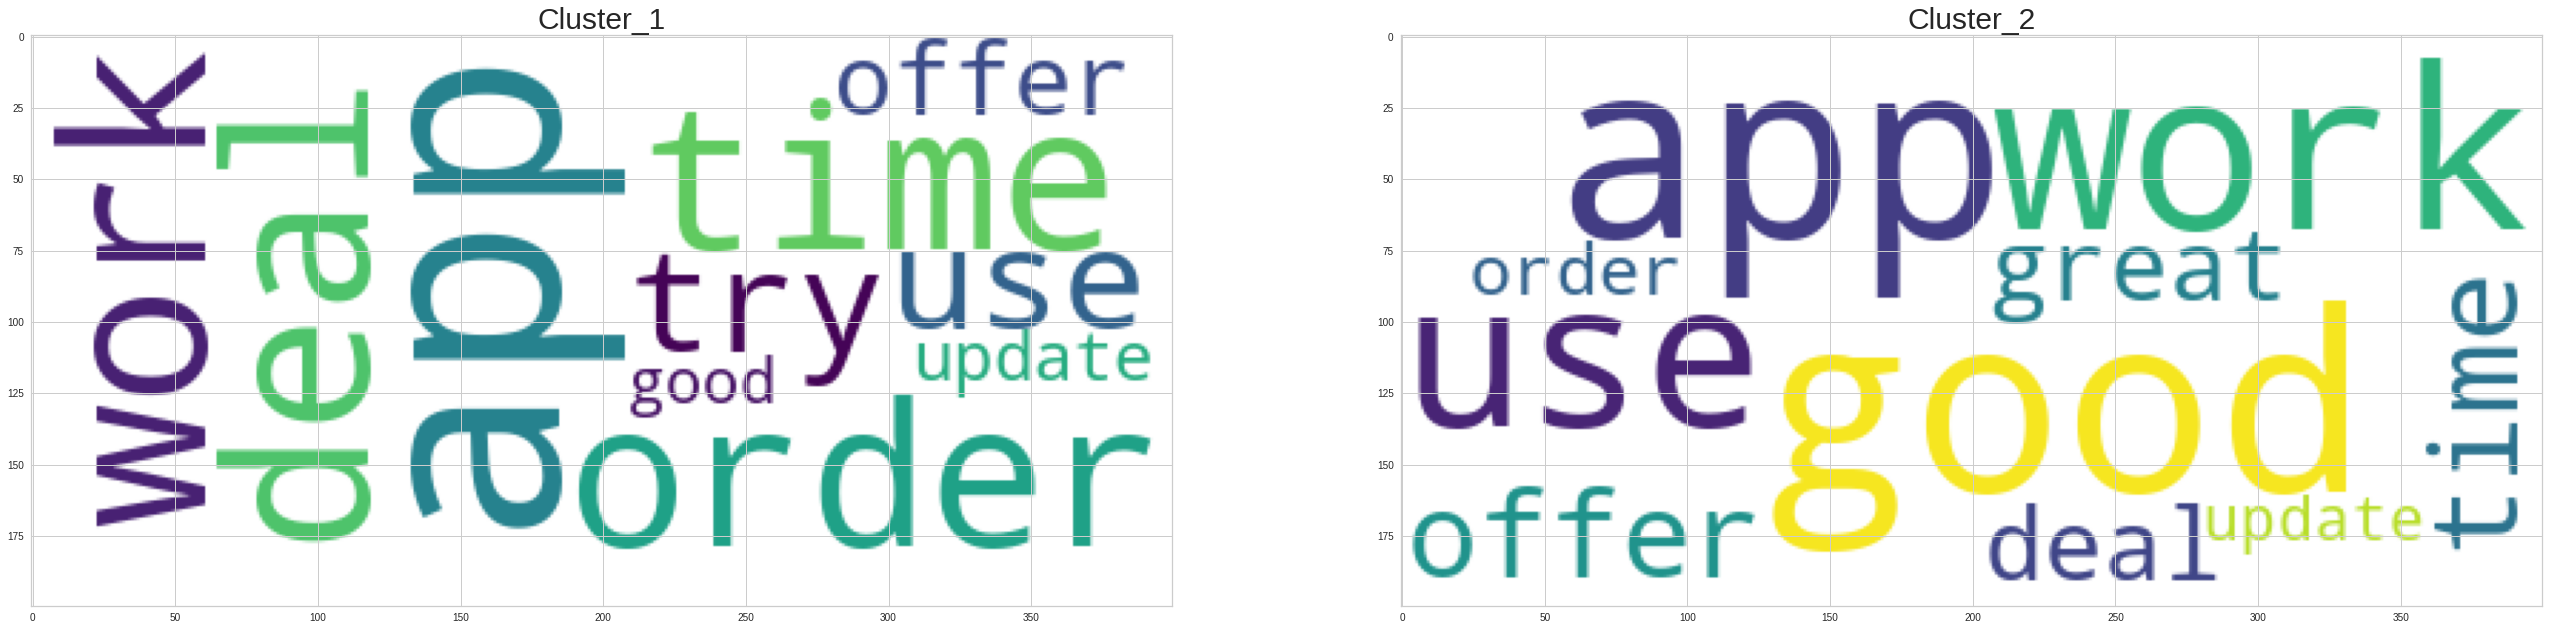

In [ ]:

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(45,18))
# cluster-1
ax[0].imshow(dsc_Wordcloud_list_1[0])
ax[0].set_title('Cluster_1',fontsize=30)
# cluster-2
ax[1].imshow(dsc_Wordcloud_list_1[1])
ax[1].set_title('Cluster_2',fontsize=30)

plt.subplots_adjust(hspace=0.2)

**- Visualization of Clusters**

In [ ]:
## Visualization of clusters:

In [ ]:
sklearn_pca = PCA(n_components=2 )
bow_array = sklearn_pca.fit_transform(bow.toarray())
print(bow_array.shape)
bow_array

(950, 2)


array([[ 6.97453110e-01, -6.33263081e-01],
       [ 2.89045790e+00, -1.15208775e+00],
       [ 1.75847793e+00, -1.16666115e+00],
       ...,
       [-1.13585950e+00,  1.46005239e-03],
       [-1.14462747e+00, -5.69003546e-02],
       [-1.19603929e+00, -8.77637926e-02]])

In [ ]:
 ## Modelling with optimal Parameters:
model_DSC_BOW2 =   DBSCAN(eps =3, min_samples = 3)

DSC_BOW_fit = model_DSC_BOW2.fit(bow_array)
DSC_BOW_Pred = model_DSC_BOW2.fit_predict(bow_array)
DSC_BOW_Pred.shape

(950,)

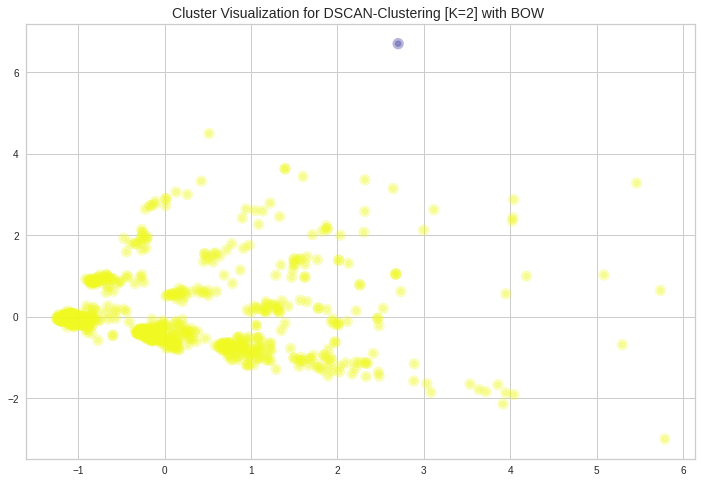

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for DSCAN-Clustering [K=2] with BOW ", fontsize=14)
plt.scatter(bow_array[:, 0], bow_array[:, 1], c= DSC_BOW_Pred, s= 40,alpha=0.3, cmap='plasma',linewidths=5)
#centers_ = AGC_BOW_fit.cluster_centers_
#plt.scatter(centers_[:,0],centers_[:,1],c='black',s=200,alpha=0.6)

**Print Reviews in each Cluster:**




In [ ]:
## Print Reviews in each Cluster:
print("Review Content from Cluster ", 0, end='\n')
print('-'*70)
print(cluster_DF.iloc[cluster_DF.groupby(['dscanBOWClusters']).groups[-1][0]]['content'])
print()
print('-'*70)
print("Review Content from Cluster ", 1, end='\n')
print('-'*70)
print(cluster_DF.iloc[cluster_DF.groupby(['dscanBOWClusters']).groups[0][0]]['content'])
print()
print('-'*70)

Review Content from Cluster  0
----------------------------------------------------------------------
Constant problems. One time it says I have to install it from Google Play, but it was installed from here only... Other time it doesn't even open, or says I have to use the latest version, even though there is no update for it. It gives me a notification of a new coupon, but it won't even open the app itself. Tried it on several phones, across years, it was always problematic. This is very disappointing from the company that has one of the largest revenues in fast-food business.

----------------------------------------------------------------------
Review Content from Cluster  1
----------------------------------------------------------------------
Worst app. Neither do it allow you to register- the interface is complicated and slow.

----------------------------------------------------------------------


In [ ]:
cluster_DF.columns

Index(['content', 'CleanContent', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'ReviewDate', 'sortOrder',
       'KMeansBOWClusters', 'KMeansTFIDFClusters', 'KMeansW2VecClusters',
       'AgcBOWClusters', 'AgcTFIDFClusters', 'AgcW2VClusters',
       'dscanBOWClusters'],
      dtype='object')

### TFIDF [Term Frequency Inverse Document Frequency] :


**- Text Vectorization**




In [ ]:
## Vectorization with TFIDF:
tfidf_vectors = TfidfVectorizer()
tfidf = tfidf_vectors.fit_transform(cleaned_content.values)
tfidf

<950x2628 sparse matrix of type '<class 'numpy.float64'>'
	with 12630 stored elements in Compressed Sparse Row format>

In [ ]:
### 
TFIDF_terms = tfidf_vectors.get_feature_names()
print(TFIDF_terms[1:10])
print(TFIDF_terms[100:110])

['aap', 'abbreviation', 'abia', 'ability', 'abit', 'able', 'absolute', 'absolutely', 'abt']
['annoyance', 'annoying', 'answer', 'anymore', 'anyplace', 'anytime', 'aop', 'apa', 'apart', 'ape']


**- Hyperparameter Tuning & Training:**

In [ ]:
get_best_params_DBSCAN(points=tfidf, labels=content_score)   

([], 0, 0)

In [ ]:
dbscan_tf  = DBSCAN(eps =3, min_samples = 3).fit(tfidf) 
dbscan_tf

DBSCAN(eps=3, min_samples=3)

In [ ]:
db_n_clusters_2 = len(set(dbscan_tf.labels_))
db_n_clusters_2

1

In [ ]:
db_n_clusters_2 = len(set(dbscan_tf.labels_))
db_n_clusters_2

### Word2Vec [Word to Vector]

**Text Vectorization**

In [ ]:
i = 0
list_of_sent=[]
for sent in cleaned_content.values:
    list_of_sent.append(sent.split())

print(len(cleaned_content))    

950


In [ ]:
i=0
list_of_sent_train=[]
for sent in cleaned_content.values:
    filtered_sentence=[]
    sent=remove_html_tags(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

print(len(list_of_sent_train))

950


In [ ]:

     # Training the wor2vec model using content dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=2628, workers=4)
w2v_model

In [ ]:
w2vec = []; 
for sent in list_of_sent_train: 
    sent_vec = np.zeros(2628)
    cnt_words =0
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    w2vec.append(sent_vec)
w2vec = np.array(w2vec)
w2vec = np.nan_to_num(w2vec)
w2vec.shape

(950, 2628)

In [ ]:
w2vec

array([[-0.02416177,  0.02666098, -0.00400094, ...,  0.03181955,
         0.02155406,  0.00295057],
       [-0.02523088,  0.0279119 , -0.00415675, ...,  0.03329279,
         0.02248333,  0.00308229],
       [-0.02253241,  0.0248111 , -0.00370595, ...,  0.02960943,
         0.02005849,  0.00274653],
       ...,
       [-0.01640432,  0.01809953, -0.00270154, ...,  0.02164136,
         0.01466533,  0.00198905],
       [-0.01583992,  0.0175906 , -0.00268143, ...,  0.02087661,
         0.01407919,  0.00192703],
       [-0.01905751,  0.02098501, -0.00322249, ...,  0.02477735,
         0.01672751,  0.002242  ]])

In [ ]:
#w2v_model.get_feature_names()

**- Hyper-Parameter Tuning & Training**

In [ ]:
get_best_params_DBSCAN(points= w2vec,labels =content_score)

([0.1, 3], 0.5121168147470293, 0.0077334046067599835)

In [ ]:
dbscan_w2v  = DBSCAN(eps =0.1, min_samples = 3).fit(w2vec) 
dbscan_w2v

DBSCAN(eps=0.1, min_samples=3)

In [ ]:
db_n_clusters_3 = len(set(dbscan_w2v.labels_))
db_n_clusters_3

4

In [ ]:
db_W2V_labels = dbscan_w2v.labels_
len(db_W2V_labels)

950

In [ ]:
  ## Assign Cluster label to clusters:
cluster_DF['dscanW2VClusters'] = db_W2V_labels
cluster_DF.sample(5)

content  \
901  It's an amazing application, crafted beautiful...   
905  when i 1st got into the wifi, it was a blast! ...   
229  There's a problem in the app. I am unable to c...   
328  to slow respond i click need time to miniute t...   
872                     Excellent app and Easy to Use.   

                                          CleanContent  score  thumbsUpCount  \
901  amazing application craft beautifully idea cha...      5             31   
905  st get wifi blast yeah little slow time time b...      5              1   
229  problem app unable complete payment click paym...      2            183   
328  slow respond click need time miniute respon ch...      2              1   
872                             excellent app easy use      5              0   

    reviewCreatedVersion                   at  ReviewDate      sortOrder  \
901                  NaN  2020-10-20 12:09:51  2020-10-20  most_relevant   
905                  NaN  2020-12-23 03:12:42  2020-12-23  most_relevant   
229               2.34.1  2021-12-25 14:55:15  2021-12-25  most_relevant   
328               2.38.1  2022-04-22 08:40:05  2022-04-22         newest   
872               2.41.0  2022-05-14 16:50:34  2022-05-14  most_relevant   

     KMeansBOWClusters  KMeansTFIDFClusters  KMeansW2VecClusters  \
901                  5                    2                    1   
905                  5                    1                    2   
229                  3                    4                    0   
328                  5                    1                    2   
872                  5                    3                    0   

     AgcBOWClusters  AgcTFIDFClusters  AgcW2VClusters  dscanBOWClusters  \
901               1                 2               1                -1   
905               1                 1               1                -1   
229               1                 2               4                -1   
328               1                 0               1                 0   
872               1                 5               4                 0   

     dscanW2VClusters  
901                 0  
905                 0  
229                 0  
328                 0  
872                 0

In [ ]:
cluster_DF['dscanW2VClusters'].max()

2

**- Get Top Words:**

In [ ]:
dsW2V_WordList_DF = pd.DataFrame(w2vec, columns = terms)
dsW2V_WordList_DF['dscanW2VClusters'] = db_W2V_labels
dbW2V_word_freq = dsW2V_WordList_DF.groupby('dscanW2VClusters').sum()
dbW2V_word_freq  

aa        aap  abbreviation      abia    ability  \
dscanW2VClusters                                                            
-1                -0.211874   0.233809     -0.035076  0.015949   0.507582   
 0               -20.496457  22.630852     -3.387138  1.523763  49.047384   
 1                 0.000000   0.000000      0.000000  0.000000   0.000000   
 2                -0.202024   0.222757     -0.033347  0.015085   0.483571   

                       abit       able  absolute  absolutely       abt  ...  \
dscanW2VClusters                                                        ...   
-1                 0.120298  -0.308688  0.032852   -0.281548 -0.019921  ...   
 0                11.640563 -29.807661  3.136833  -27.243128 -1.937395  ...   
 1                 0.000000   0.000000  0.000000    0.000000  0.000000  ...   
 2                 0.114728  -0.293995  0.031112   -0.268218 -0.018765  ...   

                        za        zam       zero         zi   ziemlich  \
dscanW2VClusters                                                         
-1                0.051290  -0.236536   0.337203   0.222485   0.353368   
 0                4.975759 -22.861719  32.569294  21.503137  34.151479   
 1                0.000000   0.000000   0.000000   0.000000   0.000000   
 2                0.048906  -0.225543   0.321225   0.211982   0.336876   

                   zmieniaj      znmvp     zomato      zosta        zu  
dscanW2VClusters                                                        
-1                 0.251686   0.304818   0.279668   0.188809  0.026146  
 0                24.334477  29.470605  27.009308  18.290431  2.504499  
 1                 0.000000   0.000000   0.000000   0.000000  0.000000  
 2                 0.239896   0.290665   0.266293   0.179966  0.025011  

[4 rows x 2628 columns]

In [ ]:
print(dbW2V_word_freq.loc[2,:].sort_values(ascending=False).head(10).index )#.index

Index(['till', 'seg', 'ng', 'synergy', 'broken', 'balance', 'story', 'sunt',
       'rush', 'will'],
      dtype='object')


In [ ]:
dsc_terms_1 = ['till', 'seg', 'ng', 'synergy', 'broken', 'balance', 'story', 'sunt','rush', 'will']
dsc_terms_2 = ['till', 'seg', 'ng', 'synergy', 'broken', 'balance', 'story', 'sunt','rush', 'will']
dsc_terms_3 = ['aa', 'practical', 'pre', 'precious', 'precise', 'prefer', 'preference','preferred', 'prefix', 'prepare']
dsc_terms_4 = ['till', 'seg', 'ng', 'synergy', 'broken', 'balance', 'story', 'sunt','rush', 'will']

dsc_topwords_W2V = [dsc_terms_1,dsc_terms_2,dsc_terms_3,dsc_terms_4]
len(dsc_topwords_W2V)

4

In [ ]:
dsc_Wordcloud_list_W2V = []
for i in range(4): 
    dsc_unique_string_W2V = (" ").join(dsc_topwords_W2V[i])
    dscw2v_wordcloud_1 = WordCloud(collocations=False,background_color='white').generate(dsc_unique_string_W2V)
    dsc_Wordcloud_list_W2V.append(dscw2v_wordcloud_1)


print(len(dsc_Wordcloud_list_W2V))

4


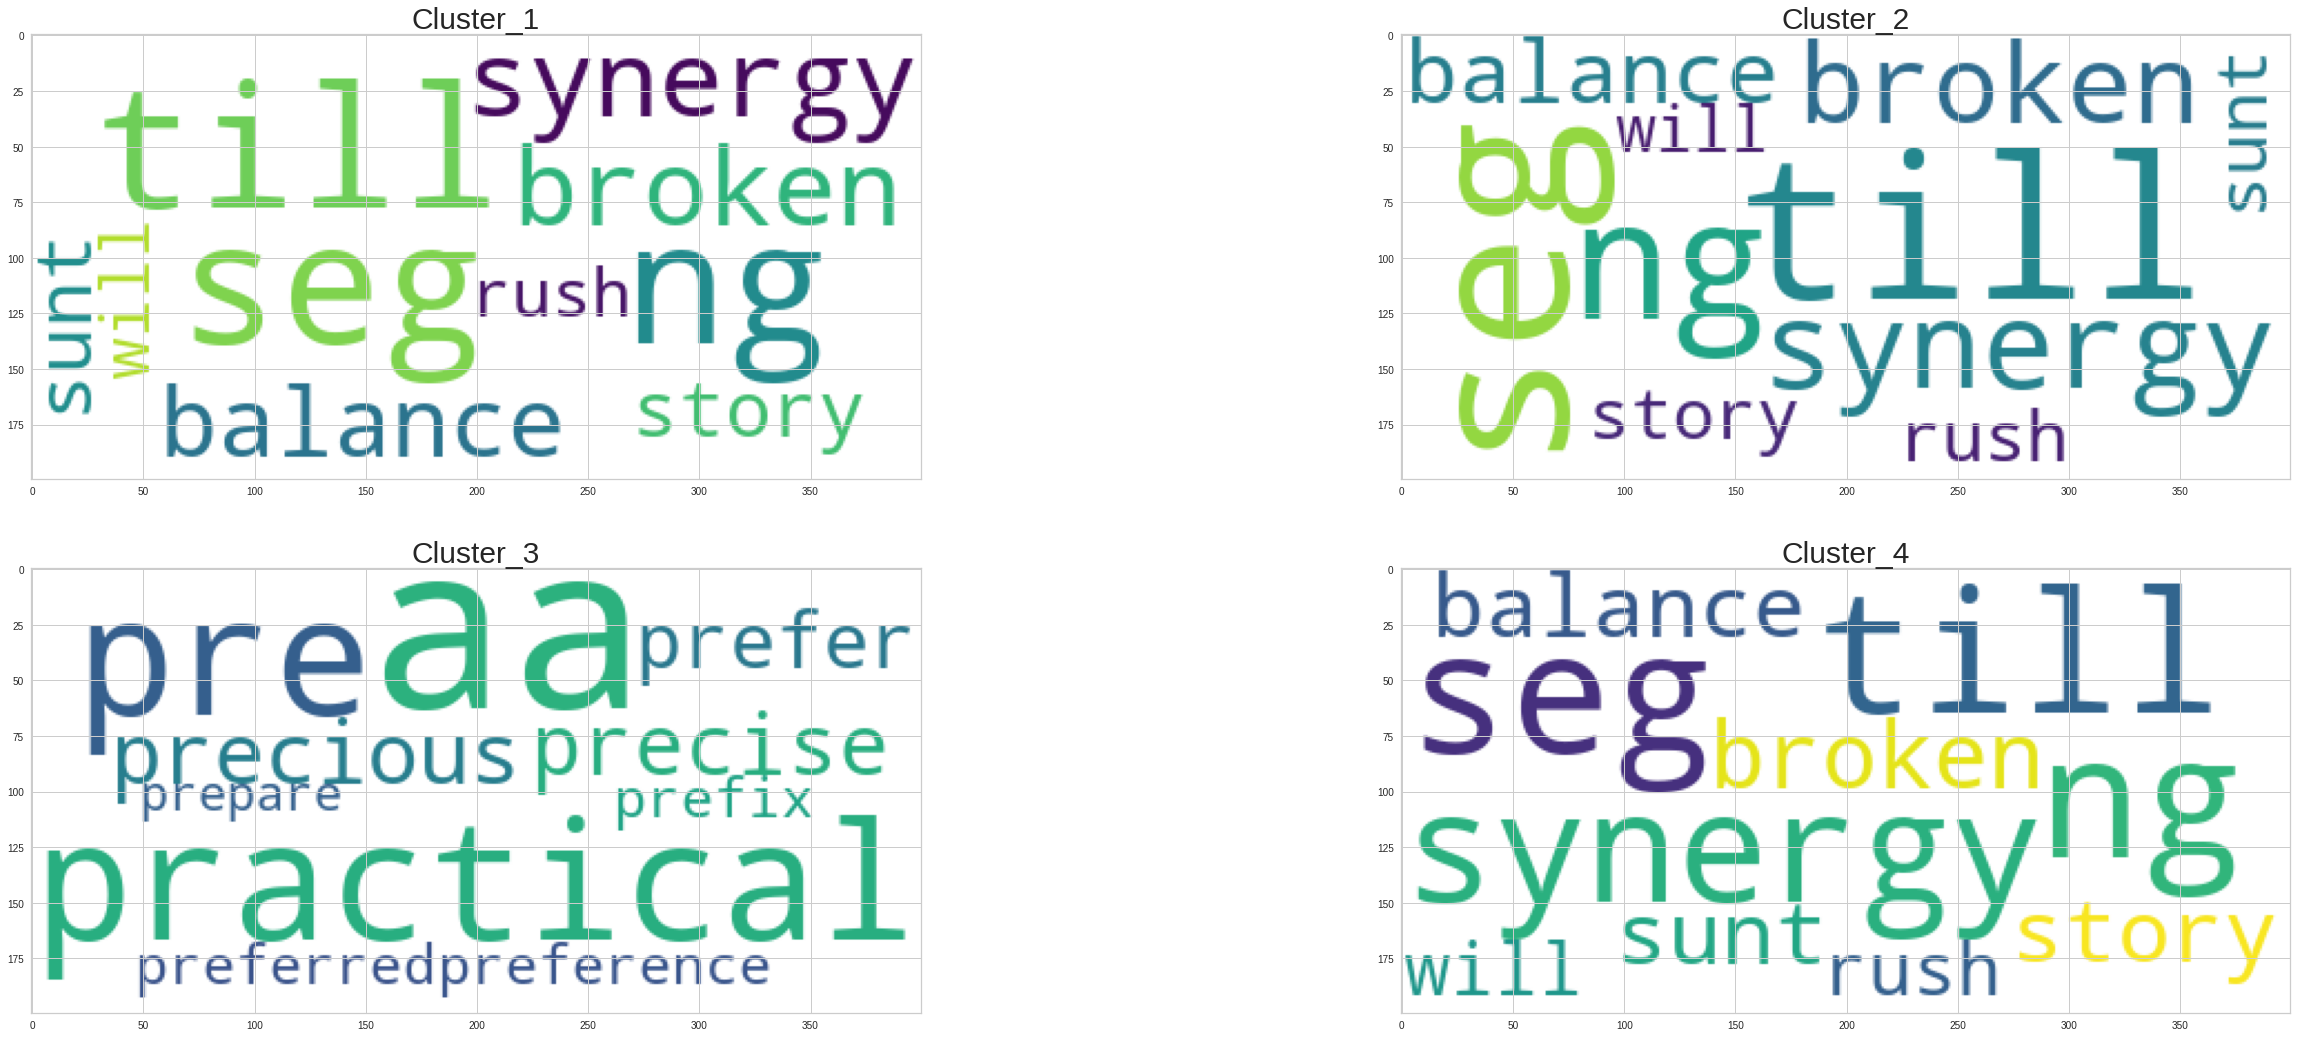

In [ ]:

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(45,18))
# cluster-1
ax[0,0].imshow(dsc_Wordcloud_list_W2V[0])
ax[0,0].set_title('Cluster_1',fontsize=30)

# cluster-2
ax[0,1].imshow(dsc_Wordcloud_list_W2V[1])
ax[0,1].set_title('Cluster_2',fontsize=30)

# cluster-3
ax[1,0].imshow(dsc_Wordcloud_list_W2V[2])
ax[1,0].set_title('Cluster_3',fontsize=30)

# cluster-4
ax[1,1].imshow(dsc_Wordcloud_list_W2V[3])
ax[1,1].set_title('Cluster_4',fontsize=30)

plt.subplots_adjust(hspace=0.2)

**- Visualization of Clusters**

In [ ]:
sklearn_pca = PCA(n_components=2 )
w2v_array = sklearn_pca.fit_transform(w2vec)
print(w2v_array.shape)
w2v_array

(950, 2)


array([[ 1.26593985e-01, -1.96166988e-04],
       [ 1.89451340e-01,  2.47888245e-05],
       [ 2.79590297e-02,  7.80761987e-05],
       ...,
       [-3.29726213e-01, -2.85777943e-04],
       [-3.61963132e-01, -2.28994171e-04],
       [-1.83227683e-01,  4.89706194e-03]])

In [ ]:
 ## Modelling with optimal Parameters:
model_DSC_wv2 =   DBSCAN(eps =0.1, min_samples = 3)

DSC_w2v_fit = model_DSC_wv2.fit(w2v_array)
DSC_w2v_Pred = model_DSC_wv2.fit_predict(w2v_array)
DSC_w2v_Pred.shape

(950,)

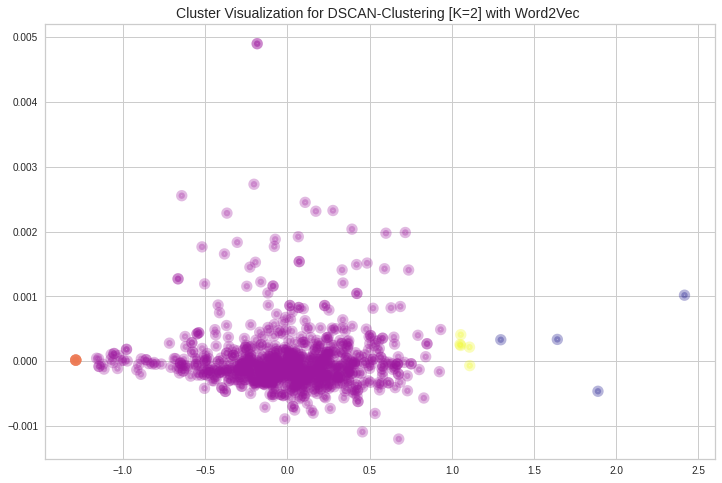

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for DSCAN-Clustering [K=2] with Word2Vec ", fontsize=14)
plt.scatter(w2v_array[:, 0], w2v_array[:, 1], c= DSC_w2v_Pred, s= 40,alpha=0.3, cmap='plasma',linewidths=5)
#centers_ = AGC_BOW_fit.cluster_centers_
#plt.scatter(centers_[:,0],centers_[:,1],c='black',s=200,alpha=0.6)

**Print Reviews in each Cluster:**




In [ ]:
## Print Reviews in each Cluster:
print("Review Content from Cluster ", 0, end='\n')
print('-'*70)
print(cluster_DF.iloc[cluster_DF.groupby(['dscanW2VClusters']).groups[-1][0]]['content'])
print()
print('-'*70)
print("Review Content from Cluster ", 1, end='\n')
print('-'*70)
print(cluster_DF.iloc[cluster_DF.groupby(['dscanW2VClusters']).groups[0][0]]['content'])
print()
print('-'*70)
print("Review Content from Cluster ", 2, end='\n')
print('-'*70)
print(cluster_DF.iloc[cluster_DF.groupby(['dscanW2VClusters']).groups[1][0]]['content'])
print()
print('-'*70)
print("Review Content from Cluster ", 3, end='\n')
print('-'*70)
print(cluster_DF.iloc[cluster_DF.groupby(['dscanW2VClusters']).groups[2][0]]['content'])
print()
print('-'*70)

Review Content from Cluster  0
----------------------------------------------------------------------
Lanjiao app, already done payment app show error, always makan duit, puii.

----------------------------------------------------------------------
Review Content from Cluster  1
----------------------------------------------------------------------
Constant problems. One time it says I have to install it from Google Play, but it was installed from here only... Other time it doesn't even open, or says I have to use the latest version, even though there is no update for it. It gives me a notification of a new coupon, but it won't even open the app itself. Tried it on several phones, across years, it was always problematic. This is very disappointing from the company that has one of the largest revenues in fast-food business.

----------------------------------------------------------------------
Review Content from Cluster  2
--------------------------------------------------------------

In [ ]:
cluster_DF.columns

Index(['content', 'CleanContent', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'ReviewDate', 'sortOrder',
       'KMeansBOWClusters', 'KMeansTFIDFClusters', 'KMeansW2VecClusters',
       'AgcBOWClusters', 'AgcTFIDFClusters', 'AgcW2VClusters',
       'dscanBOWClusters', 'dscanW2VClusters'],
      dtype='object')

## Evaluation

**- Cluster Data**

In [ ]:
#cluster_DF.to_csv('Cluster_Result.csv',index=False)
cluster_DF = pd.read_csv('/content/Cluster_Result .csv')
cluster_DF.head(2)

content  \
0  Constant problems. One time it says I have to ...   
1  One of the worst apps I have used. The interfa...   

                                        CleanContent  score  thumbsUpCount  \
0  constant problem time say install google play ...      1            470   
1  bad app interface bad find want button banner ...      1            669   

  reviewCreatedVersion                   at  ReviewDate      sortOrder  \
0                2.7.0  2020-07-27 12:59:31  2020-07-27  most_relevant   
1               2.19.0  2021-05-05 17:20:51  2021-05-05  most_relevant   

   KMeansBOWClusters  KMeansTFIDFClusters  KMeansW2VecClusters  \
0                  3                    4                    0   
1                  3                    0                    0   

   AgcBOWClusters  AgcTFIDFClusters  AgcW2VClusters  dscanBOWClusters  \
0               1                 2               4                -1   
1               0                 0               4                -1   

   dscanW2VClusters  
0                 0  
1                 0

In [ ]:
cluster_DF.columns

Index(['content', 'CleanContent', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'ReviewDate', 'sortOrder',
       'KMeansBOWClusters', 'KMeansTFIDFClusters', 'KMeansW2VecClusters',
       'AgcBOWClusters', 'AgcTFIDFClusters', 'AgcW2VClusters',
       'dscanBOWClusters', 'dscanW2VClusters'],
      dtype='object')

In [ ]:
data_ = {'Model_List' : ['KMeans_BOW','KMeans_TFIDF','KMeans_W2V', 'Agglomerative_BOW','Agglomerative_TFIDF',
              'Agglomerative_W2V', 'DSCAN_BOW', 'DSCAN_W2V'],
'n_clusters' :       [6,9,5,6,10,4,2,4],
'silhouette_score' : [0.017933,0.013570,0.532465,0.325792, 0.014105,0.474043, 0.025264, 0.512117],
'mutual_info_score' : [0.03729,0.093127, 0.009145,0.015120, 0.0173476,0.011849, 0.027803, 0.007733]}

k_labels = ['k=6','k=9','k=5','k=6','k=10','k=4','k=2','k=4']

In [ ]:
eval_df = pd.DataFrame(data_)
eval_df

Model_List  n_clusters  silhouette_score  mutual_info_score
0           KMeans_BOW           6          0.017933           0.037290
1         KMeans_TFIDF           9          0.013570           0.093127
2           KMeans_W2V           5          0.532465           0.009145
3    Agglomerative_BOW           6          0.325792           0.015120
4  Agglomerative_TFIDF          10          0.014105           0.017348
5    Agglomerative_W2V           4          0.474043           0.011849
6            DSCAN_BOW           2          0.025264           0.027803
7            DSCAN_W2V           4          0.512117           0.007733

### Silhouette Score

- It's Metric for Validating and Interpreting consistency in data clusters; 

- It simply measures the separation distance betwween clusters

- Values ranges between [-1,1]: 

  -  where 1 means clusters are well apart from each other and clearly distinguished 

  - i.e higher values of silhoutte score denotes good clustering

- S.I = Avg distance between each point within a cluster/avg distance between all clsuters


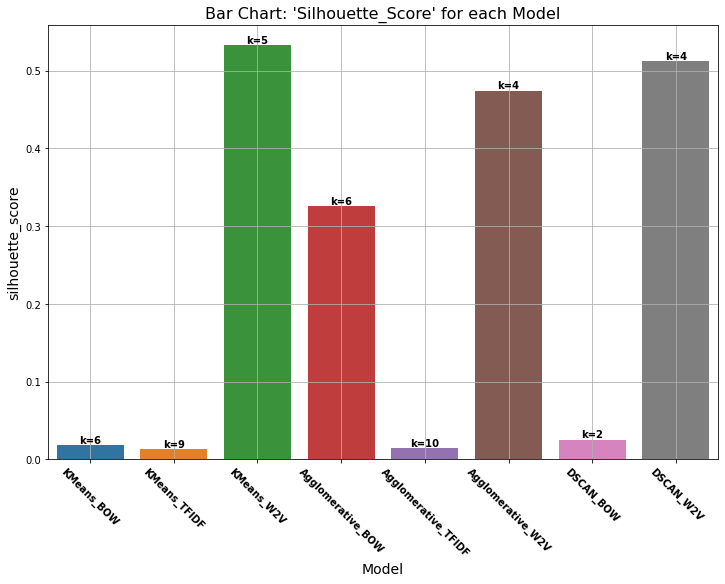

In [ ]:
plt.figure(figsize=(12,8))
ax =sns.barplot(x,y)
x_locs,x_lables = plt.xticks()
plt.xticks(rotation = -45,fontweight = 'bold')  
plt.title("Bar Chart: 'Silhouette_Score' for each Model", fontsize=16)
plt.ylabel("silhouette_score", fontsize=14)
plt.xlabel("Model",fontsize=14)
plt.grid()

                  #adding text lables...
r = ax.patches
labels = k_labels
for rec,label in zip(r,labels):
  height = rec.get_height()
  ax.text(rec.get_x() + rec.get_width()/2,
          height,
          label,
          fontweight='bold',
          ha='center',
          va='bottom')

### Mutual Info Score

- It measures the similarity between two labels of the same data; 

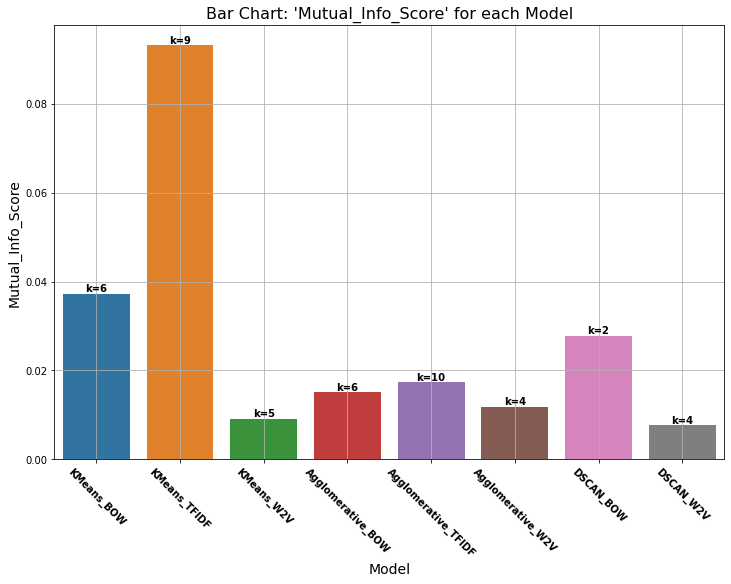

In [ ]:
x =  eval_df['Model_List']
y2 =  eval_df['mutual_info_score']
plt.figure(figsize=(12,8))
ax =sns.barplot(x,y2)
x_locs,x_lables = plt.xticks()
plt.xticks(rotation = -45,fontweight = 'bold')  
plt.title("Bar Chart: 'Mutual_Info_Score' for each Model", fontsize=16)
plt.ylabel("Mutual_Info_Score", fontsize=14)
plt.xlabel("Model",fontsize=14)
plt.grid()

                  #adding text lables...
r = ax.patches
labels =k_labels
for rec,label in zip(r,labels):
  height = rec.get_height()
  ax.text(rec.get_x() + rec.get_width()/2,
          height,
          label,
          fontweight='bold',
          ha='center',
          va='bottom')

### Review Score in Each Cluster

In [ ]:
cluster_DF.columns

Index(['content', 'CleanContent', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'ReviewDate', 'sortOrder',
       'KMeansBOWClusters', 'KMeansTFIDFClusters', 'KMeansW2VecClusters',
       'AgcBOWClusters', 'AgcTFIDFClusters', 'AgcW2VClusters',
       'dscanBOWClusters', 'dscanW2VClusters'],
      dtype='object')

In [ ]:
bow_df1 = cluster_DF.groupby(["KMeansBOWClusters"]).agg({'score':'value_counts'}).unstack().fillna(0)
bow_df2 = cluster_DF.groupby(["KMeansTFIDFClusters"]).agg({'score':'value_counts'}).unstack().fillna(0)
bow_df3 = cluster_DF.groupby(["KMeansW2VecClusters"]).agg({'score':'value_counts'}).unstack().fillna(0)

agc_df1 = cluster_DF.groupby(["AgcBOWClusters"]).agg({'score':'value_counts'}).unstack().fillna(0)
agc_df2 = cluster_DF.groupby(["AgcTFIDFClusters"]).agg({'score':'value_counts'}).unstack().fillna(0)
agc_df3 = cluster_DF.groupby(["AgcW2VClusters"]).agg({'score':'value_counts'}).unstack().fillna(0)

db_df1 = cluster_DF.groupby(["dscanBOWClusters"]).agg({'score':'value_counts'}).unstack().fillna(0)
db_df2 = cluster_DF.groupby(["dscanW2VClusters"]).agg({'score':'value_counts'}).unstack().fillna(0)


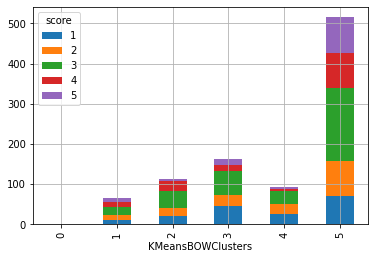

In [ ]:
bow_df1['score'].plot(kind='bar',stacked=True)
plt.grid()

In [ ]:
k_labels = ['k=6','k=9','k=5','k=6','k=10','k=4','k=2','k=4']

Distribution of Review Scores in each Model 


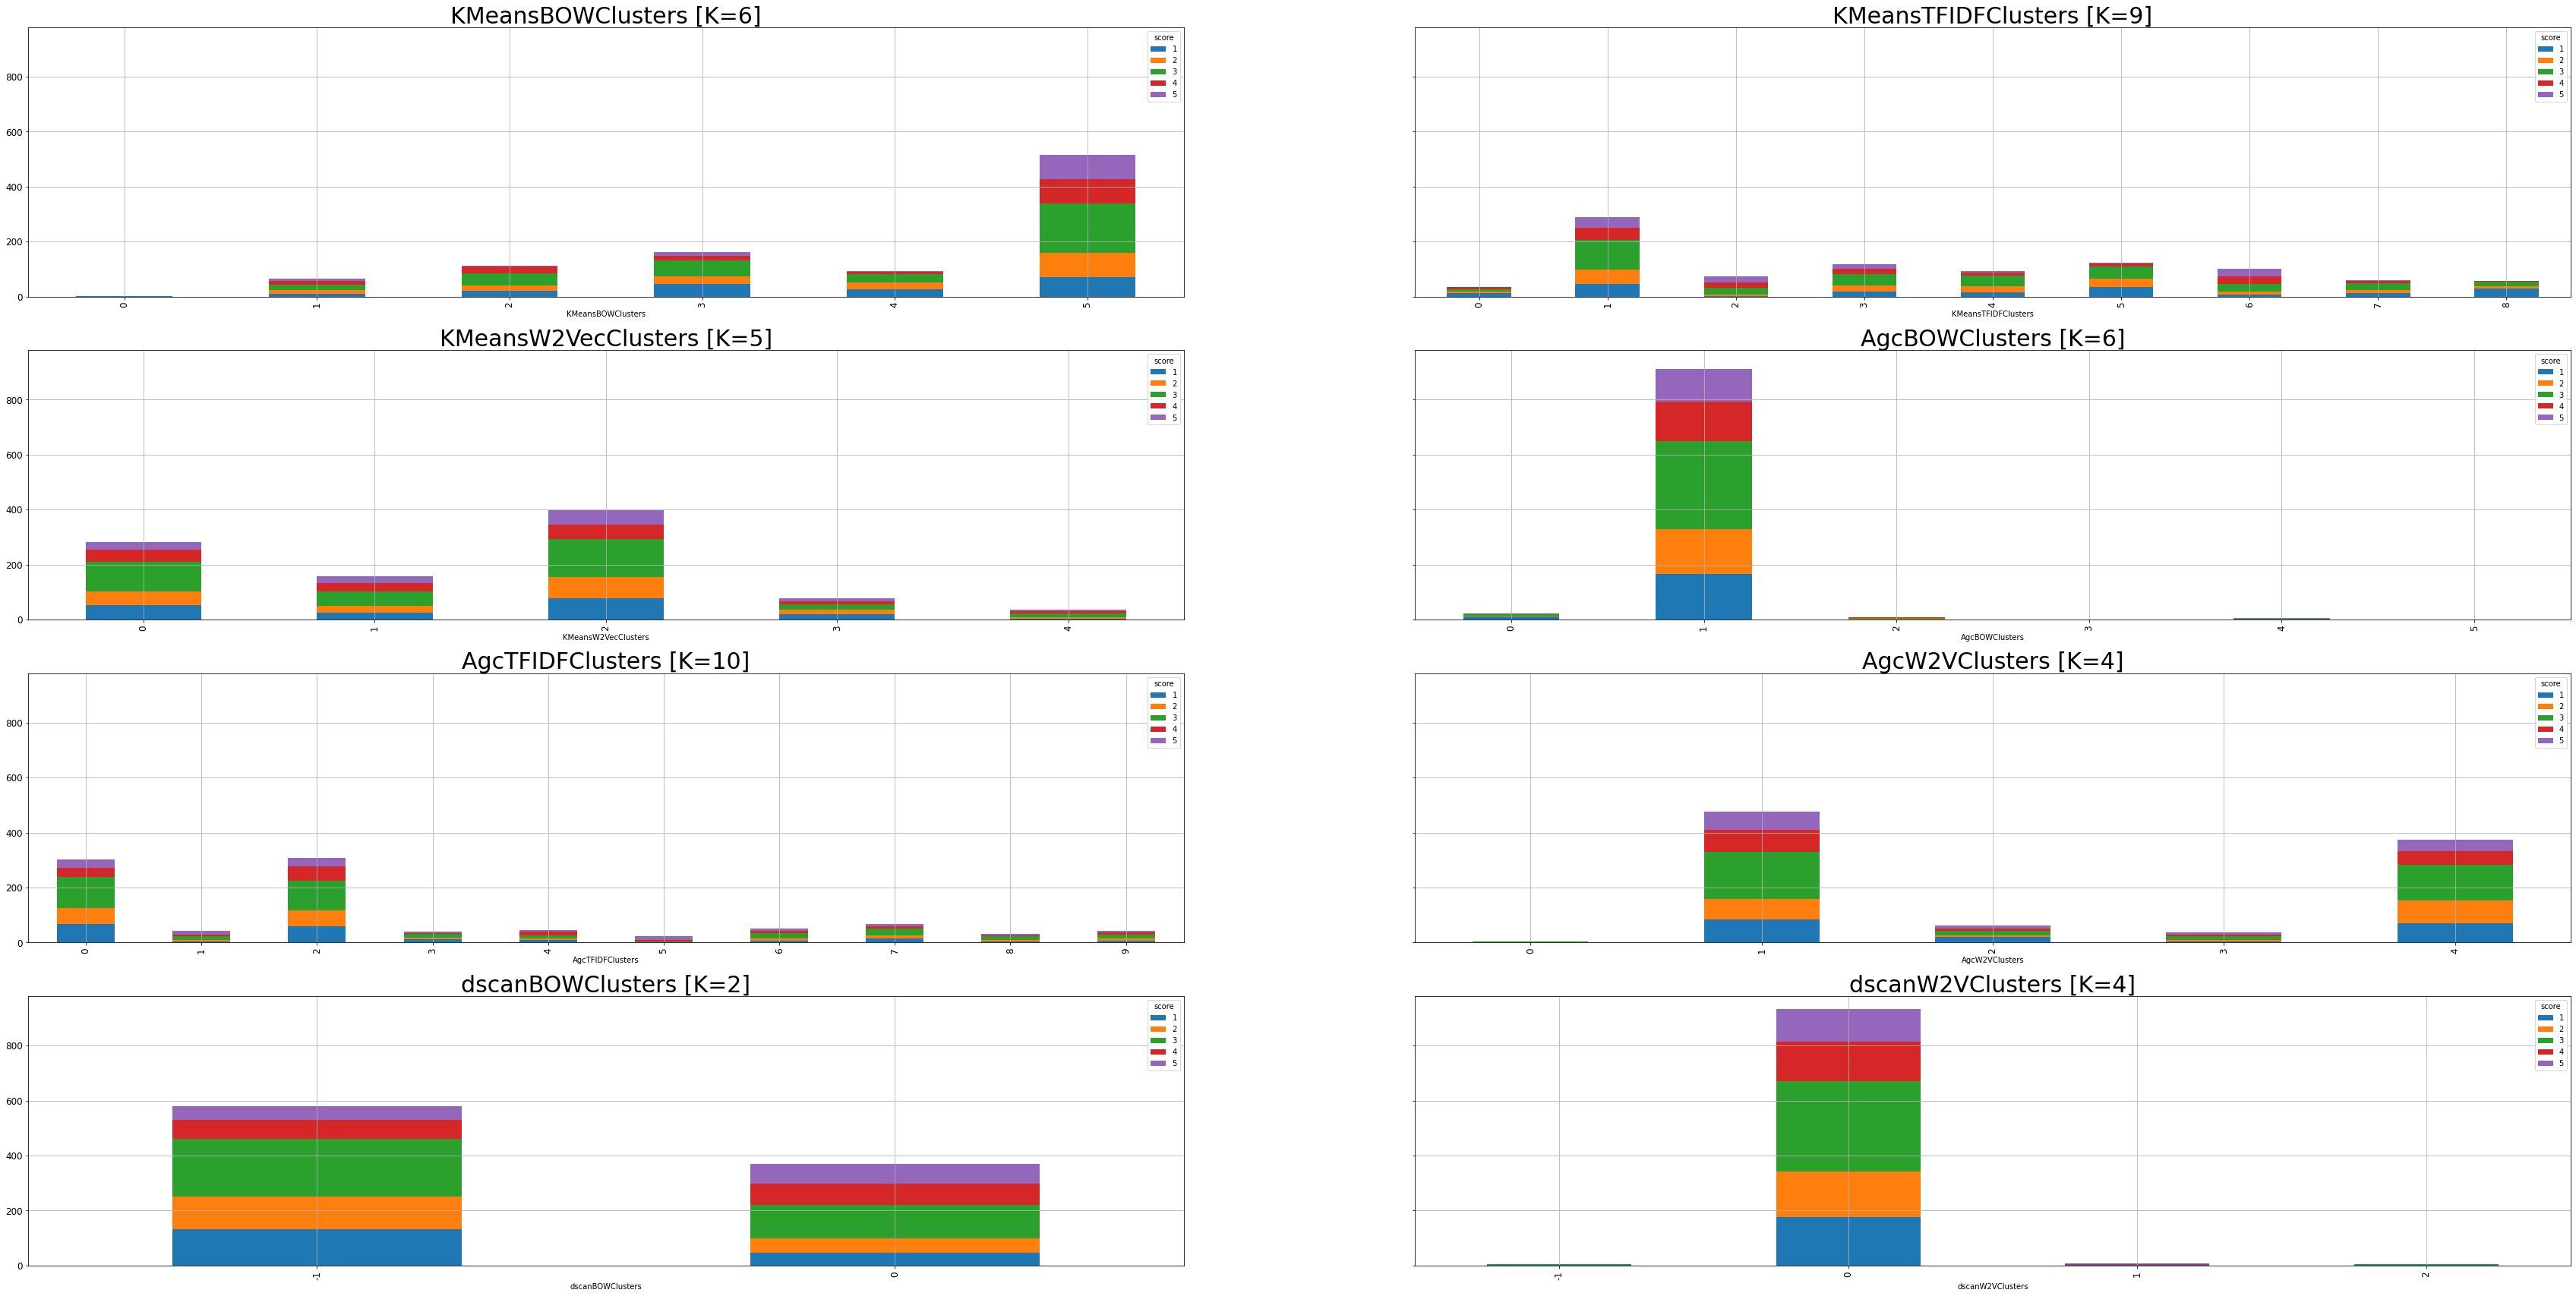

In [ ]:
print("Distribution of Review Scores in each Model ")
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(60,30), sharey= True)
bow_df1['score'].plot(kind='bar',stacked=True, ax=ax[0][0],fontsize=12 )
ax[0][0].grid()
ax[0][0].set_title('KMeansBOWClusters [K=6]',fontsize=30)

# cluster-2
bow_df2['score'].plot(kind='bar',stacked=True, ax=ax[0][1],fontsize=12 )
ax[0][1].grid()
ax[0][1].set_title('KMeansTFIDFClusters [K=9]',fontsize=30)

# cluster-3
bow_df3['score'].plot(kind='bar',stacked=True, ax=ax[1][0],fontsize=12 )
ax[1][0].grid()
ax[1][0].set_title('KMeansW2VecClusters [K=5]',fontsize=30)

## cluster-4
agc_df1['score'].plot(kind='bar',stacked=True, ax=ax[1][1],fontsize=12 )
ax[1][1].grid()
ax[1][1].set_title('AgcBOWClusters [K=6]',fontsize=30)

## cluster-5
agc_df2['score'].plot(kind='bar',stacked=True, ax=ax[2][0],fontsize=12 )
ax[2][0].grid()
ax[2][0].set_title('AgcTFIDFClusters [K=10]',fontsize=30)


## cluster-6
agc_df3['score'].plot(kind='bar',stacked=True, ax=ax[2][1],fontsize=12 )
ax[2][1].grid()
ax[2][1].set_title('AgcW2VClusters [K=4]',fontsize=30)


## cluster-7
db_df1['score'].plot(kind='bar',stacked=True, ax=ax[3][0],fontsize=12 )
ax[3][0].grid()
ax[3][0].set_title('dscanBOWClusters [K=2]',fontsize=30)

## cluster-8
db_df2['score'].plot(kind='bar',stacked=True, ax=ax[3][1],fontsize=12 )
ax[3][1].grid()
ax[3][1].set_title('dscanW2VClusters [K=4]',fontsize=30)

plt.subplots_adjust(hspace=0.2)

### Clustering visualization

**- BOW Clustering**

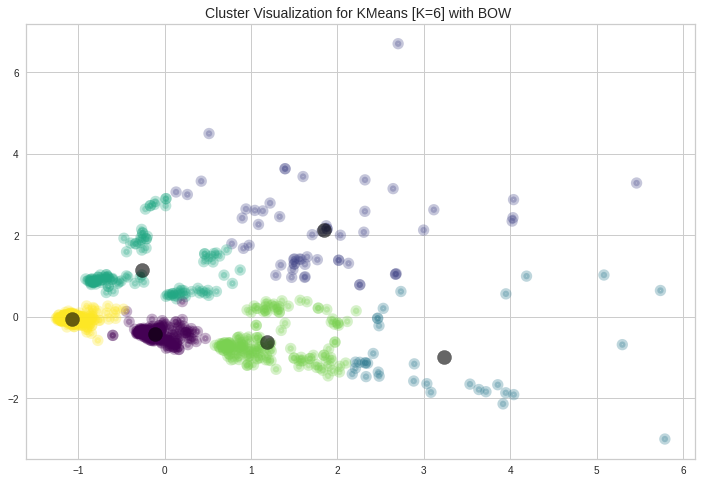

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for KMeans [K=6] with BOW ", fontsize=14)
plt.scatter(bow_array[:, 0], bow_array[:, 1], c=KM_BOW_Pred, s= 40,alpha=0.3, cmap='viridis',linewidths=5)
centers_ = KM_BOW_fit.cluster_centers_
plt.scatter(centers_[:,0],centers_[:,1],c='black',s=200,alpha=0.6)

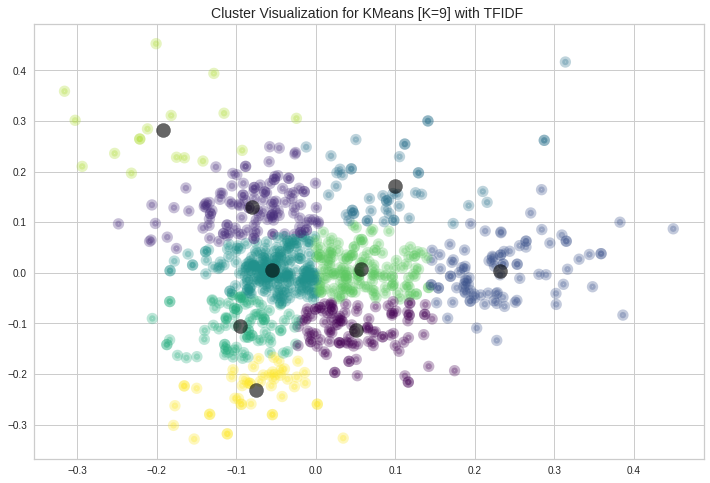

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for KMeans [K=9] with TFIDF ", fontsize=14)
plt.scatter(tfidf_array[:, 0], tfidf_array[:, 1], c=KM_TFIDF_Pred, s= 40,alpha=0.3, cmap='viridis',linewidths=5)
centers_TF = KM_TFIDF_fit.cluster_centers_
plt.scatter(centers_TF[:,0],centers_TF[:,1],c='black',s=200,alpha=0.6)

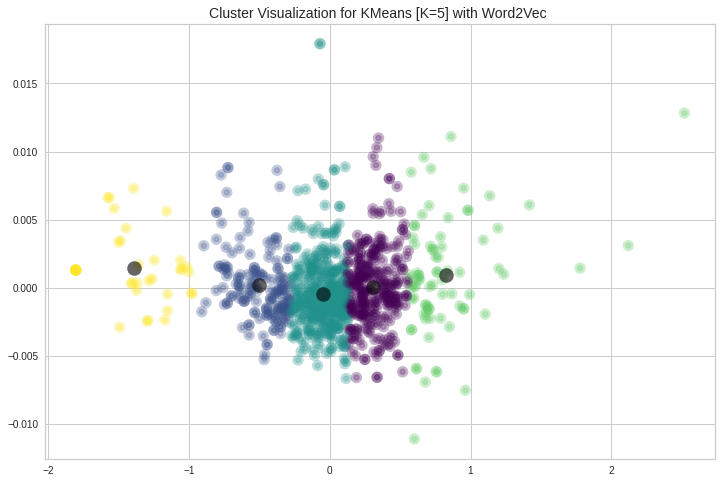

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for KMeans [K=5] with Word2Vec ", fontsize=14)
plt.scatter(W2V_array[:, 0], W2V_array[:, 1], c=KM_W2V_Pred, s= 40,alpha=0.3, cmap='viridis',linewidths=5)
centers_w2v = KM_W2V_fit.cluster_centers_
plt.scatter(centers_w2v[:,0],centers_w2v[:,1],c='black',s=200,alpha=0.6)

**- Agglomerative Clustering**

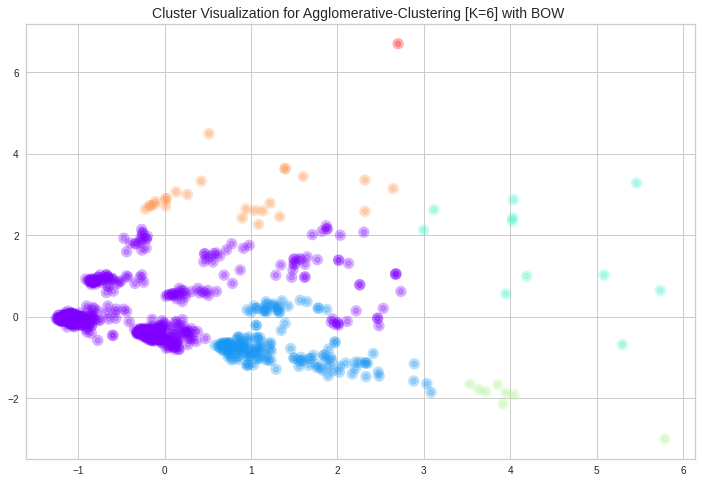

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for Agglomerative-Clustering [K=6] with BOW ", fontsize=14)
plt.scatter(bow_array[:, 0], bow_array[:, 1], c=AGC_BOW_Pred, s= 40,alpha=0.3, cmap='rainbow',linewidths=5)
#centers_ = AGC_BOW_fit.cluster_centers_
#plt.scatter(centers_[:,0],centers_[:,1],c='black',s=200,alpha=0.6)

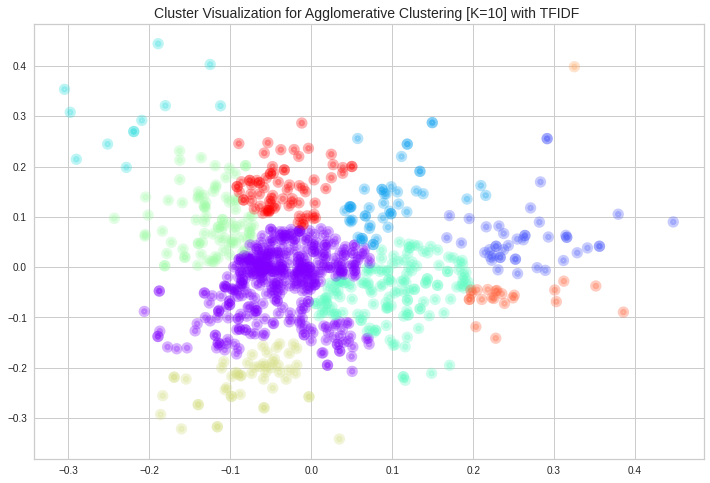

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for Agglomerative Clustering [K=10] with TFIDF ", fontsize=14)
plt.scatter(tfidf_array[:, 0], tfidf_array[:, 1], c=AGC_TFIDF_pred, s= 40,alpha=0.3, cmap='rainbow',linewidths=5)
#centers_TF = KM_TFIDF_fit.cluster_centers_
#plt.scatter(centers_TF[:,0],centers_TF[:,1],c='black',s=200,alpha=0.6)

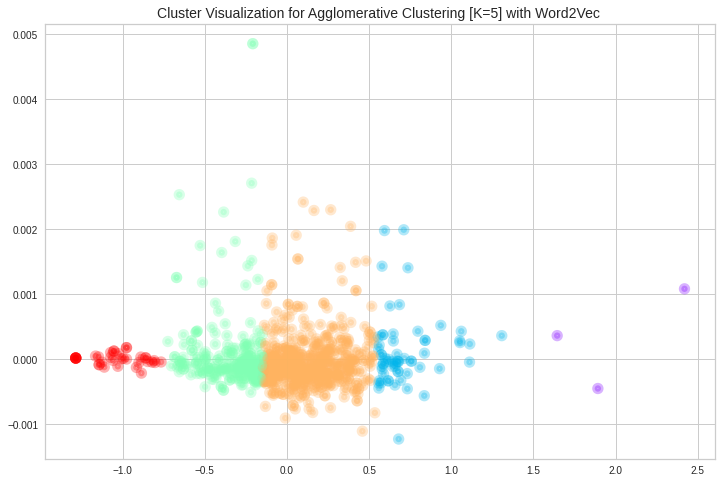

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for Agglomerative Clustering [K=5] with Word2Vec ", fontsize=14)
plt.scatter(W2V_array[:, 0], W2V_array[:, 1], c=AGC_W2V_Pred, s= 40,alpha=0.3, cmap='rainbow',linewidths=5)
# centers_w2v = KM_W2V_fit.cluster_centers_
# plt.scatter(centers_w2v[:,0],centers_w2v[:,1],c='black',s=200,alpha=0.6)

**- DSCAN Clustering**

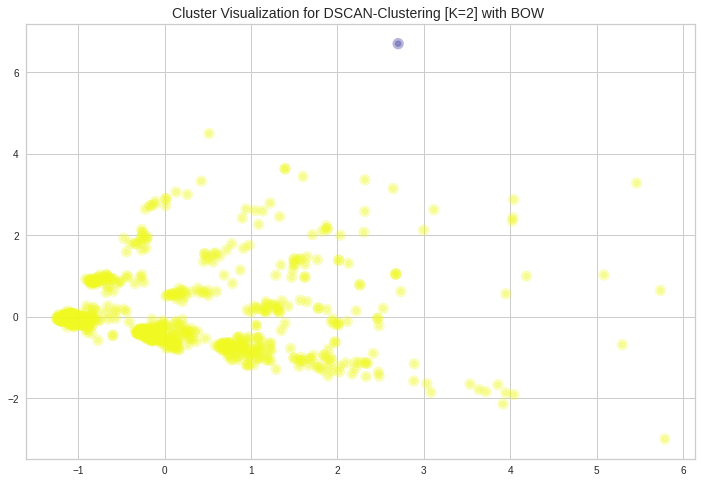

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for DSCAN-Clustering [K=2] with BOW ", fontsize=14)
plt.scatter(bow_array[:, 0], bow_array[:, 1], c= DSC_BOW_Pred, s= 40,alpha=0.3, cmap='plasma',linewidths=5)
#centers_ = AGC_BOW_fit.cluster_centers_
#plt.scatter(centers_[:,0],centers_[:,1],c='black',s=200,alpha=0.6)

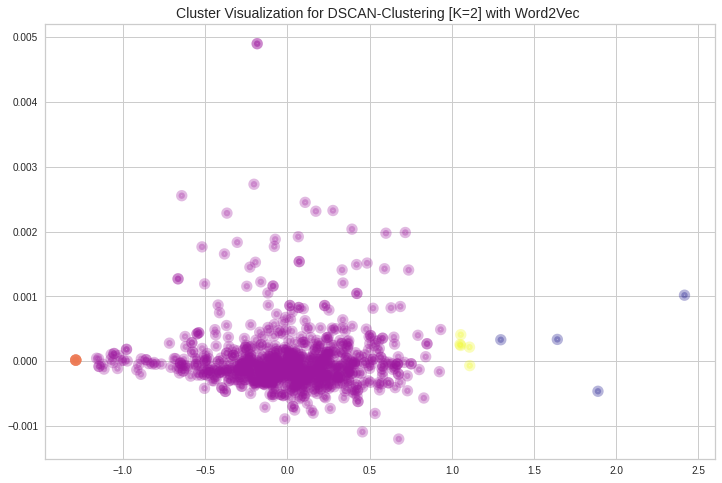

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Cluster Visualization for DSCAN-Clustering [K=2] with Word2Vec ", fontsize=14)
plt.scatter(w2v_array[:, 0], w2v_array[:, 1], c= DSC_w2v_Pred, s= 40,alpha=0.3, cmap='plasma',linewidths=5)
#centers_ = AGC_BOW_fit.cluster_centers_
#plt.scatter(centers_[:,0],centers_[:,1],c='black',s=200,alpha=0.6)

### Conclusion:

- I perfromed a clustering task on a sample data of reviews using several text vectoring methods combined with different clustering algorithms;

- Based on Silhoutte Score:
   - The performance of the clustering done based on **Word-2-Vector** text vectorization was consistently higher than those done by either **Bag_of_word** and **Term_Frequency** 

   - i.e Clusters are more clearly distinguished from each other using **Word-2-Vector**

- Based on Mutual Information Score:
   - KMeans with TFIDF shows an outstanding performance with respect to similarity score within cluster
   
   - But it has K=9 and very low distinguishing power

- DSCAN performance with TFIDF and  BOW was relatively poor compared to other methods 

- Agglomerative Clustering with TFIDF have a relatively good performance but its actualy review catergorization is not as good as that of KMeans with Word2Vec

- By putting into consideration the clustering distinguishing power base on the data; KMeans() with Word2Vec seems to be the best choice




In [ ]:
# KM_BOW = pd.DataFrame(cluster_DF.groupby(["KMeansBOWClusters"]).agg({'score':'value_counts'}))
# KM_BOW = KM_BOW.rename(columns = {'score':'Review_Count'})
# KM_BOW = pd.DataFrame(KM_BOW)
# KM_BOW = KM_BOW.reset_index()
# KM_BOW = KM_BOW.sort_values(['KMeansBOWClusters','score'])

# KM_BOW